# 2021 금융데이터 경진대회 

* **주최**  
    : 금융 보안원 
* **후원기관**   
    : 금융위원회, 신한은행, 우리은행, 한국투자증권, 신한카드, BC카드, KB국민카드, 한국기업데이터 
* **분석 데이터**   
    : 신한은행 제공 - 서울시 지역단위 '소득', '지출', '금융자산' 정보  

* **기타 사용 데이터**
1. **대출금리비교(일반신용대출).xlsx**  
    : 각 시점별 기준금리와 업계평균 신용대출금리, 신한은행의 신용대출 금리에 대한 데이터로, 은행연합회 소비자포털에서 수집한 데이터 입니다.   
2. **동별인구.xlsx**  
    : 행정동별 인구에 대한 데이터입니다. 해당 데이터는 서울시 공공데이터 포털 - 서울시 주민등록인구 (동별) 통계 (2019년 1분기/3분기, 2020년 1분기/3분기)를 사용해 수집하였습니다.    
3. **매매가격지수.xlsx**  
    : 각 지역구별 주택 매매 가격지수 데이터 입니다. 해당 데이터는 서울시 공공데이터 포털 - 주택 매매가격 지수를 이용해 수집하였습니다.  
4. **전세가격지수.xlsx**  
    : 각 지역구별 전세가격 종합지수 데이터 입니다.  해당 데이터는 서울시 공공데이터 포털 - 주택 전세 가격 지수를 이용해 수집하였습니다.  
5. 

# 분석 사전 준비 

## 라이브러리 호출 

In [1]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Dropout,ReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam 

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
 

# 데이터셋 호출 

## 신한은행 데이터 호출
##### 신한은행 제공 데이터 - 서울시 지역단위 '소득', '지출', '금융자산' 정보
* 각 횡단면 시점, 2019년 3월/9월, 2020년 3월,9월, 2021년 3월 데이터를 하나로 통합한 데이터 입니다. 

In [2]:
sinhan = pd.read_excel('../finance_data201903(1)/total.xlsx')

In [3]:
sinhan

기준년월  지역구     법정동코드  법정동          집계구코드  나이  성별  직장인여부  급여입금  \
0        201903  강남구  11680101  역삼동  1123064010001   2   1      0     0   
1        201903  강남구  11680101  역삼동  1123064010001   2   2      0     0   
2        201903  강남구  11680101  역삼동  1123064010001   3   1      0     0   
3        201903  강남구  11680101  역삼동  1123064010001   3   2      0     0   
4        201903  강남구  11680101  역삼동  1123064010001   4   1      0     0   
...         ...  ...       ...  ...            ...  ..  ..    ...   ...   
1039563  202103  중랑구  11260106  신내동  1107070010802   5   2      0     0   
1039564  202103  중랑구  11260106  신내동  1107070010802   6   1      0     0   
1039565  202103  중랑구  11260106  신내동  1107070010802   6   2      0     0   
1039566  202103  중랑구  11260106  신내동  1107070010802   7   1      0     0   
1039567  202103  중랑구  11260106  신내동  1107070010802   7   2      0     0   

         가맹점매출입금    연금입금    총소비금액    총수신금액     예적금금액  신탁금액  수익증권금액  신용대출금액  \
0              0       0  2018319  2430312         0     0       0       0   
1              0       0  2326837  2221251         0     0       0       0   
2              0       0  1771639  1382057   1841250     0       0       0   
3              0       0  1745601  2902578   3561440     0       0       0   
4              0       0  1712433  1746992   8831666     0       0       0   
...          ...     ...      ...      ...       ...   ...     ...     ...   
1039563        0       0  1425069  4369530   9185200     0       0       0   
1039564        0  738450  2015000  6877740   2478000     0       0       0   
1039565        0  595480  1495569  9297919  19789456     0       0       0   
1039566        0  409938   812073  5018284         0     0       0       0   
1039567        0  322286  1264725  6770482  15656170     0       0       0   

         담보대출금액  주택대출금액  전세자금대출금액  
0             0       0         0  
1             0       0         0  
2             0       0         0  
3             0       0         0  
4             0       0         0  
...         ...     ...       ...  
1039563       0       0         0  
1039564       0       0         0  
1039565       0       0         0  
1039566       0       0         0  
1039567       0       0         0  

[1039568 rows x 20 columns]

## 데이터 전처리 

* 기준년월 열의 데이터 타입을 데이트타임 형식으로 변환합니다. 

In [4]:
sinhan["기준년월"] = pd.to_datetime(sinhan["기준년월"],format="%Y%m")

In [5]:
sinhan.head()

기준년월  지역구     법정동코드  법정동          집계구코드  나이  성별  직장인여부  급여입금  가맹점매출입금  \
0 2019-03-01  강남구  11680101  역삼동  1123064010001   2   1      0     0        0   
1 2019-03-01  강남구  11680101  역삼동  1123064010001   2   2      0     0        0   
2 2019-03-01  강남구  11680101  역삼동  1123064010001   3   1      0     0        0   
3 2019-03-01  강남구  11680101  역삼동  1123064010001   3   2      0     0        0   
4 2019-03-01  강남구  11680101  역삼동  1123064010001   4   1      0     0        0   

   연금입금    총소비금액    총수신금액    예적금금액  신탁금액  수익증권금액  신용대출금액  담보대출금액  주택대출금액  \
0     0  2018319  2430312        0     0       0       0       0       0   
1     0  2326837  2221251        0     0       0       0       0       0   
2     0  1771639  1382057  1841250     0       0       0       0       0   
3     0  1745601  2902578  3561440     0       0       0       0       0   
4     0  1712433  1746992  8831666     0       0       0       0       0   

   전세자금대출금액  
0         0  
1         0  
2         0  
3         0  
4         0

* 법정동 코드 확인 결과 공통적으로 뒷 두자리의 00이 누락되어있는점을 확인했습니다. 따라서 해당 문제점을 개선합니다.  

In [6]:
sinhan['법정동코드'] = sinhan['법정동코드']*100

# EDA 

In [7]:
sinhan.columns

Index(['기준년월', '지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

In [8]:
sinhan

기준년월  지역구       법정동코드  법정동          집계구코드  나이  성별  직장인여부  급여입금  \
0       2019-03-01  강남구  1168010100  역삼동  1123064010001   2   1      0     0   
1       2019-03-01  강남구  1168010100  역삼동  1123064010001   2   2      0     0   
2       2019-03-01  강남구  1168010100  역삼동  1123064010001   3   1      0     0   
3       2019-03-01  강남구  1168010100  역삼동  1123064010001   3   2      0     0   
4       2019-03-01  강남구  1168010100  역삼동  1123064010001   4   1      0     0   
...            ...  ...         ...  ...            ...  ..  ..    ...   ...   
1039563 2021-03-01  중랑구  1126010600  신내동  1107070010802   5   2      0     0   
1039564 2021-03-01  중랑구  1126010600  신내동  1107070010802   6   1      0     0   
1039565 2021-03-01  중랑구  1126010600  신내동  1107070010802   6   2      0     0   
1039566 2021-03-01  중랑구  1126010600  신내동  1107070010802   7   1      0     0   
1039567 2021-03-01  중랑구  1126010600  신내동  1107070010802   7   2      0     0   

         가맹점매출입금    연금입금    총소비금액    총수신금액     예적금금액  신탁금액  수익증권금액  신용대출금액  \
0              0       0  2018319  2430312         0     0       0       0   
1              0       0  2326837  2221251         0     0       0       0   
2              0       0  1771639  1382057   1841250     0       0       0   
3              0       0  1745601  2902578   3561440     0       0       0   
4              0       0  1712433  1746992   8831666     0       0       0   
...          ...     ...      ...      ...       ...   ...     ...     ...   
1039563        0       0  1425069  4369530   9185200     0       0       0   
1039564        0  738450  2015000  6877740   2478000     0       0       0   
1039565        0  595480  1495569  9297919  19789456     0       0       0   
1039566        0  409938   812073  5018284         0     0       0       0   
1039567        0  322286  1264725  6770482  15656170     0       0       0   

         담보대출금액  주택대출금액  전세자금대출금액  
0             0       0         0  
1             0       0         0  
2             0       0         0  
3             0       0         0  
4             0       0         0  
...         ...     ...       ...  
1039563       0       0         0  
1039564       0       0         0  
1039565       0       0         0  
1039566       0       0         0  
1039567       0       0         0  

[1039568 rows x 20 columns]

* 인구통계정보를 문자열로써 정리한 레코드를 추가합니다. 

In [9]:
# # 정수로 표현된 데이터를 문자열로 변환합니다. 
# data = sinhan.copy()

# data.loc[data['나이']==2,'나이'] = '20대'
# data.loc[data['나이']==3,'나이'] = '30대'
# data.loc[data['나이']==4,'나이'] = '40대'
# data.loc[data['나이']==5,'나이'] = '50대'
# data.loc[data['나이']==6,'나이'] = '60대'
# data.loc[data['나이']==7,'나이'] = '70대'


# data.loc[data['성별']==1,'성별'] = '남성'
# data.loc[data['성별']==2, '성별'] = '여성'

# data.loc[data['직장인여부']==0, '직장인여부'] = '비직장인'
# data.loc[data['직장인여부']==1, '직장인여부'] = '직장인'


In [10]:
# data['비고'] = np.nan
# for idx, row in data.iterrows():  
#     구분 = row['지역구']+ "_" + row['나이']+ "_" + row['직장인여부']+ "_" + row['성별']
#     data['비고'][idx] = 구분 

In [11]:
# data = data[['기준년월','비고','지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
#        '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
#        '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]

## 연도별 분석 

* 연도별 각 거래별 금액에 대한 변화에 대해 알아봅니다. 

In [12]:
groupby_yr = sinhan.groupby(['기준년월'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'].sum().reset_index()

<ipython-input-12-335538c88743>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_yr = sinhan.groupby(['기준년월'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',


In [13]:
groupby_yr

기준년월    가맹점매출입금        연금입금         총소비금액         총수신금액         예적금금액  \
0 2019-03-01  839528182  3468426855  238172562581  820200502005  740459280020   
1 2019-09-01  617874131  3671430507  258654169165  831807261078  719690512899   
2 2020-03-01  355103097  4262326258  229126078465  888404158235  762400753741   
3 2020-09-01  358161722  4275323633  250485855769  943267915407  761119280871   
4 2021-03-01  546693074  4864847159  265522363855  958008616508  730454274324   

           신탁금액       수익증권금액        신용대출금액        담보대출금액       주택대출금액  \
0  112739636608  48242850312   53225962125  359931962833  27224709815   
1  112645519236  50117105400   63295622630  356266863033  23792722340   
2  120060683681  45681640499   82010553283  385335151473  39183829711   
3  105966056127  46813662154  102860625867  435036081209  36322036237   
4  101203028253  41114836231  121947012223  505349568461  39118821453   

      전세자금대출금액  
0  31469989827  
1  34608004403  
2  55733982613  
3  69439082948  
4  93247977512

In [ ]:
groupby_yr['기준년월','']

<AxesSubplot:xlabel='기준년월'>

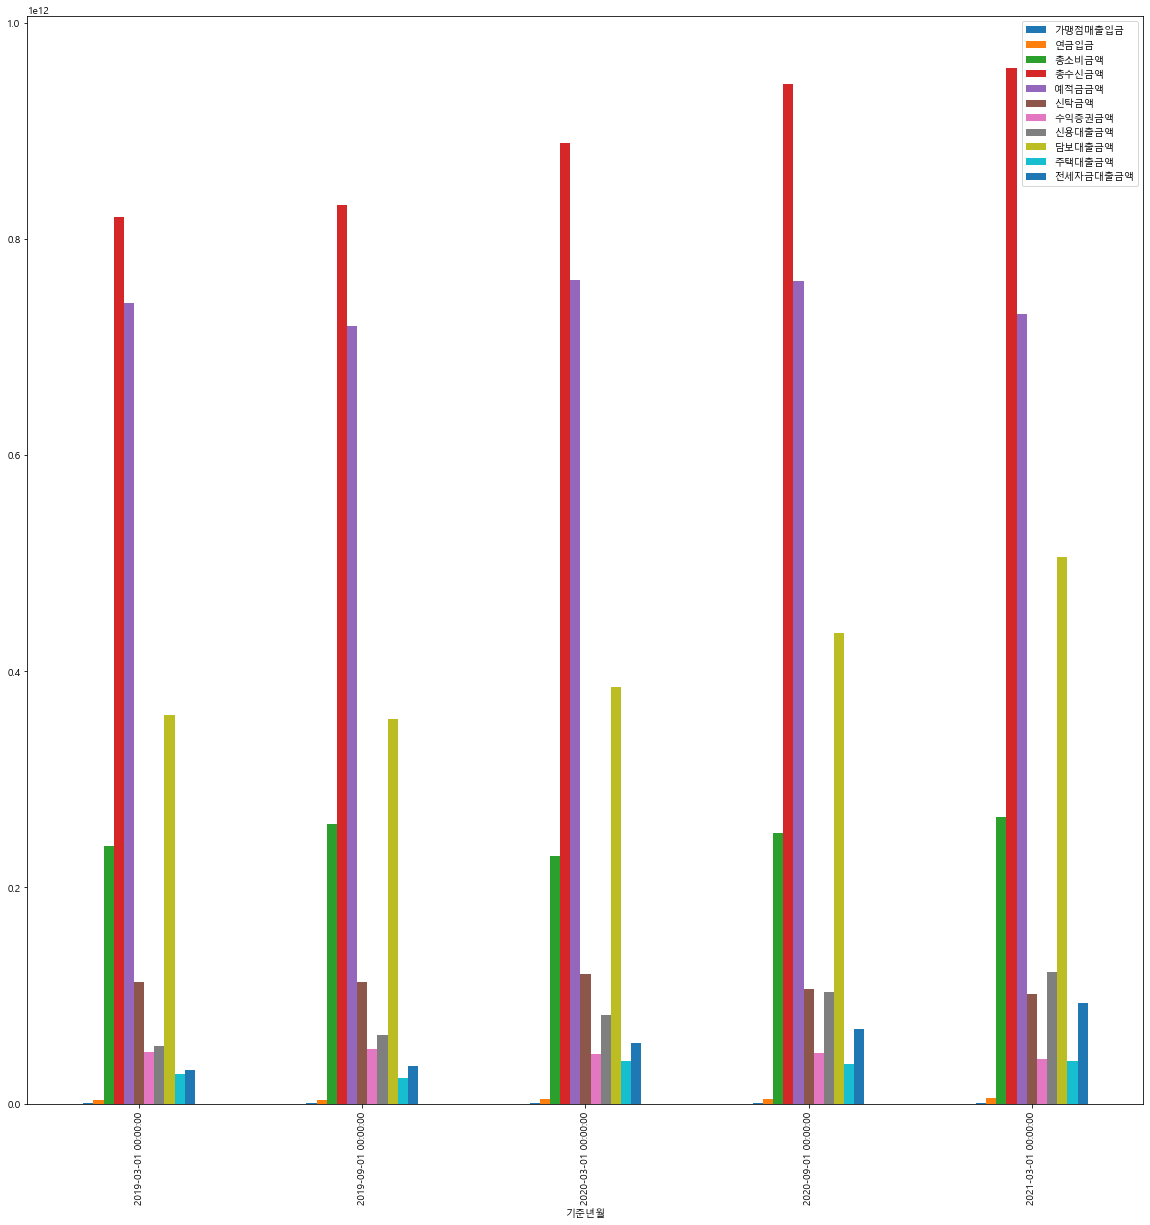

In [14]:
groupby_yr.plot.bar(x='기준년월',figsize=(20,20))

<AxesSubplot:xlabel='기준년월'>

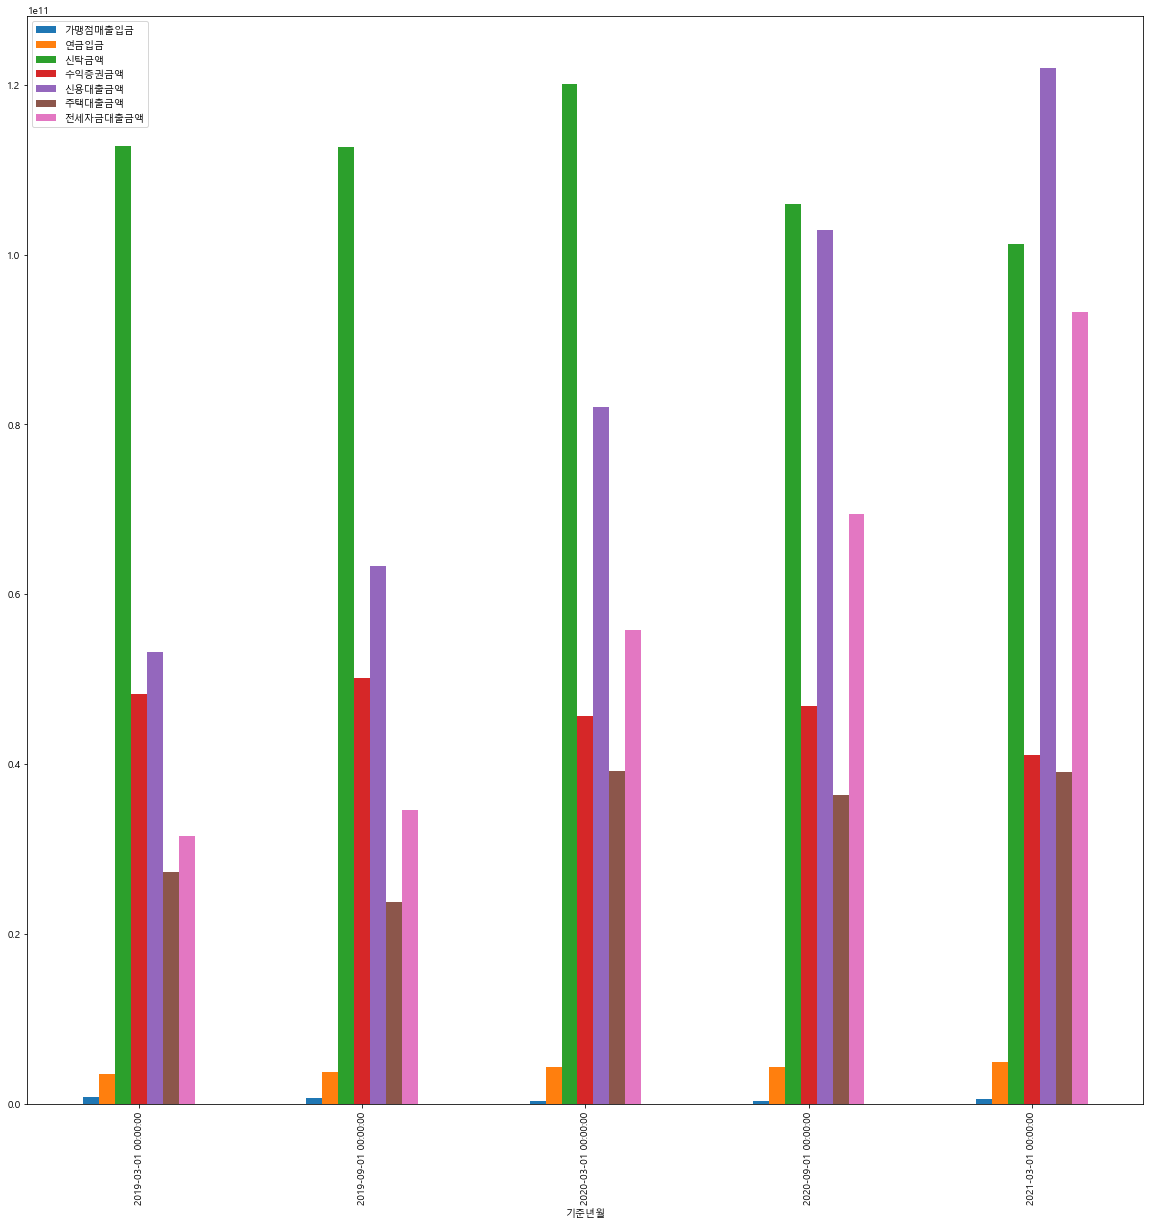

In [15]:
# 위의그림에서 단위가 작아 표현이 모호한 부분만 다시 확인합니다. 
groupby_yr[['기준년월','가맹점매출입금', '연금입금','신탁금액', '수익증권금액','신용대출금액','주택대출금액', '전세자금대출금액']].plot.bar(x='기준년월',figsize=(20,20))

<AxesSubplot:xlabel='기준년월'>

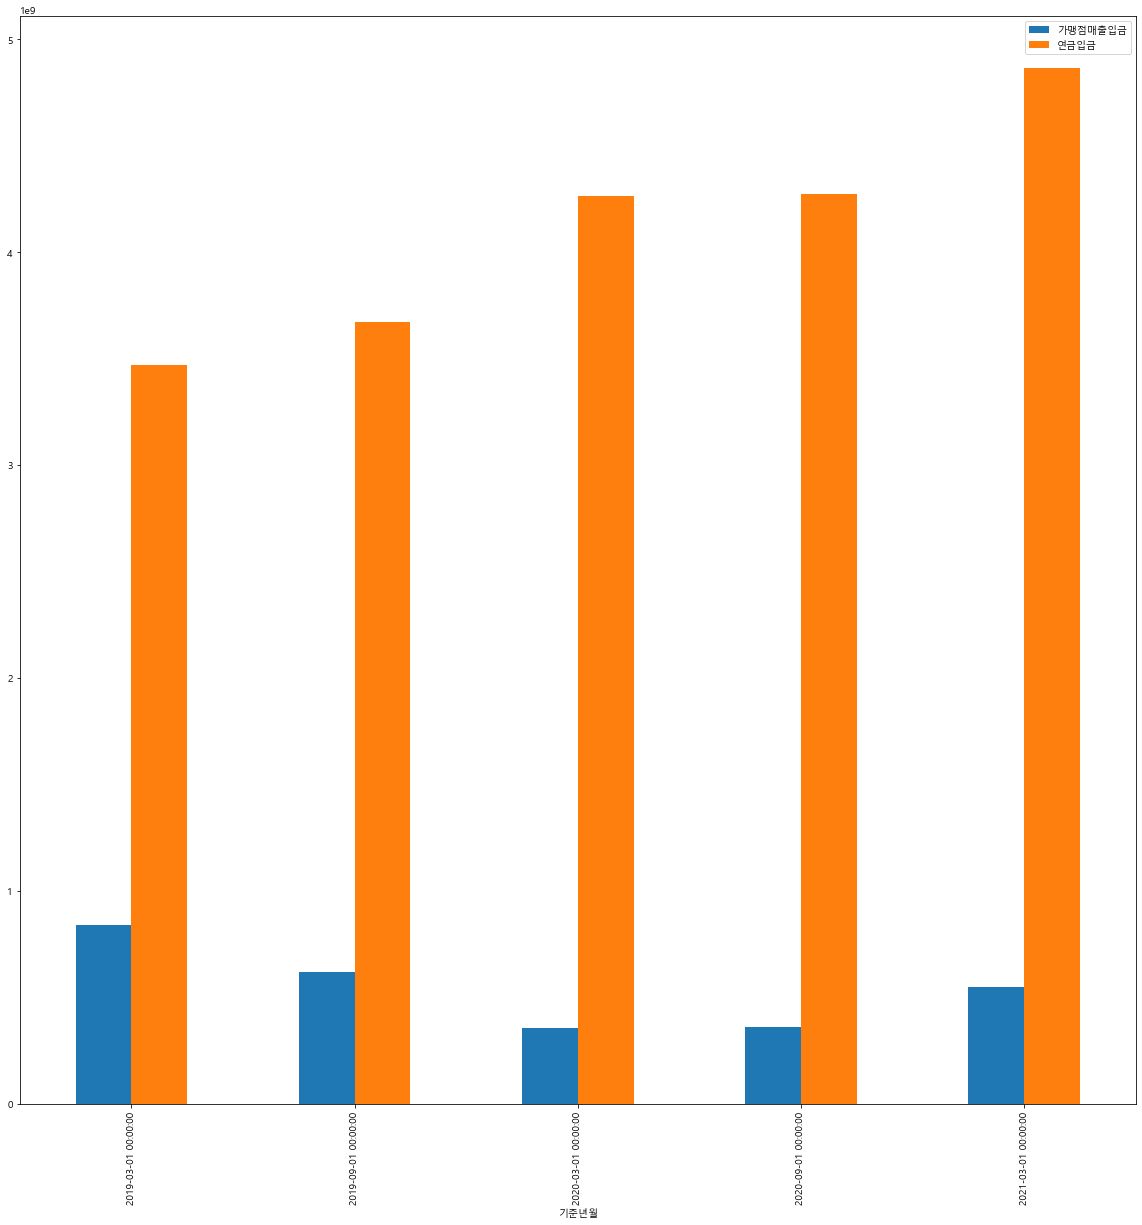

In [16]:
# 위의그림에서 단위가 작아 표현이 모호한 부분만 다시 확인합니다.
groupby_yr[['기준년월','가맹점매출입금', '연금입금']].plot.bar(x='기준년월',figsize=(20,20))

* 시간에 따른 변동률을 시각화 하기 위해, 데이터를 다시한번 처리하고 시각화를 진행합니다. 

* 연도별 전체 거래흐름 중 각 항목의 거래액의 비중 시각화 

In [17]:
groupby_yr.columns

Index(['기준년월', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

In [18]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액']

result_col = ['기준년월', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총거래액']


ratio_yr = pd.DataFrame(columns=result_col)
for idx, row in groupby_yr.iterrows():
    temp = []
    temp.append(row['기준년월'])
    
    total = 0
    for feature in features:
            total = total + row[feature]
            
    for feature in features:
            item = (row[feature]/total)
            temp.append(item)
    temp.append(total)
    ratio_yr= ratio_yr.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)


In [19]:
ratio_yr

기준년월   가맹점매출입금      연금입금     총소비금액     총수신금액     예적금금액      신탁금액  \
0 2019-03-01  0.000345  0.001424  0.097773  0.336703  0.303968  0.046281   
1 2019-09-01  0.000252  0.001495  0.105351  0.338799  0.293133  0.045881   
2 2020-03-01  0.000136  0.001631  0.087702  0.340052  0.291822  0.045955   
3 2020-09-01  0.000130  0.001551  0.090889  0.342267  0.276174  0.038450   
4 2021-03-01  0.000191  0.001700  0.092795  0.334807  0.255281  0.035369   

     수익증권금액    신용대출금액    담보대출금액    주택대출금액  전세자금대출금액           총거래액  
0  0.019804  0.021850  0.147757  0.011176  0.012919  2435975411163  
1  0.020413  0.025781  0.145109  0.009691  0.014096  2455167084822  
2  0.017485  0.031391  0.147494  0.014998  0.021333  2612554261056  
3  0.016986  0.037323  0.157854  0.013180  0.025196  2755944081944  
4  0.014369  0.042618  0.176611  0.013671  0.032588  2861378039053

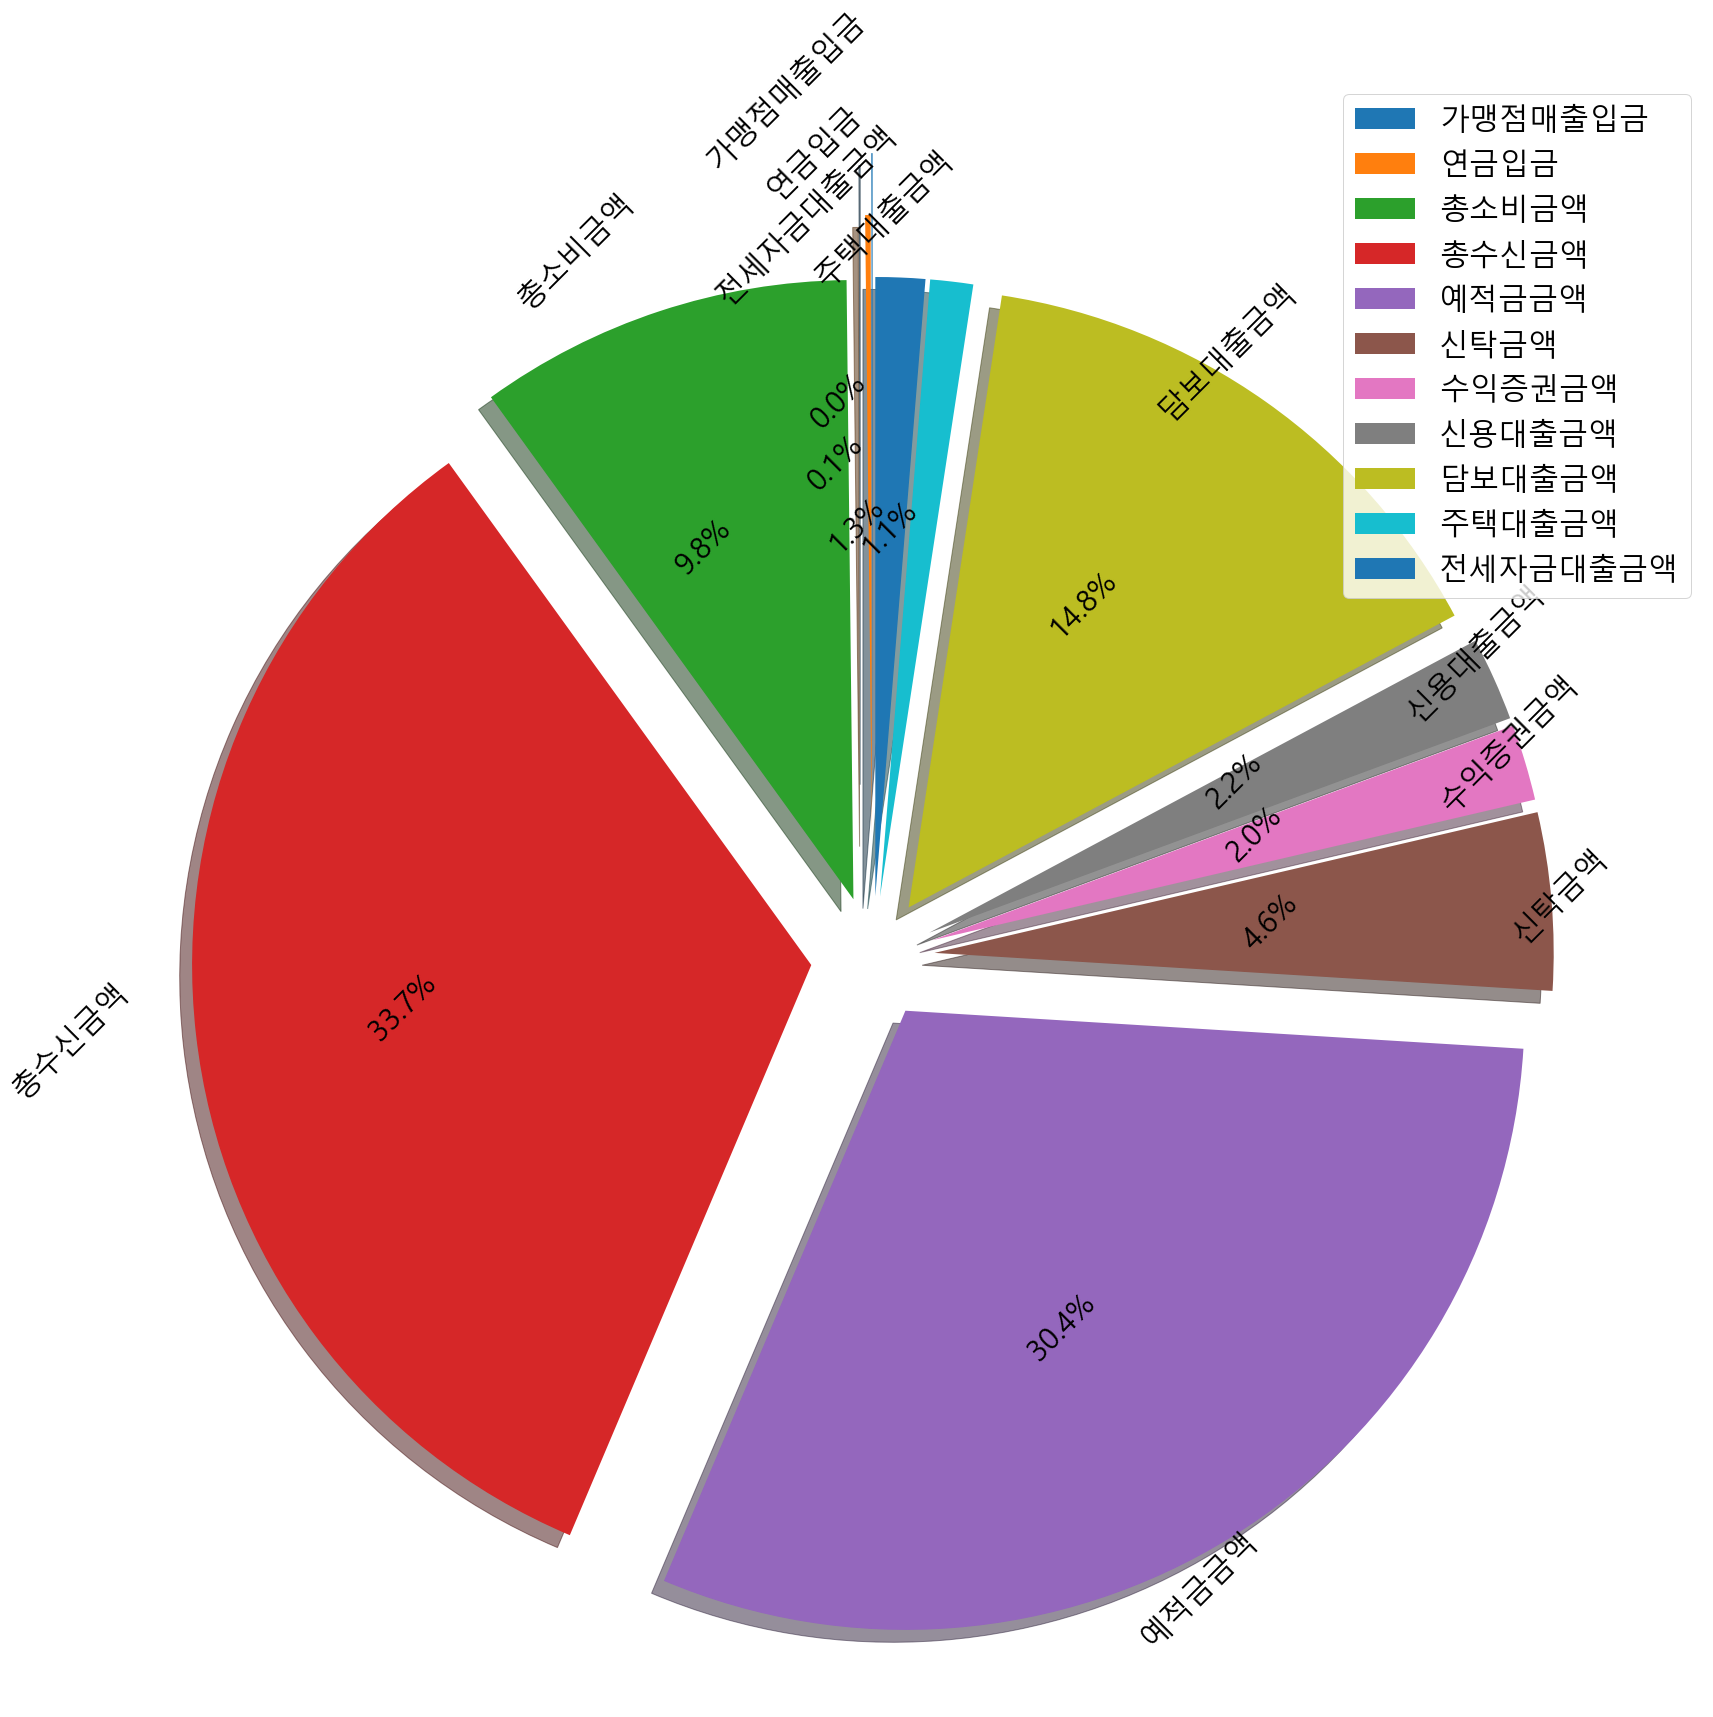

In [20]:
plt.figure(figsize=(30,30))
explode = [0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# colors = 

plt.pie(ratio_yr.iloc[0, 1:12],labels= features,  shadow=True, startangle=90, 
        autopct='%1.1f%%', textprops={'size': 30, 'rotation':45, 'ha':'right'}, explode=explode)
plt.legend(features, loc='best',fontsize=30)
plt.axis('equal')
plt.show()

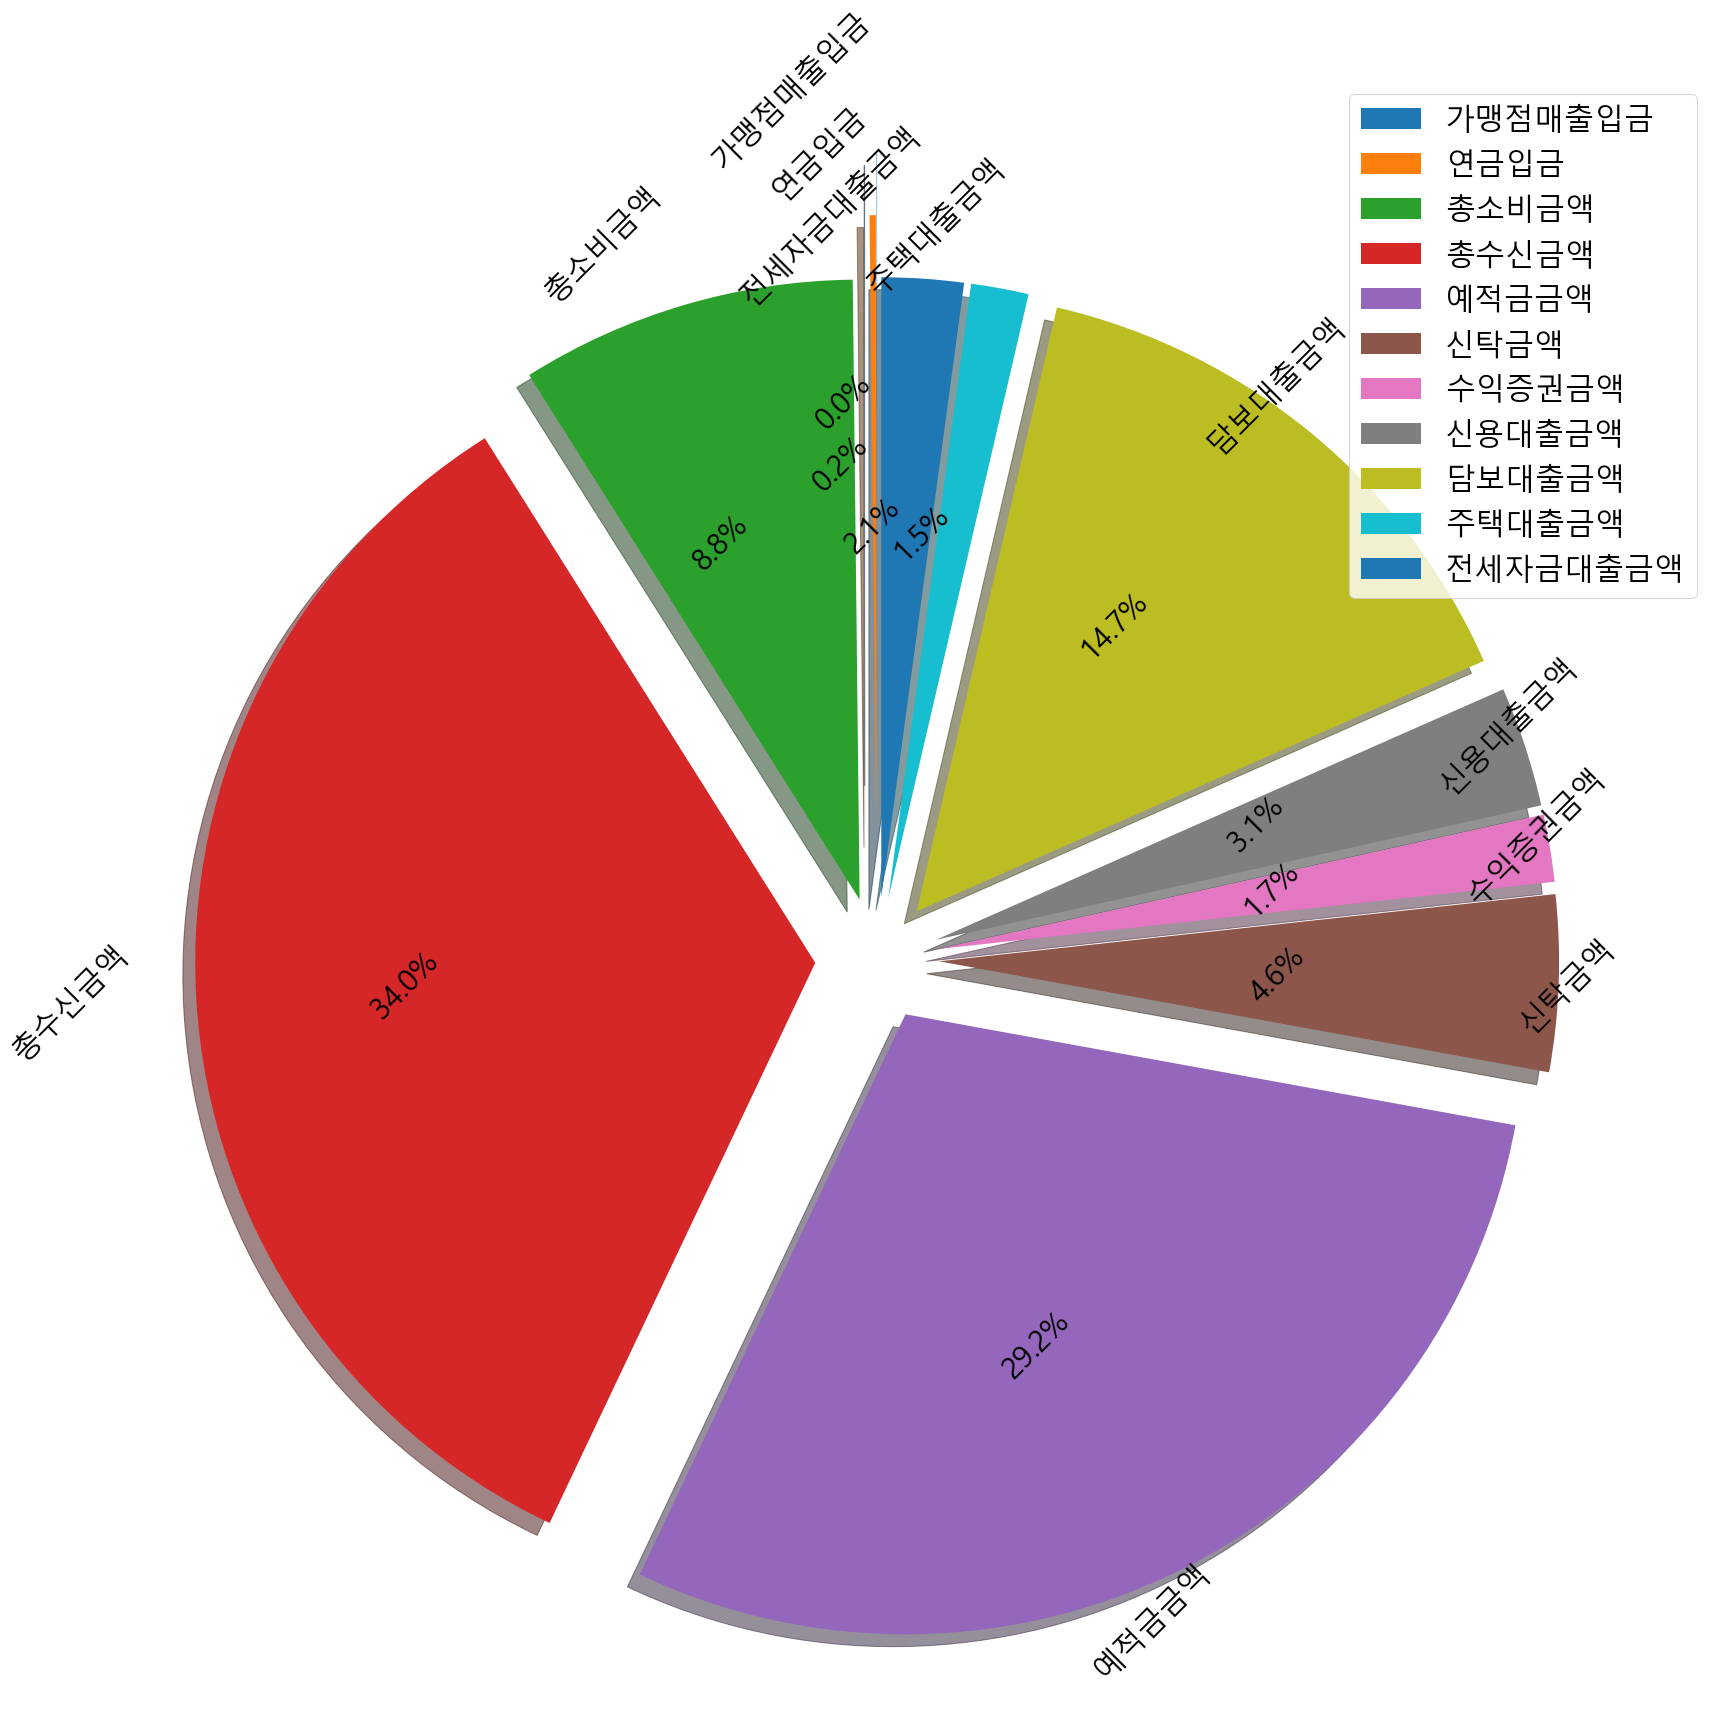

In [21]:
plt.figure(figsize=(30,30))
explode = [0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# colors = 

plt.pie(ratio_yr.iloc[2, 1:12],labels= features,  shadow=True, startangle=90, 
        autopct='%1.1f%%', textprops={'size': 30, 'rotation':45, 'ha':'right'}, explode=explode)
plt.legend(features, loc='best',fontsize=30)
plt.axis('equal')
plt.show()

In [22]:
for i in range(0,5):
    print(ratio_yr.iloc[i, 1:12].sort_values())

가맹점매출입금     0.000345
연금입금        0.001424
주택대출금액      0.011176
전세자금대출금액    0.012919
수익증권금액      0.019804
신용대출금액       0.02185
신탁금액        0.046281
총소비금액       0.097773
담보대출금액      0.147757
예적금금액       0.303968
총수신금액       0.336703
Name: 0, dtype: object
가맹점매출입금     0.000252
연금입금        0.001495
주택대출금액      0.009691
전세자금대출금액    0.014096
수익증권금액      0.020413
신용대출금액      0.025781
신탁금액        0.045881
총소비금액       0.105351
담보대출금액      0.145109
예적금금액       0.293133
총수신금액       0.338799
Name: 1, dtype: object
가맹점매출입금     0.000136
연금입금        0.001631
주택대출금액      0.014998
수익증권금액      0.017485
전세자금대출금액    0.021333
신용대출금액      0.031391
신탁금액        0.045955
총소비금액       0.087702
담보대출금액      0.147494
예적금금액       0.291822
총수신금액       0.340052
Name: 2, dtype: object
가맹점매출입금      0.00013
연금입금        0.001551
주택대출금액       0.01318
수익증권금액      0.016986
전세자금대출금액    0.025196
신용대출금액      0.037323
신탁금액         0.03845
총소비금액       0.090889
담보대출금액      0.157854
예적금금액       0.276174
총수신금액       0.342267
Name: 3

* 2020년 3월 부터 전체 거래량 비중에서 전세자금 대출액의 거래규모가 수익증권금액의 규모를 역전했다. 

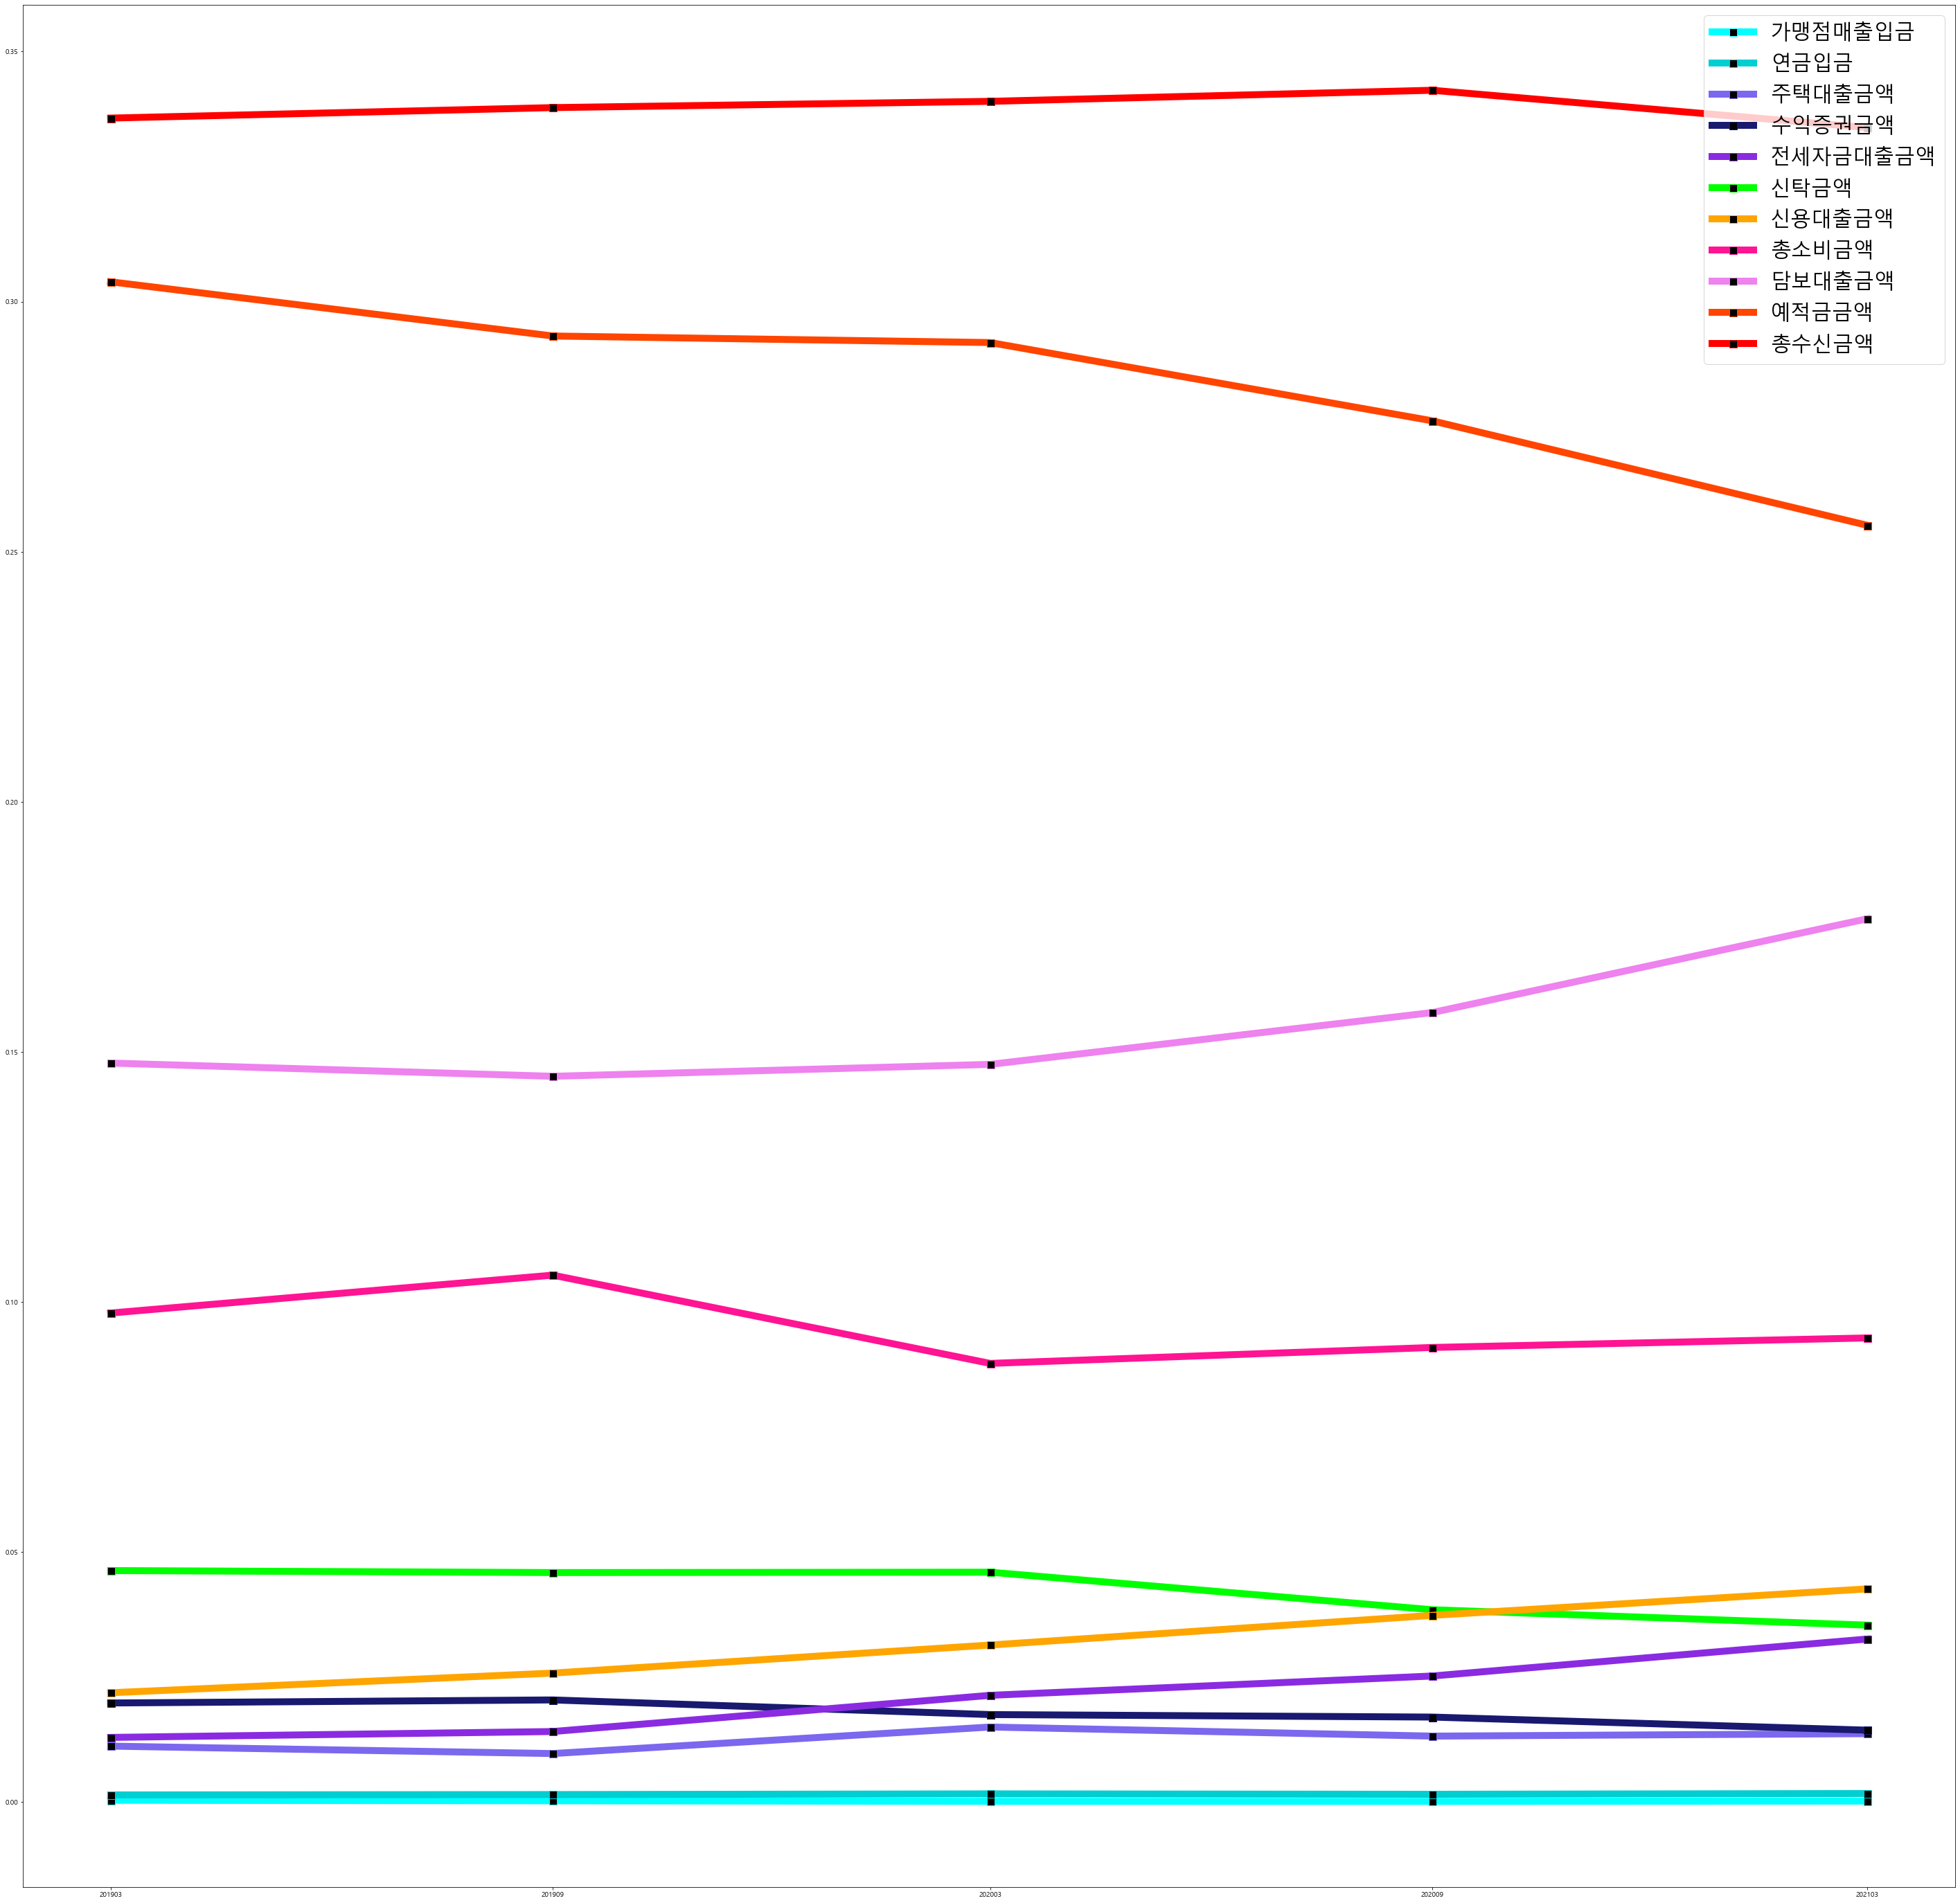

In [23]:
plt.figure(figsize=(50,50))
plt.plot(ratio_yr.기준년월, ratio_yr.가맹점매출입금,marker='s', color='cyan', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.연금입금,marker='s', color='darkturquoise', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.주택대출금액,marker='s', color='mediumslateblue', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.수익증권금액,marker='s', color='midnightblue', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.전세자금대출금액,marker='s', color='blueviolet', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.신탁금액,marker='s', color='lime', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.신용대출금액,marker='s', color='orange', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.총소비금액,marker='s', color='deeppink', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.담보대출금액,marker='s', color='violet', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.예적금금액,marker='s', color='orangered', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.총수신금액,marker='s', color='r', linewidth=10, markersize=11, markerfacecolor='black')


# plt.set_xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
#        '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
#        '2021-03-01T00:00:00.000000000'])
plt.xticks(ticks=['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],labels=['201903','201909','202003','202009','202103'])
plt.legend(['가맹점매출입금','연금입금','주택대출금액','수익증권금액',
            '전세자금대출금액','신탁금액','신용대출금액','총소비금액',
            '담보대출금액','예적금금액','총수신금액'], loc='best',fontsize=30)

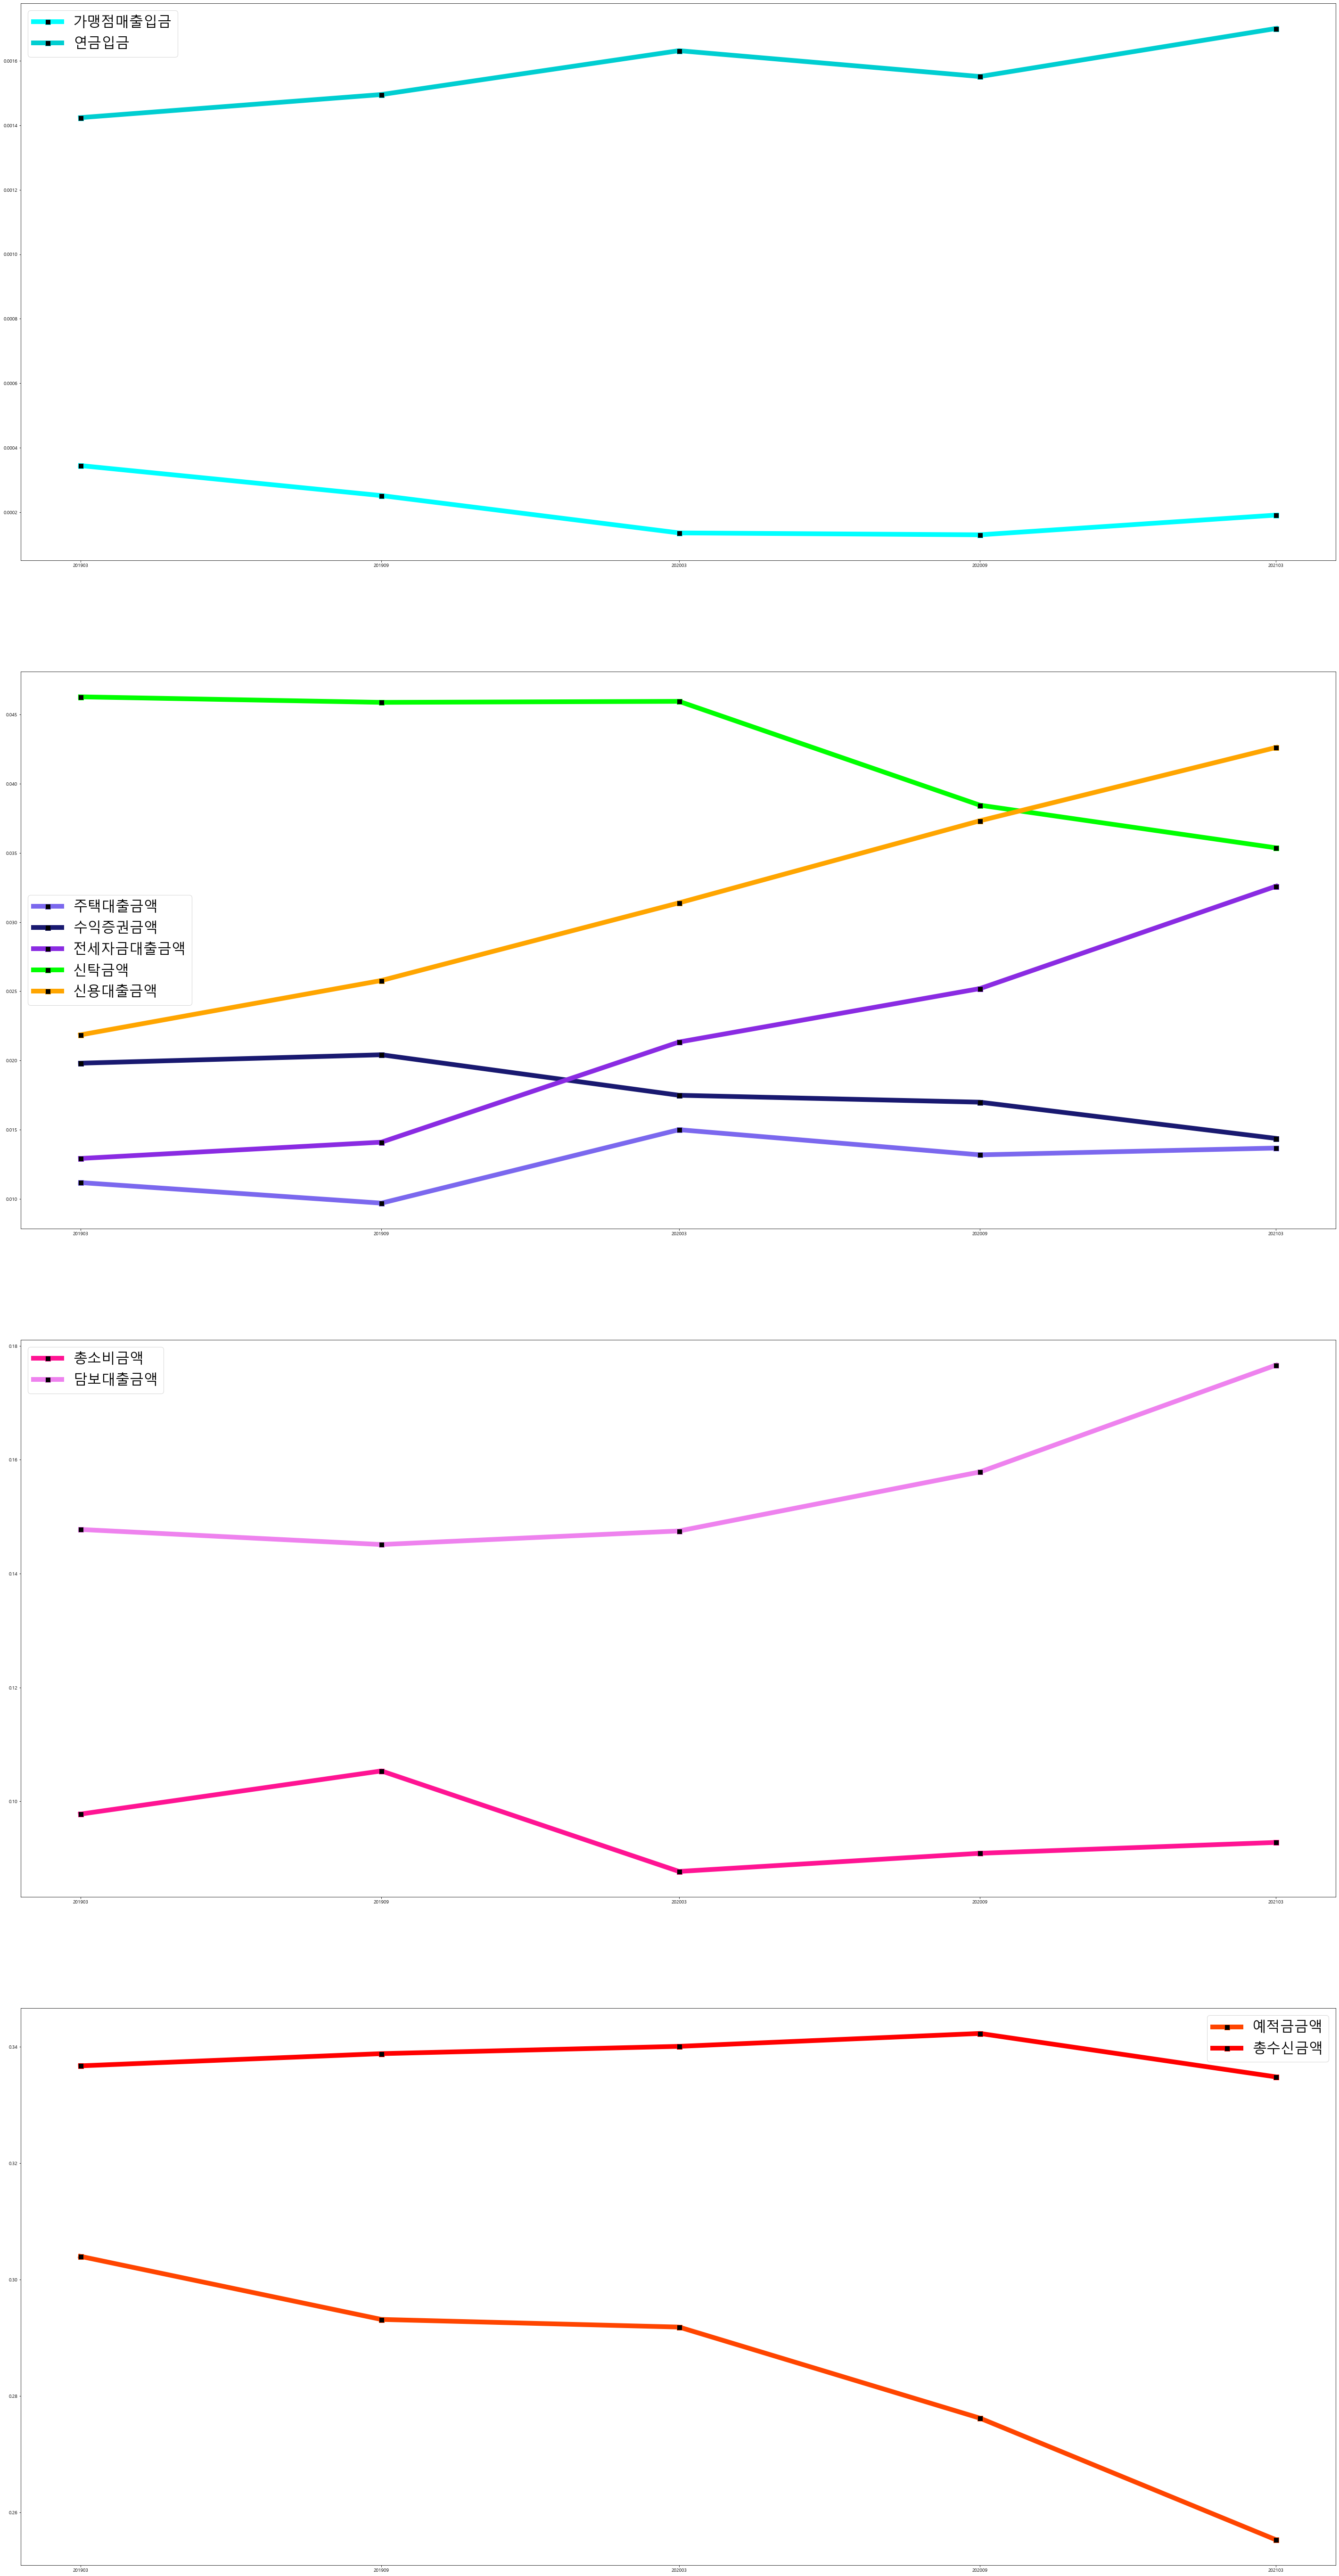

In [24]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(50,100))

ax1.plot(ratio_yr.기준년월, ratio_yr.가맹점매출입금,marker='s', color='cyan', linewidth=10, markersize=11, markerfacecolor='black')
ax1.plot(ratio_yr.기준년월, ratio_yr.연금입금,marker='s', color='darkturquoise', linewidth=10, markersize=11, markerfacecolor='black')
ax1.set_xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'])
ax1.set_xticklabels(['201903','201909','202003','202009','202103'])
ax1.legend(['가맹점매출입금','연금입금'], loc='best',fontsize=30)

ax2.plot(ratio_yr.기준년월, ratio_yr.주택대출금액,marker='s', color='mediumslateblue', linewidth=10, markersize=11, markerfacecolor='black')
ax2.plot(ratio_yr.기준년월, ratio_yr.수익증권금액,marker='s', color='midnightblue', linewidth=10, markersize=11, markerfacecolor='black')
ax2.plot(ratio_yr.기준년월, ratio_yr.전세자금대출금액,marker='s', color='blueviolet', linewidth=10, markersize=11, markerfacecolor='black')
ax2.plot(ratio_yr.기준년월, ratio_yr.신탁금액,marker='s', color='lime', linewidth=10, markersize=11, markerfacecolor='black')
ax2.plot(ratio_yr.기준년월, ratio_yr.신용대출금액,marker='s', color='orange', linewidth=10, markersize=11, markerfacecolor='black')
ax2.set_xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'])
ax2.set_xticklabels(['201903','201909','202003','202009','202103'])
ax2.legend(['주택대출금액','수익증권금액','전세자금대출금액','신탁금액','신용대출금액'], loc='best',fontsize=30)


ax3.plot(ratio_yr.기준년월, ratio_yr.총소비금액,marker='s', color='deeppink', linewidth=10, markersize=11, markerfacecolor='black')
ax3.plot(ratio_yr.기준년월, ratio_yr.담보대출금액,marker='s', color='violet', linewidth=10, markersize=11, markerfacecolor='black')
ax3.set_xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'])
ax3.set_xticklabels(['201903','201909','202003','202009','202103'])
ax3.legend(['총소비금액','담보대출금액'], loc='best',fontsize=30)

ax4.plot(ratio_yr.기준년월, ratio_yr.예적금금액,marker='s', color='orangered', linewidth=10, markersize=11, markerfacecolor='black')
ax4.plot(ratio_yr.기준년월, ratio_yr.총수신금액,marker='s', color='r', linewidth=10, markersize=11, markerfacecolor='black')
ax4.set_xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'])
ax4.set_xticklabels(['201903','201909','202003','202009','202103'])
ax4.legend(['예적금금액','총수신금액'], loc='best',fontsize=30)

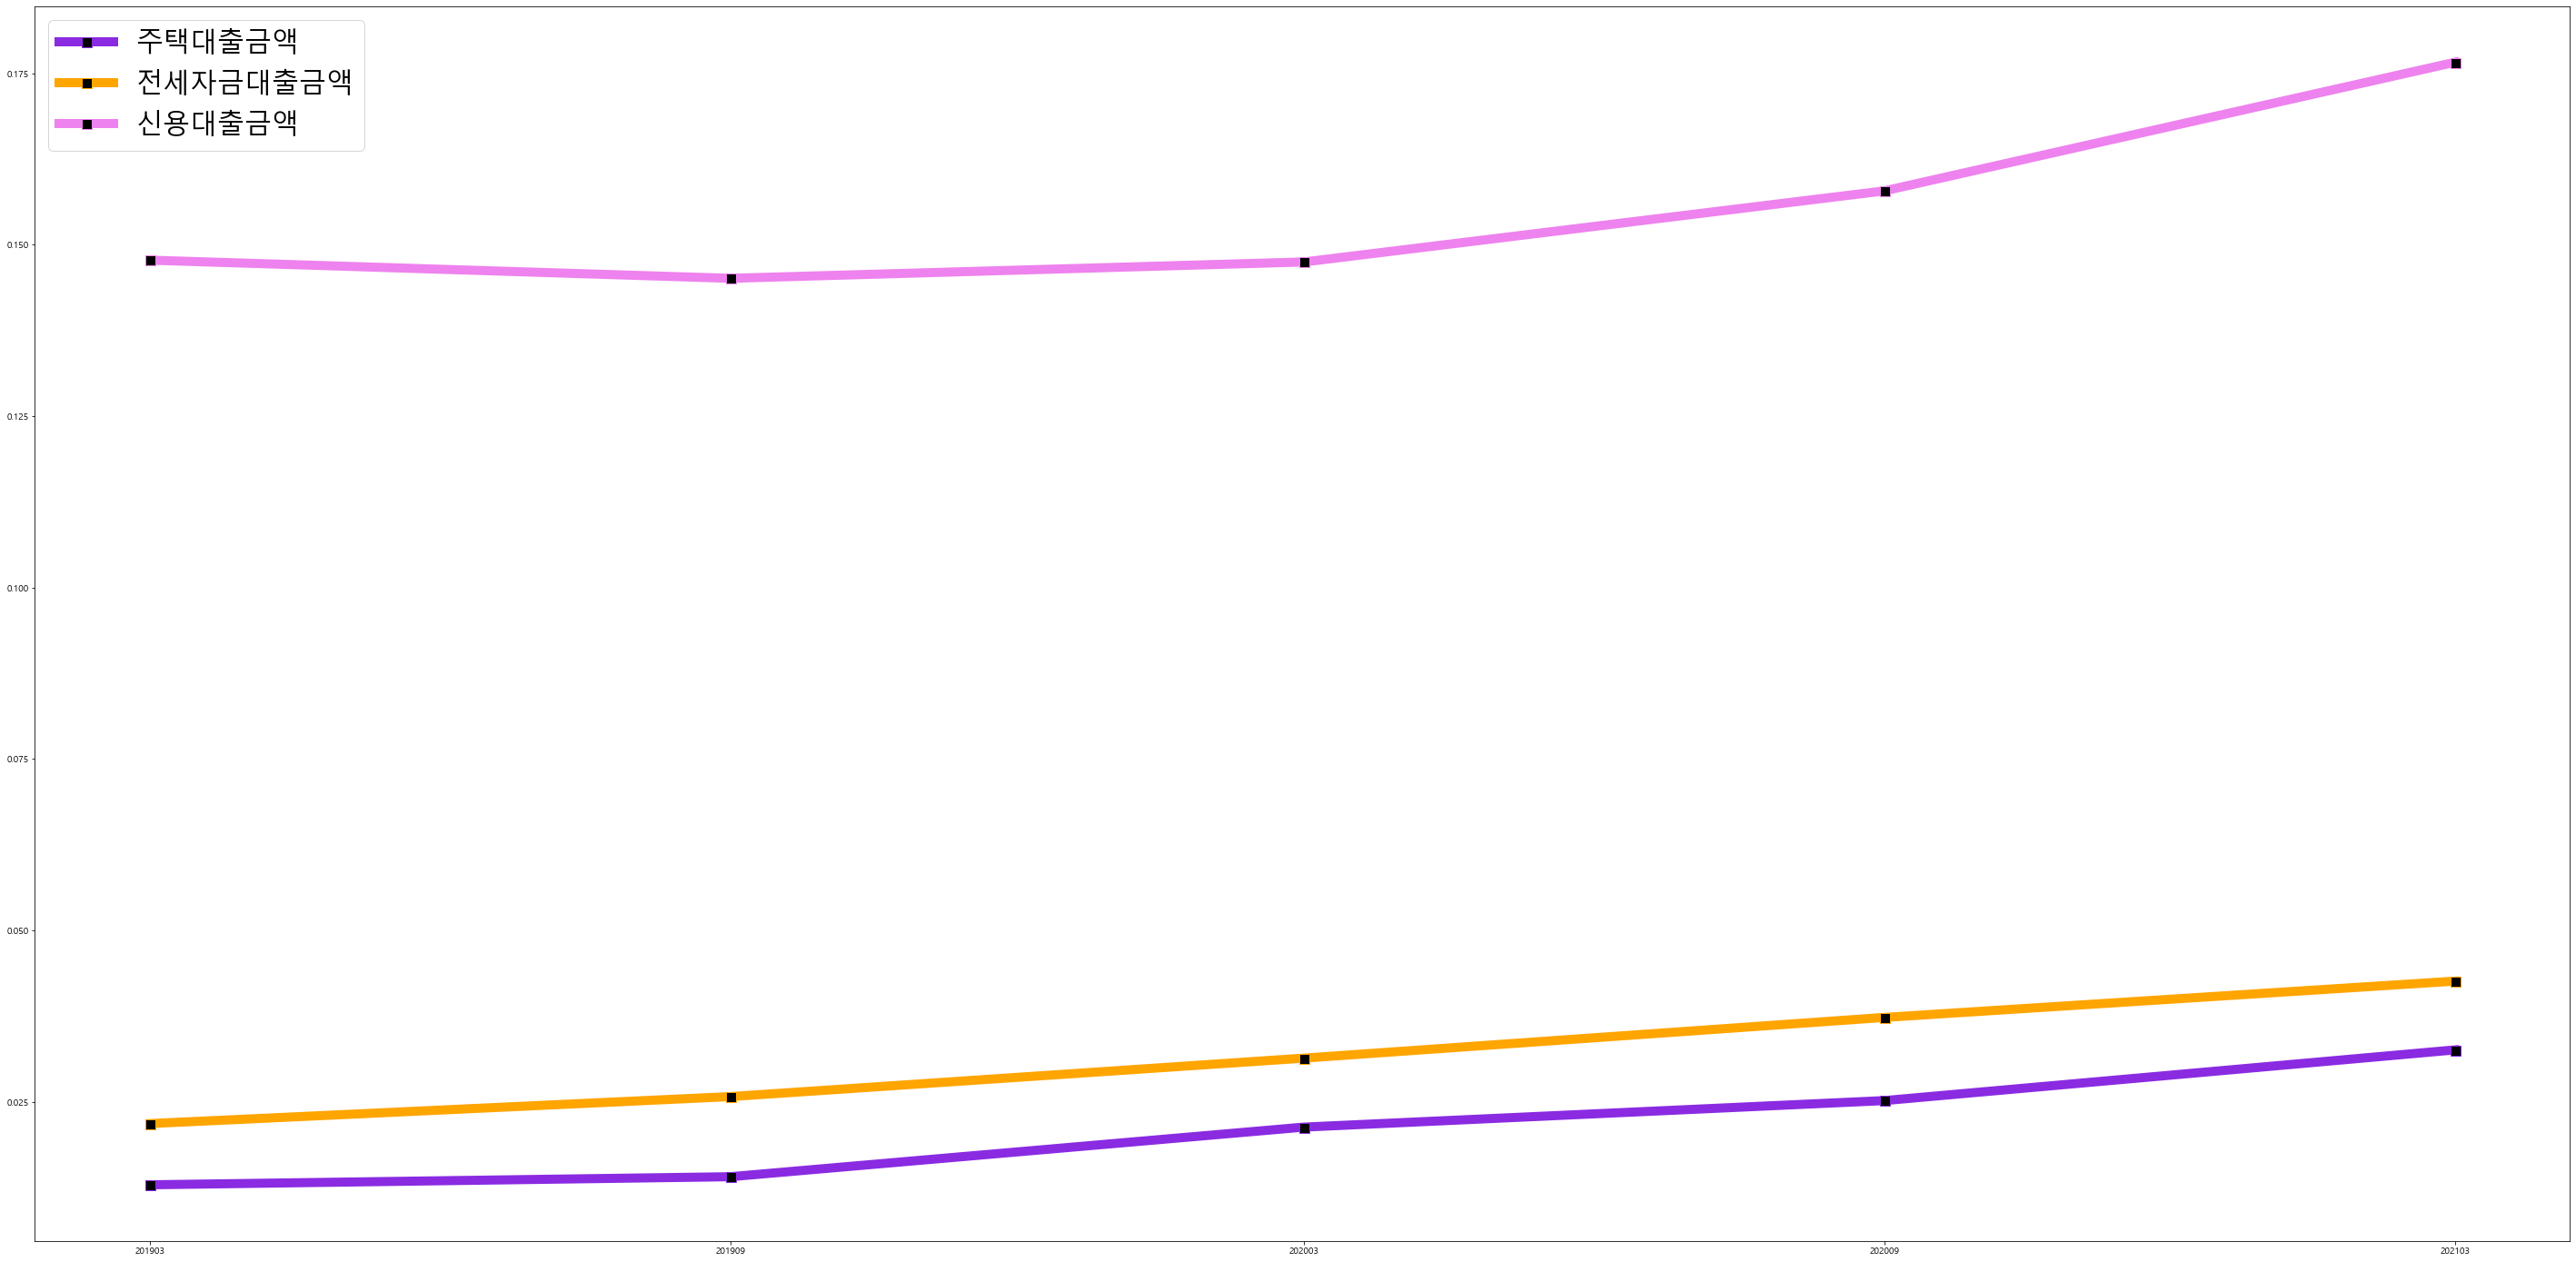

In [25]:
plt.figure(figsize=(50,25))
plt.plot(ratio_yr.기준년월, ratio_yr.전세자금대출금액,marker='s', color='blueviolet', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.신용대출금액,marker='s', color='orange', linewidth=10, markersize=11, markerfacecolor='black')
plt.plot(ratio_yr.기준년월, ratio_yr.담보대출금액,marker='s', color='violet', linewidth=10, markersize=11, markerfacecolor='black')

plt.xticks(ticks=['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],labels=['201903','201909','202003','202009','202103'])
plt.legend(['주택대출금액','전세자금대출금액','신용대출금액'], loc='best',fontsize=30)

* 주택담보대출액을 제외한 주택, 전세, 신용 세가지의 대출 유형 모두 증가 

**해당 변동이 어느 지역 혹은 연령등의 구분에서 발생했는지 더욱 알아봅니다.**

## 지역별 분석 

* 구별 분석 -> 동별분석 
* 각 구별, 시점별 비중이나 변동 확인 후 시각화 
* 변동이 큰 구에 대해 조금 더 자세히 

In [26]:
import folium
import json
import requests
import branca
from branca.colormap import linear
from folium import plugins

### 지역구별 분석 

In [27]:
groupby_gu = sinhan.groupby(['기준년월','지역구'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'].sum().reset_index()
groupby_gu

<ipython-input-27-b6d6125cab8e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_gu = sinhan.groupby(['기준년월','지역구'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',


기준년월  지역구    가맹점매출입금       연금입금        총소비금액        총수신금액  \
0   2019-03-01  강남구  173412507  365400221  16626306023  66265751376   
1   2019-03-01  강동구   84242683  118722105   9915572200  31900758352   
2   2019-03-01  강북구    5653934   82524896   6551953668  18682877550   
3   2019-03-01  강서구   10559121  267245011  14346285799  46769935605   
4   2019-03-01  관악구          0  141147592  11678424939  36141077411   
..         ...  ...        ...        ...          ...          ...   
120 2021-03-01  용산구   18695544  167562448   7584354899  27368154427   
121 2021-03-01  은평구   10263394  232881278  12324084480  39809952364   
122 2021-03-01  종로구    5493582   77978619   4491112168  17084454231   
123 2021-03-01   중구   43605712   74340911   4155109598  14593820095   
124 2021-03-01  중랑구    3463566  204467522  10344237289  30829164915   

           예적금금액         신탁금액       수익증권금액      신용대출금액       담보대출금액  \
0    66780046022  29969789931  13146476407  8398123775  52879247332   
1    29806888712   2422721467    710585983  1995387250  16417044601   
2    12628997836    291664029    106076954   296691578   1520066566   
3    41318295318   3602488309   1739623066  4506563397  29945374971   
4    31773566547    746121608    297621929  1361769862   7048991333   
..           ...          ...          ...         ...          ...   
120  22655128365   5171537223   3573729278  4160674619  15771981629   
121  31002213340   1100051283    411047788  2558517675  17824555171   
122  11234418377   1712180588    656760950  2190165028   5449028651   
123  11492089990   1094708366    356598858  1833526322  10433414708   
124  24158110464    619518784     83871278   976390044   9348915009   

         주택대출금액    전세자금대출금액  
0    3720550086  1732694789  
1    1131388012  1914048349  
2     229694008           0  
3     903776072  7976047537  
4     390791675   785667972  
..          ...         ...  
120   312357166  2230641179  
121  1318945966  2375551423  
122   538145372   665040000  
123   706965444   238839897  
124   868669355  1772580585  

[125 rows x 13 columns]

In [28]:
# 각 지역구의 평균적인 거래 정보를 산출합니다.  
groupby_gu_mean= groupby_gu.groupby(['지역구'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'].mean().reset_index()

<ipython-input-28-91959296d190>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_gu_mean= groupby_gu.groupby(['지역구'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',


In [29]:
groupby_gu_mean

지역구     가맹점매출입금         연금입금         총소비금액         총수신금액         예적금금액  \
0    강남구  97289927.4  383734347.8  1.764281e+10  7.274105e+10  6.700719e+10   
1    강동구  45839906.4  156850826.0  1.047034e+10  3.596225e+10  3.159300e+10   
2    강북구   6115538.6   91832440.6  6.773368e+09  1.993318e+10  1.276773e+10   
3    강서구   5905230.6  313044651.4  1.505123e+10  5.115208e+10  4.230468e+10   
4    관악구   1237154.6  159706280.2  1.222530e+10  3.899937e+10  3.240677e+10   
5    광진구   7612697.6   71399290.0  8.652355e+09  2.968517e+10  2.274808e+10   
6    구로구   8701516.8  159728864.2  9.286095e+09  3.121683e+10  2.590678e+10   
7    금천구  15847253.2   72652850.4  5.450528e+09  1.550907e+10  1.383739e+10   
8    노원구  19522554.0  245253752.6  1.205044e+10  4.242653e+10  3.583423e+10   
9    도봉구   4119584.0  222661758.2  8.433355e+09  2.795757e+10  2.558741e+10   
10  동대문구   7450134.8   76247553.0  7.493482e+09  2.530502e+10  1.687216e+10   
11   동작구   5028687.8  240988232.8  1.050340e+10  3.811340e+10  3.630511e+10   
12   마포구  16796545.0  130704639.8  1.001737e+10  3.785856e+10  3.074507e+10   
13  서대문구  10546161.2   87552607.2  7.194924e+09  2.578035e+10  1.792704e+10   
14   서초구  66086047.0  273939896.0  1.400910e+10  5.956964e+10  5.083987e+10   
15   성동구   4016087.0   86992080.0  8.554567e+09  3.108051e+10  2.557350e+10   
16   성북구  10593436.0  206032290.6  1.037563e+10  3.786525e+10  2.958887e+10   
17   송파구  71656580.8  311975783.4  1.792198e+10  7.160528e+10  6.468611e+10   
18   양천구  53546910.8  102025126.6  1.103895e+10  4.130590e+10  3.265037e+10   
19  영등포구  12091346.8  114871018.8  8.790719e+09  3.334659e+10  2.533376e+10   
20   용산구  27421970.0  139167319.6  7.114332e+09  2.541018e+10  2.328612e+10   
21   은평구  10372677.8  196912168.0  1.151359e+10  3.713361e+10  3.078149e+10   
22   종로구   4671997.0   63458961.8  4.219116e+09  1.589778e+10  1.182576e+10   
23    중구  21318312.0   55928199.4  3.919449e+09  1.377949e+10  1.203825e+10   
24   중랑구   9683784.0  144809944.0  9.689773e+09  2.870303e+10  2.437806e+10   

            신탁금액        수익증권금액        신용대출금액        담보대출금액        주택대출금액  \
0   2.908531e+10  1.280537e+10  1.136618e+10  4.988484e+10  3.455814e+09   
1   2.364603e+09  8.271457e+08  3.809934e+09  1.775742e+10  2.136634e+09   
2   1.629113e+08  5.132320e+07  3.622221e+08  1.837332e+09  6.176850e+07   
3   3.330847e+09  1.584532e+09  6.962561e+09  3.998686e+10  7.887969e+08   
4   6.919208e+08  2.622962e+08  2.050796e+09  1.271516e+10  3.910951e+08   
5   3.225747e+09  1.358430e+09  1.868676e+09  1.008436e+10  7.240312e+08   
6   1.358441e+09  5.325979e+08  2.146064e+09  1.669865e+10  8.555755e+08   
7   2.631427e+08  6.880709e+07  4.394190e+08  1.283745e+10  1.889322e+09   
8   2.762041e+09  6.697655e+08  4.929753e+09  1.027494e+10  8.476187e+08   
9   1.496183e+09  3.814308e+08  4.840948e+08  5.263320e+09  3.360979e+08   
10  4.451009e+08  1.483536e+08  5.567405e+08  6.857858e+09  4.895593e+07   
11  2.420592e+09  1.239337e+09  2.158446e+09  1.506423e+10  2.254609e+09   
12  3.834449e+09  1.360057e+09  4.248483e+09  2.185426e+10  4.097217e+09   
13  1.051854e+09  2.639229e+08  1.575499e+09  8.294675e+09  1.273875e+09   
14  1.791271e+10  8.800515e+09  1.140063e+10  3.390671e+10  1.959220e+09   
15  2.312682e+09  6.949405e+08  2.845209e+09  9.105380e+09  6.665838e+08   
16  2.737148e+09  9.236630e+08  2.320455e+09  9.950172e+09  9.172349e+08   
17  1.350897e+10  5.515609e+09  8.131467e+09  3.713854e+10  5.435420e+09   
18  7.413619e+09  2.383284e+09  4.418730e+09  1.752936e+10  5.602964e+08   
19  3.390399e+09  1.114009e+09  5.149841e+09  2.352208e+10  5.452668e+08   
20  5.476384e+09  3.555418e+09  2.734332e+09  1.168164e+10  4.431113e+08   
21  1.116598e+09  3.870831e+08  1.623705e+09  1.654065e+10  1.709662e+09   
22  1.971436e+09  7.358959e+08  1.527327e+09  4.468453e+09  7.679891e+08   
23  1.476828e+09  5.642231e+08  1.077750e+09  9.087373e+09  4.463131e+08   
24  7.130742e+08  1.660039e+08  4.796409e+08  6.04

In [30]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액']

groupby_gu_mean['총거래량'] = np.nan
for idx, row in groupby_gu_mean.iterrows():
    total = 0
    for feature in features:
        total = total + row[feature]
    groupby_gu_mean['총거래량'][idx] = total
    

<ipython-input-30-73c389363440>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupby_gu_mean['총거래량'][idx] = total


In [31]:
groupby_gu_mean

지역구     가맹점매출입금         연금입금         총소비금액         총수신금액         예적금금액  \
0    강남구  97289927.4  383734347.8  1.764281e+10  7.274105e+10  6.700719e+10   
1    강동구  45839906.4  156850826.0  1.047034e+10  3.596225e+10  3.159300e+10   
2    강북구   6115538.6   91832440.6  6.773368e+09  1.993318e+10  1.276773e+10   
3    강서구   5905230.6  313044651.4  1.505123e+10  5.115208e+10  4.230468e+10   
4    관악구   1237154.6  159706280.2  1.222530e+10  3.899937e+10  3.240677e+10   
5    광진구   7612697.6   71399290.0  8.652355e+09  2.968517e+10  2.274808e+10   
6    구로구   8701516.8  159728864.2  9.286095e+09  3.121683e+10  2.590678e+10   
7    금천구  15847253.2   72652850.4  5.450528e+09  1.550907e+10  1.383739e+10   
8    노원구  19522554.0  245253752.6  1.205044e+10  4.242653e+10  3.583423e+10   
9    도봉구   4119584.0  222661758.2  8.433355e+09  2.795757e+10  2.558741e+10   
10  동대문구   7450134.8   76247553.0  7.493482e+09  2.530502e+10  1.687216e+10   
11   동작구   5028687.8  240988232.8  1.050340e+10  3.811340e+10  3.630511e+10   
12   마포구  16796545.0  130704639.8  1.001737e+10  3.785856e+10  3.074507e+10   
13  서대문구  10546161.2   87552607.2  7.194924e+09  2.578035e+10  1.792704e+10   
14   서초구  66086047.0  273939896.0  1.400910e+10  5.956964e+10  5.083987e+10   
15   성동구   4016087.0   86992080.0  8.554567e+09  3.108051e+10  2.557350e+10   
16   성북구  10593436.0  206032290.6  1.037563e+10  3.786525e+10  2.958887e+10   
17   송파구  71656580.8  311975783.4  1.792198e+10  7.160528e+10  6.468611e+10   
18   양천구  53546910.8  102025126.6  1.103895e+10  4.130590e+10  3.265037e+10   
19  영등포구  12091346.8  114871018.8  8.790719e+09  3.334659e+10  2.533376e+10   
20   용산구  27421970.0  139167319.6  7.114332e+09  2.541018e+10  2.328612e+10   
21   은평구  10372677.8  196912168.0  1.151359e+10  3.713361e+10  3.078149e+10   
22   종로구   4671997.0   63458961.8  4.219116e+09  1.589778e+10  1.182576e+10   
23    중구  21318312.0   55928199.4  3.919449e+09  1.377949e+10  1.203825e+10   
24   중랑구   9683784.0  144809944.0  9.689773e+09  2.870303e+10  2.437806e+10   

            신탁금액        수익증권금액        신용대출금액        담보대출금액        주택대출금액  \
0   2.908531e+10  1.280537e+10  1.136618e+10  4.988484e+10  3.455814e+09   
1   2.364603e+09  8.271457e+08  3.809934e+09  1.775742e+10  2.136634e+09   
2   1.629113e+08  5.132320e+07  3.622221e+08  1.837332e+09  6.176850e+07   
3   3.330847e+09  1.584532e+09  6.962561e+09  3.998686e+10  7.887969e+08   
4   6.919208e+08  2.622962e+08  2.050796e+09  1.271516e+10  3.910951e+08   
5   3.225747e+09  1.358430e+09  1.868676e+09  1.008436e+10  7.240312e+08   
6   1.358441e+09  5.325979e+08  2.146064e+09  1.669865e+10  8.555755e+08   
7   2.631427e+08  6.880709e+07  4.394190e+08  1.283745e+10  1.889322e+09   
8   2.762041e+09  6.697655e+08  4.929753e+09  1.027494e+10  8.476187e+08   
9   1.496183e+09  3.814308e+08  4.840948e+08  5.263320e+09  3.360979e+08   
10  4.451009e+08  1.483536e+08  5.567405e+08  6.857858e+09  4.895593e+07   
11  2.420592e+09  1.239337e+09  2.158446e+09  1.506423e+10  2.254609e+09   
12  3.834449e+09  1.360057e+09  4.248483e+09  2.185426e+10  4.097217e+09   
13  1.051854e+09  2.639229e+08  1.575499e+09  8.294675e+09  1.273875e+09   
14  1.791271e+10  8.800515e+09  1.140063e+10  3.390671e+10  1.959220e+09   
15  2.312682e+09  6.949405e+08  2.845209e+09  9.105380e+09  6.665838e+08   
16  2.737148e+09  9.236630e+08  2.320455e+09  9.950172e+09  9.172349e+08   
17  1.350897e+10  5.515609e+09  8.131467e+09  3.713854e+10  5.435420e+09   
18  7.413619e+09  2.383284e+09  4.418730e+09  1.752936e+10  5.602964e+08   
19  3.390399e+09  1.114009e+09  5.149841e+09  2.352208e+10  5.452668e+08   
20  5.476384e+09  3.555418e+09  2.734332e+09  1.168164e+10  4.431113e+08   
21  1.116598e+09  3.870831e+08  1.623705e+09  1.654065e+10  1.709662e+09   
22  1.971436e+09  7.358959e+08  1.527327e+09  4.468453e+09  7.679891e+08   
23  1.476828e+09  5.642231e+08  1.077750e+09  9.087373e+09  4.463131e+08   
24  7.130742e+08  1.660039e+08  4.796409e+08  6.04

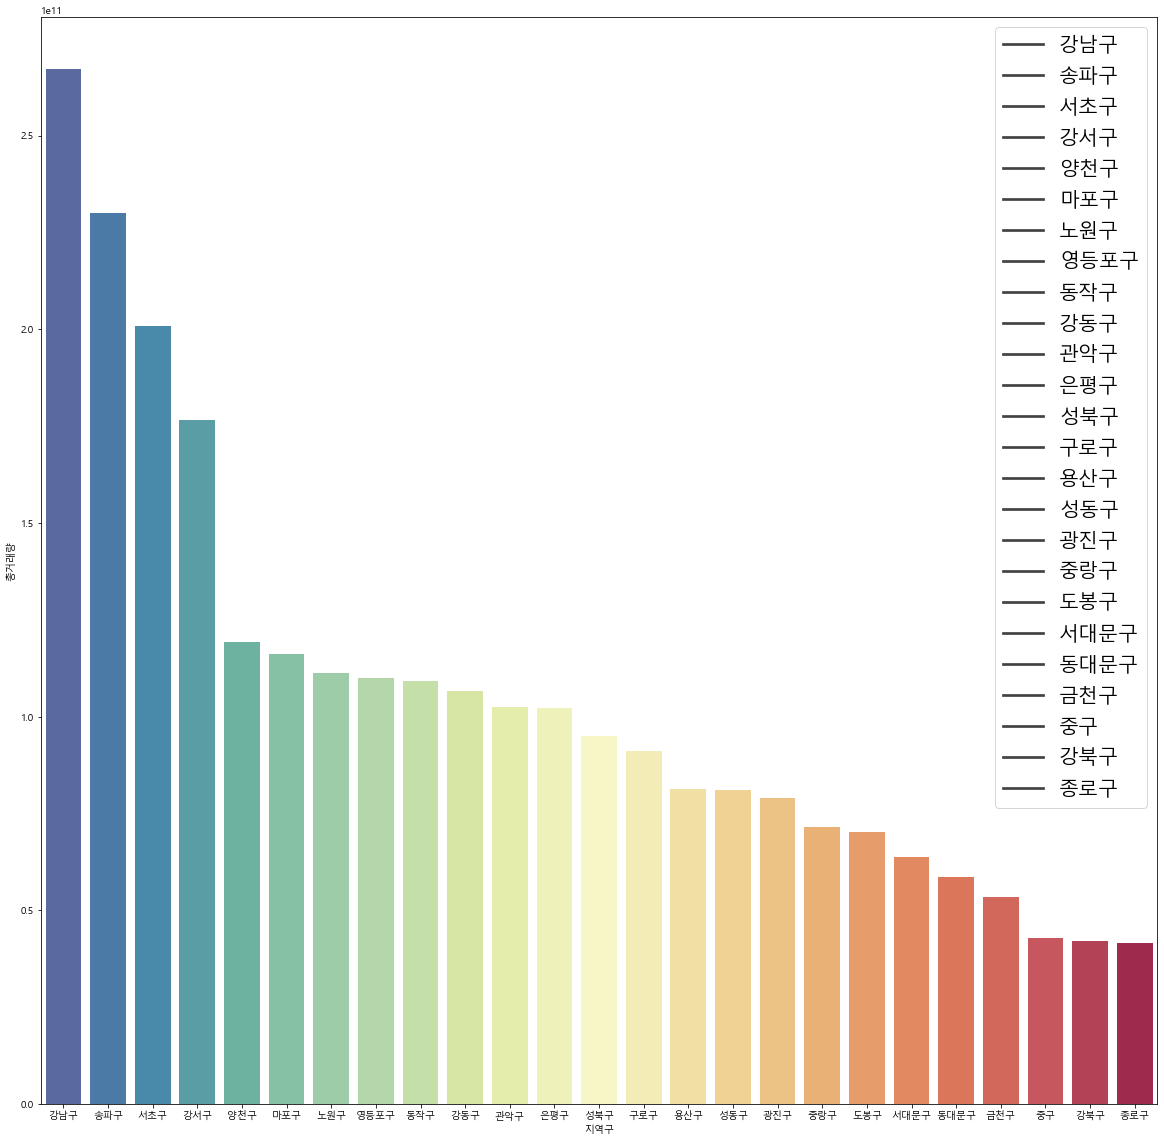

In [33]:
palette = sns.color_palette("Spectral_r", 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)


plt.figure(figsize=(20,20))
sns.barplot(x='지역구', y='총거래량', data=groupby_gu_mean.sort_values(by='총거래량',ascending=False))
plt.legend(groupby_gu_mean.sort_values(by='총거래량',ascending=False).지역구, loc='best',fontsize=20)

In [34]:
url = 'https://raw.githubusercontent.com/suanlab/dataset/master'
seoul_geo = f'{url}/seoul_municipalities_geo_simple.json'


############################################################################################################
# 2020년도 서울시 각 구별 신한은행 지점 수 데이터를 불러옵니다. 
지점 = pd.read_excel('C:/Users/wnsgn/Desktop/금융분석기타데이터/신한은행_구별점포.xlsx')

colormap1 = linear.Blues_06.scale(
    지점.지점_수.min(),
    지점.지점_수.max()
)

지점_dict = 지점.set_index('자치구')['지점_수']
지점_dict 
color_dict1 = {str(key): colormap1(지점_dict[key]) for key in 지점_dict.keys()}
############################################################################################################
# 지역구별 연간 평균 예적금 금액에 대한 정보를 생성합니다. 

colormap2 = linear.OrRd_09.scale(
    groupby_gu_mean.총거래량.min(),
    groupby_gu_mean.총거래량.max()
)

총거래_dict = groupby_gu_mean.set_index('지역구')['총거래량']
총거래_dict 
color_dict2 = {str(key): colormap2(총거래_dict[key]) for key in 총거래_dict.keys()}


# #############################################################################################################

m= folium.plugins.DualMap([37.528043, 126.980238],zoom_start=10)

folium.GeoJson(
    seoul_geo,
    name='지점 수',
    style_function = lambda feature : {
        'fillColor': color_dict1[feature['properties']['name']],
        'color': 'black',
        'weight': 1,
        'dashArray': '1 1',
        'fillOpacity':0.6,
    }
).add_to(m.m1)


folium.GeoJson(
    seoul_geo,
    name='총 거래액',
    style_function = lambda feature : {
        'fillColor': color_dict2[feature['properties']['name']],
        'color': 'black',
        'weight': 1,
        'dashArray': '1 1',
        'fillOpacity':0.6,
    }
).add_to(m.m2)


colormap1.caption= '지점 color scale'
colormap1.add_to(m.m1)


colormap2.caption= '예적금 color scale'
colormap2.add_to(m.m2)

folium.LayerControl().add_to(m)

m

* 이제 각 지역구별 거래의 비중 및 비중의 변동에 대한 정보를 분석합니다. 

In [35]:
groupby_gu

기준년월  지역구    가맹점매출입금       연금입금        총소비금액        총수신금액  \
0   2019-03-01  강남구  173412507  365400221  16626306023  66265751376   
1   2019-03-01  강동구   84242683  118722105   9915572200  31900758352   
2   2019-03-01  강북구    5653934   82524896   6551953668  18682877550   
3   2019-03-01  강서구   10559121  267245011  14346285799  46769935605   
4   2019-03-01  관악구          0  141147592  11678424939  36141077411   
..         ...  ...        ...        ...          ...          ...   
120 2021-03-01  용산구   18695544  167562448   7584354899  27368154427   
121 2021-03-01  은평구   10263394  232881278  12324084480  39809952364   
122 2021-03-01  종로구    5493582   77978619   4491112168  17084454231   
123 2021-03-01   중구   43605712   74340911   4155109598  14593820095   
124 2021-03-01  중랑구    3463566  204467522  10344237289  30829164915   

           예적금금액         신탁금액       수익증권금액      신용대출금액       담보대출금액  \
0    66780046022  29969789931  13146476407  8398123775  52879247332   
1    29806888712   2422721467    710585983  1995387250  16417044601   
2    12628997836    291664029    106076954   296691578   1520066566   
3    41318295318   3602488309   1739623066  4506563397  29945374971   
4    31773566547    746121608    297621929  1361769862   7048991333   
..           ...          ...          ...         ...          ...   
120  22655128365   5171537223   3573729278  4160674619  15771981629   
121  31002213340   1100051283    411047788  2558517675  17824555171   
122  11234418377   1712180588    656760950  2190165028   5449028651   
123  11492089990   1094708366    356598858  1833526322  10433414708   
124  24158110464    619518784     83871278   976390044   9348915009   

         주택대출금액    전세자금대출금액  
0    3720550086  1732694789  
1    1131388012  1914048349  
2     229694008           0  
3     903776072  7976047537  
4     390791675   785667972  
..          ...         ...  
120   312357166  2230641179  
121  1318945966  2375551423  
122   538145372   665040000  
123   706965444   238839897  
124   868669355  1772580585  

[125 rows x 13 columns]

In [36]:
groupby_gu.columns

Index(['기준년월', '지역구', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

In [37]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액']

result_col = ['기준년월','지역구' ,'가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총거래액']


ratio_gu = pd.DataFrame(columns=result_col)
for idx, row in groupby_gu.iterrows():
    temp = []
    temp.append(row['기준년월'])
    temp.append(row['지역구'])
    
    total = 0
    for feature in features:
            total = total + row[feature]
            
    for feature in features:
            item = (row[feature]/total)
            temp.append(item)
    temp.append(total)
    ratio_gu= ratio_gu.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)


In [38]:
ratio_gu

기준년월  지역구   가맹점매출입금      연금입금     총소비금액     총수신금액     예적금금액  \
0   2019-03-01  강남구  0.000667  0.001405  0.063933  0.254812  0.256789   
1   2019-03-01  강동구  0.000874  0.001231  0.102840  0.330861  0.309144   
2   2019-03-01  강북구  0.000140  0.002043  0.162192  0.462491  0.312628   
3   2019-03-01  강서구  0.000070  0.001765  0.094766  0.308945  0.272933   
4   2019-03-01  관악구  0.000000  0.001562  0.129236  0.399945  0.351613   
..         ...  ...       ...       ...       ...       ...       ...   
120 2021-03-01  용산구  0.000210  0.001882  0.085203  0.307456  0.254510   
121 2021-03-01  은평구  0.000094  0.002137  0.113098  0.365336  0.284507   
122 2021-03-01  종로구  0.000125  0.001768  0.101828  0.387361  0.254721   
123 2021-03-01   중구  0.000969  0.001651  0.092289  0.324141  0.255249   
124 2021-03-01  중랑구  0.000044  0.002581  0.130594  0.389211  0.304990   

         신탁금액    수익증권금액    신용대출금액    담보대출금액    주택대출금액  전세자금대출금액          총거래액  
0    0.115243  0.050552  0.032293  0.203337  0.014307  0.006663  260057798469  
1    0.025127  0.007370  0.020695  0.170271  0.011734  0.019852   96417359714  
2    0.007220  0.002626  0.007345  0.037629  0.005686  0.000000   40396201019  
3    0.023797  0.011491  0.029769  0.197808  0.005970  0.052687  151386194206  
4    0.008257  0.003294  0.015070  0.078006  0.004325  0.008694   90365180868  
..        ...       ...       ...       ...       ...       ...           ...  
120  0.058097  0.040148  0.046741  0.177184  0.003509  0.025059   89014816777  
121  0.010095  0.003772  0.023480  0.163576  0.012104  0.021800  108968064162  
122  0.038821  0.014891  0.049658  0.123547  0.012202  0.015079   44104777566  
123  0.024314  0.007920  0.040724  0.231735  0.015702  0.005305   45023019901  
124  0.007821  0.001059  0.012327  0.118028  0.010967  0.022378   79209388811  

[125 rows x 14 columns]

In [39]:
# 지역구별 위경도 저장 
ratio_gu.지역구.unique()

locations = {'강남구':[37.493559353631916, 127.06175766942077],
             '강동구':[37.550519103297084, 127.14642696937894],
             '강북구':[37.63733369082514, 127.01297309245024],
             '강서구':[37.561281149829014, 126.82237871216665],
             '관악구':[37.4684297002153, 126.9466491873885],
             '광진구':[37.54572201323684, 127.0865567648552],
             '구로구':[37.49574437919542, 126.84482151447042],
             '금천구':[37.460529526488834, 126.90040771203171],
             '노원구':[37.65310321564703, 127.0747371720947],
             '도봉구':[37.66935264904066, 127.03227527923522], 
             '동대문구':[37.582345948136926, 127.05432881977359], 
             '동작구':[37.49927039200621, 126.94986919280161], 
             '마포구':[37.55967053180818, 126.90623787105591], 
             '서대문구':[37.578545414633034, 126.93892118565267], 
             '서초구':[37.47464300184752, 127.03033357347017], 
             '성동구':[37.55087157978429, 127.04072300801425], 
             '성북구':[37.60584470867952, 127.01905427174444], 
             '송파구':[37.50553740007395, 127.1165229155062],
             '양천구':[37.52347867196458, 126.8551912737683], 
             '영등포구':[37.521509728752655, 126.91057908725477], 
             '용산구':[37.53337430738485, 126.97925010554597], 
             '은평구':[37.619121620512566, 126.92697456799121], 
             '종로구':[37.59463356647381, 126.97156353502567], 
             '중구':[37.55930250603627, 126.99450819217043], 
             '중랑구':[37.598172747406664, 127.09158579667009]
            } 

In [40]:
import vincent

In [41]:
ratio_gu.loc[ratio_gu['기준년월']=='2019-03-01T00:00:00.000000000'].iloc[:,2:13]

가맹점매출입금      연금입금     총소비금액     총수신금액     예적금금액      신탁금액    수익증권금액  \
0   0.000667  0.001405  0.063933  0.254812  0.256789  0.115243  0.050552   
1   0.000874  0.001231  0.102840  0.330861  0.309144  0.025127  0.007370   
2   0.000140  0.002043  0.162192  0.462491  0.312628  0.007220  0.002626   
3   0.000070  0.001765  0.094766  0.308945  0.272933  0.023797  0.011491   
4   0.000000  0.001562  0.129236  0.399945  0.351613  0.008257  0.003294   
5   0.000368  0.000764  0.111206  0.364161  0.294132  0.046362  0.021665   
6   0.000203  0.001646  0.107167  0.344457  0.310729  0.014291  0.007495   
7   0.000319  0.001385  0.112368  0.308086  0.302447  0.005571  0.001774   
8   0.000228  0.001980  0.108271  0.364485  0.338786  0.027007  0.008002   
9   0.000074  0.002754  0.118329  0.382584  0.372920  0.024291  0.007555   
10  0.000209  0.001185  0.131014  0.426568  0.310907  0.009786  0.003740   
11  0.000156  0.001516  0.103698  0.361880  0.367758  0.027898  0.015286   
12  0.000306  0.001108  0.091542  0.334373  0.289331  0.031366  0.014142   
13  0.000180  0.001180  0.119576  0.410560  0.307283  0.013359  0.003314   
14  0.000588  0.001297  0.069388  0.287751  0.270421  0.091465  0.046440   
15  0.000090  0.000872  0.108444  0.378936  0.335731  0.028999  0.010925   
16  0.000017  0.001951  0.106437  0.379079  0.323585  0.027823  0.011254   
17  0.000459  0.001380  0.081100  0.310214  0.303638  0.067847  0.025342   
18  0.000695  0.000728  0.093302  0.337168  0.288298  0.067778  0.021329   
19  0.000144  0.000968  0.088747  0.323180  0.264146  0.036915  0.011353   
20  0.000540  0.001546  0.089401  0.311951  0.309621  0.073178  0.043395   
21  0.000207  0.001829  0.119003  0.368621  0.325749  0.011407  0.004324   
22  0.000182  0.001443  0.101677  0.369784  0.299270  0.052937  0.023071   
23  0.000351  0.001128  0.091518  0.309214  0.300502  0.035162  0.014722   
24  0.000201  0.001107  0.139095  0.397932  0.362847  0.010168  0.003651   

      신용대출금액    담보대출금액    주택대출금액  전세자금대출금액  
0   0.032293  0.203337  0.014307  0.006663  
1   0.020695  0.170271  0.011734  0.019852  
2   0.007345  0.037629  0.005686  0.000000  
3   0.029769  0.197808  0.005970  0.052687  
4   0.015070  0.078006  0.004325  0.008694  
5   0.017489  0.129075  0.009040  0.005739  
6   0.014573  0.164149  0.011294  0.023997  
7   0.001257  0.199349  0.043785  0.023659  
8   0.035160  0.098449  0.007383  0.010248  
9   0.005949  0.079298  0.006245  0.000000  
10  0.004443  0.107778  0.001317  0.003053  
11  0.012174  0.099636  0.006796  0.003202  
12  0.020420  0.173704  0.035803  0.007904  
13  0.012811  0.126107  0.005631  0.000000  
14  0.038617  0.178821  0.006095  0.009116  
15  0.015768  0.110853  0.007880  0.001502  
16  0.021173  0.124892  0.003788  0.000000  
17  0.022700  0.154205  0.018875  0.014240  
18  0.026781  0.147583  0.004665  0.011675  
19  0.031759  0.192079  0.001906  0.048804  
20  0.017992  0.127456  0.011036  0.013883  
21  0.010195  0.135833  0.018207  0.004625  
22  0.026578  0.100976  0.022020  0.002062  
23  0.010031  0.215897  0.007605  0.013868  
24  0.004325  0.070164  0.008584  0.001927

In [42]:
ratio_gu_1903 = ratio_gu.loc[ratio_gu['기준년월']=='2019-03-01T00:00:00.000000000']
ratio_gu_1909 = ratio_gu.loc[ratio_gu['기준년월']=='2019-09-01T00:00:00.000000000']
ratio_gu_2003 = ratio_gu.loc[ratio_gu['기준년월']=='2020-03-01T00:00:00.000000000']
ratio_gu_2009 = ratio_gu.loc[ratio_gu['기준년월']=='2020-09-01T00:00:00.000000000']
ratio_gu_2103 = ratio_gu.loc[ratio_gu['기준년월']=='2021-03-01T00:00:00.000000000']


print(ratio_gu_1903.shape)
print(ratio_gu_1909.shape)
print(ratio_gu_2003.shape)
print(ratio_gu_2009.shape)
print(ratio_gu_2103.shape)

(25, 14)
(25, 14)
(25, 14)
(25, 14)
(25, 14)


In [43]:
ratio_gu

기준년월  지역구   가맹점매출입금      연금입금     총소비금액     총수신금액     예적금금액  \
0   2019-03-01  강남구  0.000667  0.001405  0.063933  0.254812  0.256789   
1   2019-03-01  강동구  0.000874  0.001231  0.102840  0.330861  0.309144   
2   2019-03-01  강북구  0.000140  0.002043  0.162192  0.462491  0.312628   
3   2019-03-01  강서구  0.000070  0.001765  0.094766  0.308945  0.272933   
4   2019-03-01  관악구  0.000000  0.001562  0.129236  0.399945  0.351613   
..         ...  ...       ...       ...       ...       ...       ...   
120 2021-03-01  용산구  0.000210  0.001882  0.085203  0.307456  0.254510   
121 2021-03-01  은평구  0.000094  0.002137  0.113098  0.365336  0.284507   
122 2021-03-01  종로구  0.000125  0.001768  0.101828  0.387361  0.254721   
123 2021-03-01   중구  0.000969  0.001651  0.092289  0.324141  0.255249   
124 2021-03-01  중랑구  0.000044  0.002581  0.130594  0.389211  0.304990   

         신탁금액    수익증권금액    신용대출금액    담보대출금액    주택대출금액  전세자금대출금액          총거래액  
0    0.115243  0.050552  0.032293  0.203337  0.014307  0.006663  260057798469  
1    0.025127  0.007370  0.020695  0.170271  0.011734  0.019852   96417359714  
2    0.007220  0.002626  0.007345  0.037629  0.005686  0.000000   40396201019  
3    0.023797  0.011491  0.029769  0.197808  0.005970  0.052687  151386194206  
4    0.008257  0.003294  0.015070  0.078006  0.004325  0.008694   90365180868  
..        ...       ...       ...       ...       ...       ...           ...  
120  0.058097  0.040148  0.046741  0.177184  0.003509  0.025059   89014816777  
121  0.010095  0.003772  0.023480  0.163576  0.012104  0.021800  108968064162  
122  0.038821  0.014891  0.049658  0.123547  0.012202  0.015079   44104777566  
123  0.024314  0.007920  0.040724  0.231735  0.015702  0.005305   45023019901  
124  0.007821  0.001059  0.012327  0.118028  0.010967  0.022378   79209388811  

[125 rows x 14 columns]

**전체 기간 평균**

In [52]:
ratio_gu_mean = ratio_gu.groupby(['지역구'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'].mean().reset_index()

features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']

pies = [] 
for idx, row in ratio_gu_mean.iterrows():
    # 피처마다의 딕셔너리를 생성하여 파이를 생성해 매번 팝업에 추가후 지도에 포함 시키고 
    temp_dict = {}
    for feature in features:
        temp_dict[feature] = row[feature]
    
    pie = vincent.Pie(temp_dict,
                 width= 400,
                 height= 200,)
    pie.colors(brew='Paired')
    pie.legend(row['지역구'])
    pies.append(pie)
    
loc_data = list(locations.values())


m = folium.Map([37.5661, 126.9785], zoom_start=10)

for loc, pie in zip(loc_data, pies):    
    popup = folium.Popup()
    folium.Vega(pie, height=250, width=450).add_to(popup)
    folium.Marker(loc, popup=popup,tooltip='지역별 거래비중을 확인하세요!').add_to(m)

m


<ipython-input-52-6304c3f54caa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratio_gu_mean = ratio_gu.groupby(['지역구'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',


**총 수신금액**

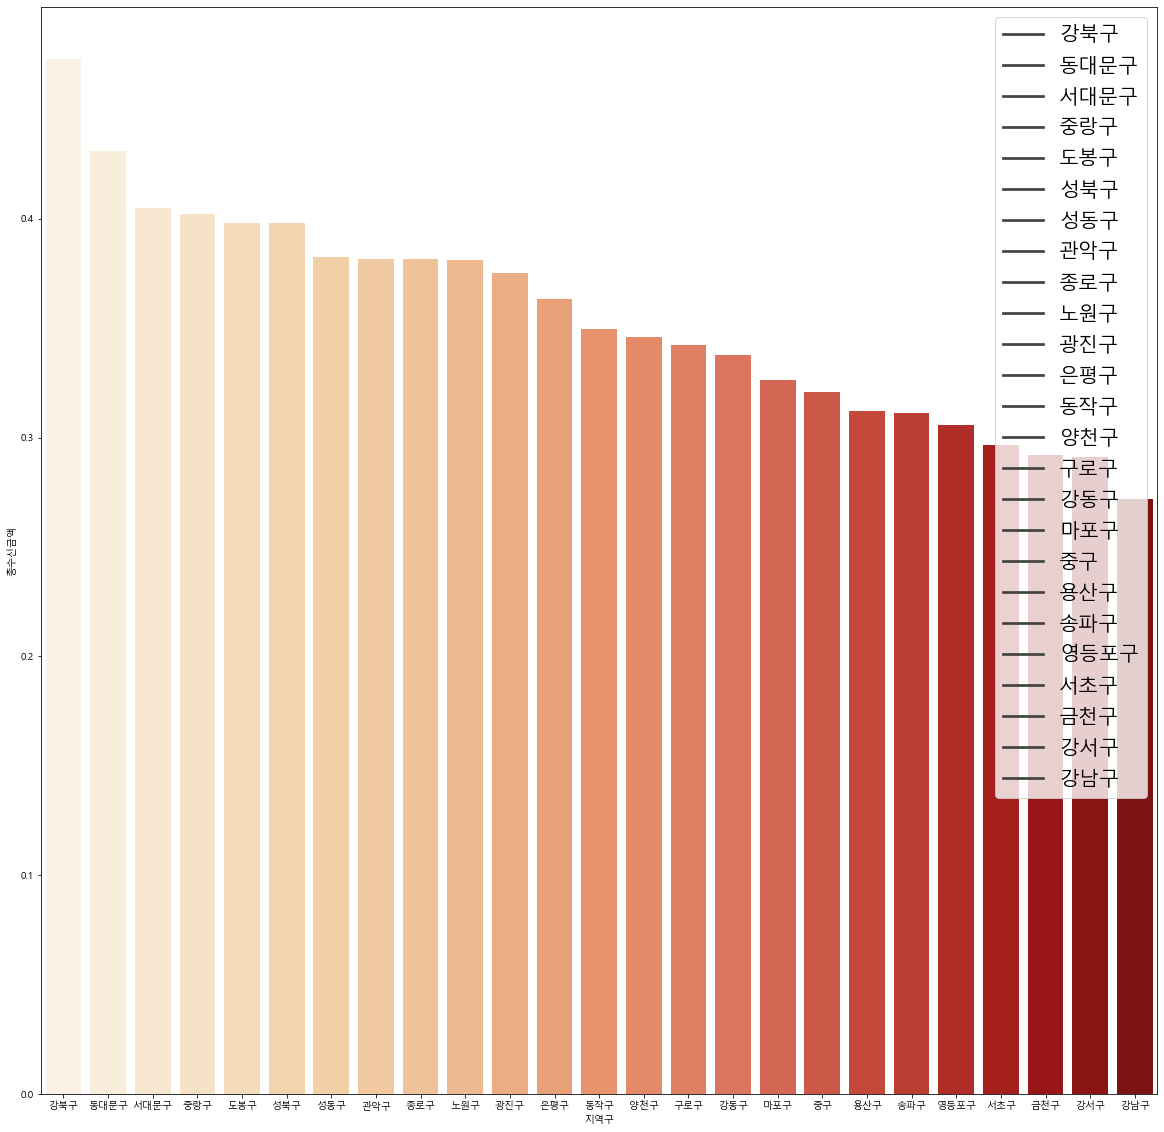

In [65]:
palette = sns.color_palette('OrRd', 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)


plt.figure(figsize=(20,20))
sns.barplot(x='지역구', y='총수신금액', data=ratio_gu_mean.sort_values(by='총수신금액',ascending=False))
plt.legend(ratio_gu_mean.sort_values(by='총수신금액',ascending=False).지역구, loc='best',fontsize=20)

**예적금금액**

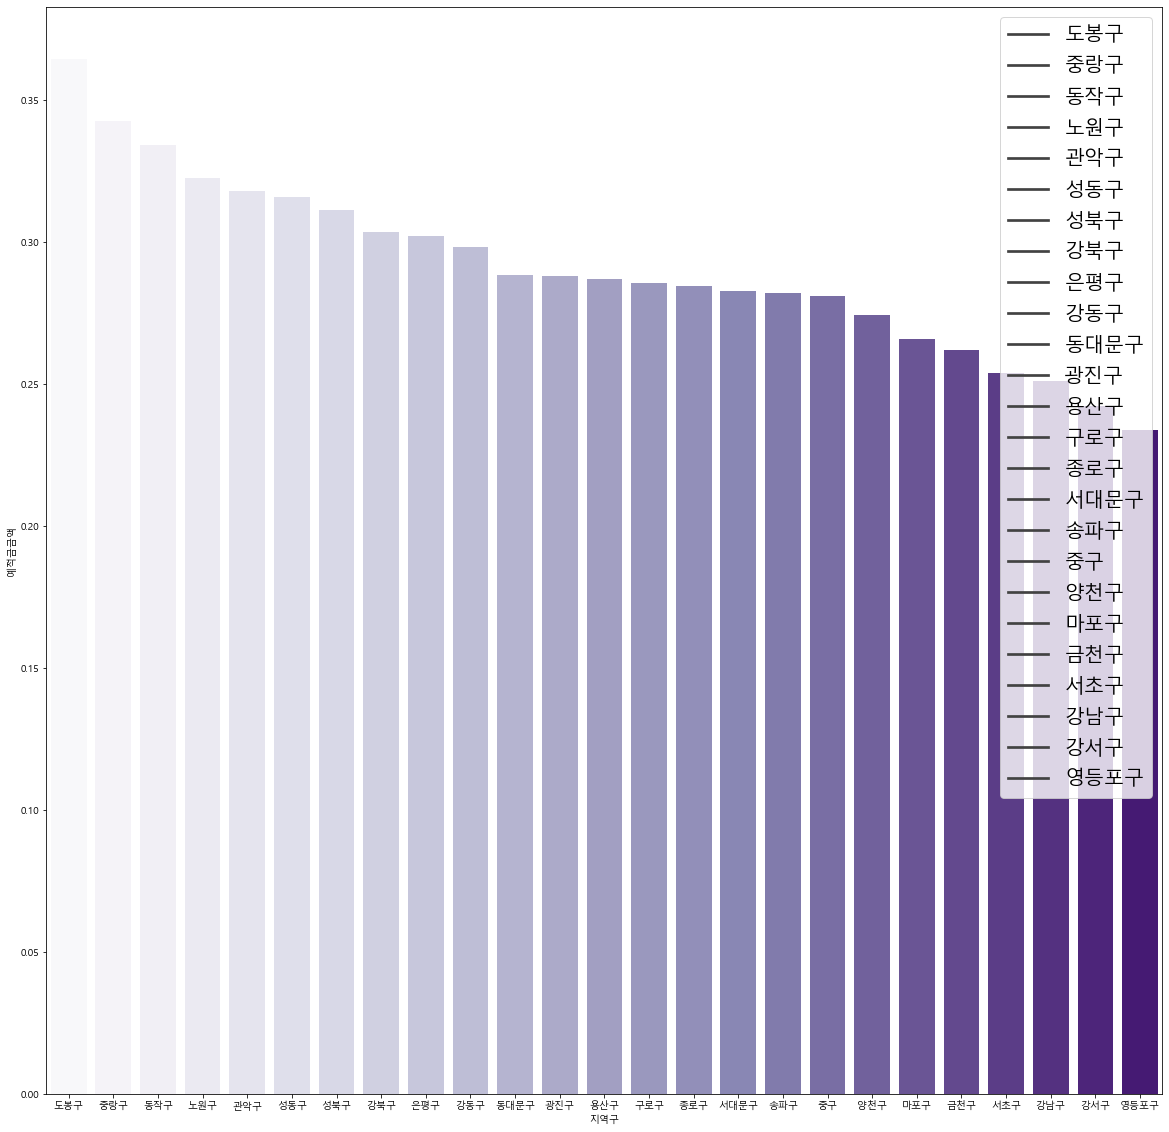

In [64]:
palette = sns.color_palette('Purples', 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)


plt.figure(figsize=(20,20))
sns.barplot(x='지역구', y='예적금금액', data=ratio_gu_mean.sort_values(by='예적금금액',ascending=False))
plt.legend(ratio_gu_mean.sort_values(by='예적금금액',ascending=False).지역구, loc='best',fontsize=20)

**담보대출금액**

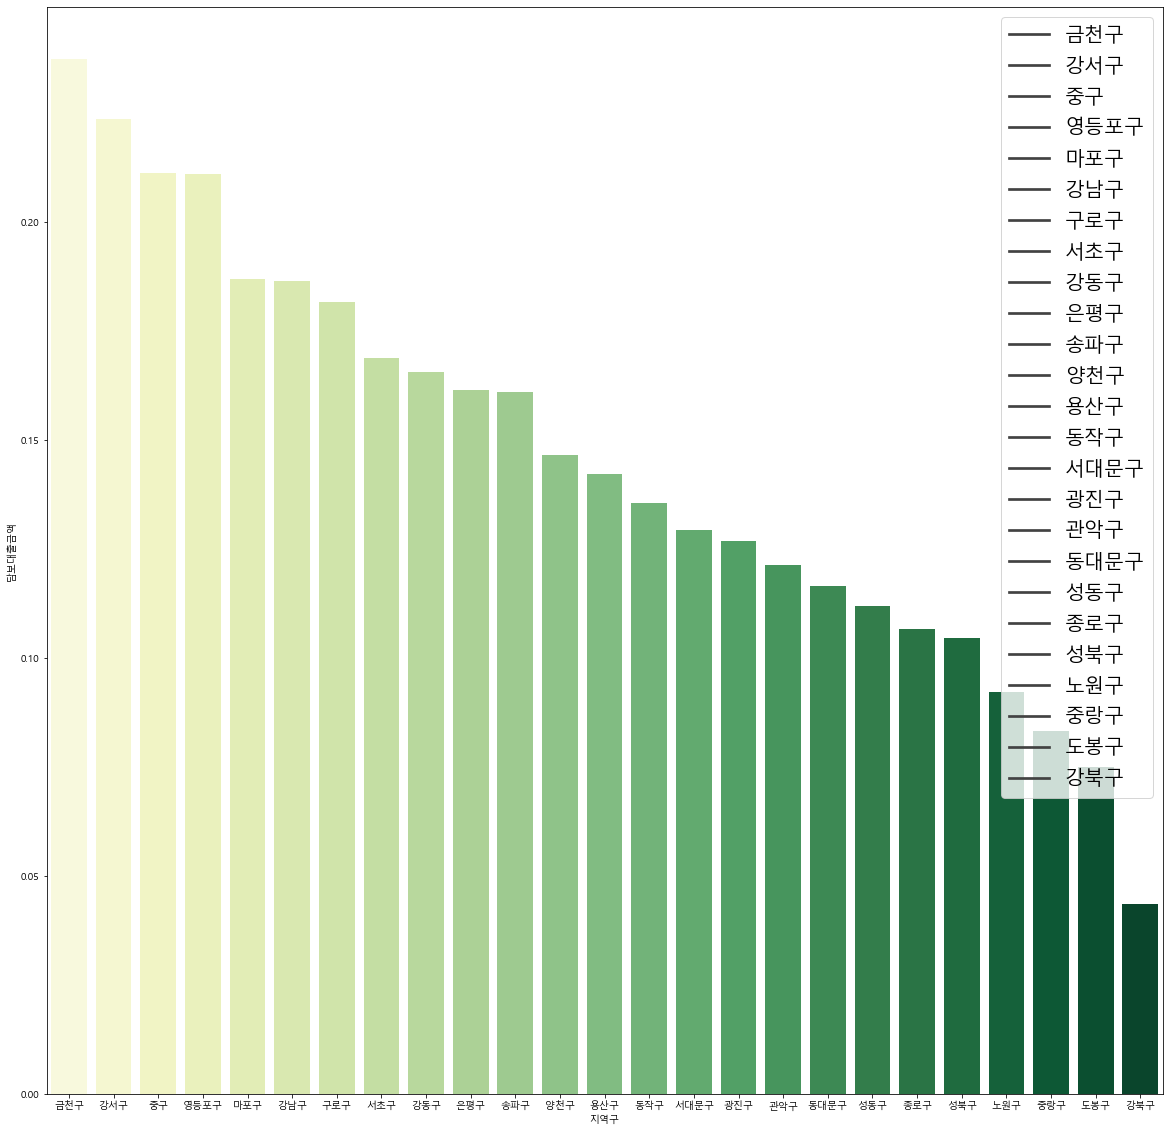

In [66]:
palette = sns.color_palette('YlGn', 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)


plt.figure(figsize=(20,20))
sns.barplot(x='지역구', y='담보대출금액', data=ratio_gu_mean.sort_values(by='담보대출금액',ascending=False))
plt.legend(ratio_gu_mean.sort_values(by='담보대출금액',ascending=False).지역구, loc='best',fontsize=20)

**총소비**

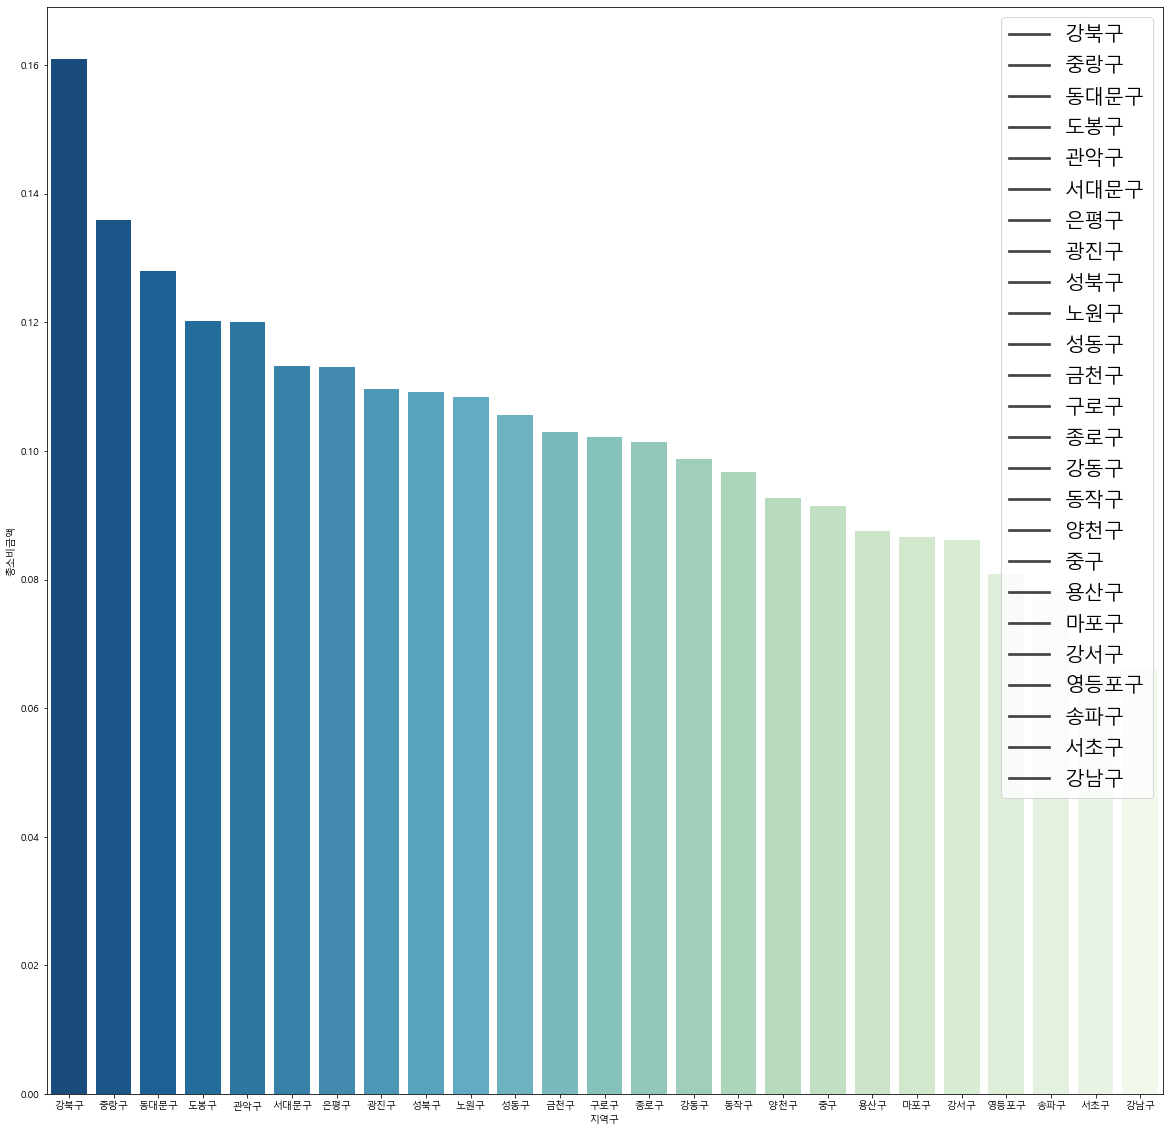

In [67]:
palette = sns.color_palette('GnBu_r', 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)


plt.figure(figsize=(20,20))
sns.barplot(x='지역구', y='총소비금액', data=ratio_gu_mean.sort_values(by='총소비금액',ascending=False))
plt.legend(ratio_gu_mean.sort_values(by='총소비금액',ascending=False).지역구, loc='best',fontsize=20)

**신탁금액**

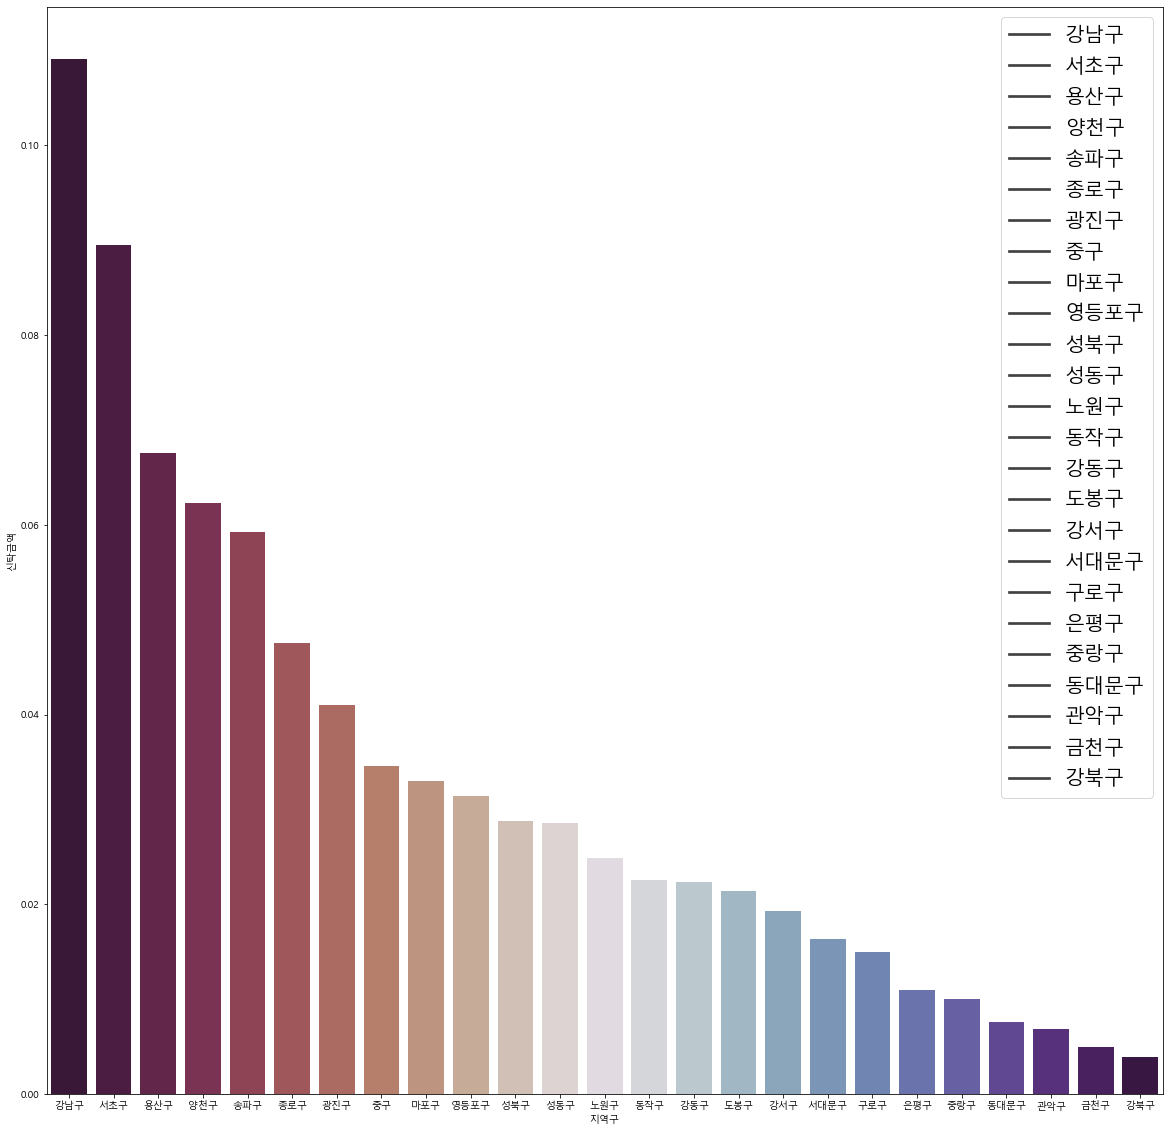

In [70]:
palette = sns.color_palette('twilight_shifted_r', 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)


plt.figure(figsize=(20,20))
sns.barplot(x='지역구', y='신탁금액', data=ratio_gu_mean.sort_values(by='신탁금액',ascending=False))
plt.legend(ratio_gu_mean.sort_values(by='신탁금액',ascending=False).지역구, loc='best',fontsize=20)

**2019년 3월**

In [44]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']

pies = [] 
for idx, row in ratio_gu_1903.iterrows():
    # 피처마다의 딕셔너리를 생성하여 파이를 생성해 매번 팝업에 추가후 지도에 포함 시키고 
    temp_dict = {}
    for feature in features:
        temp_dict[feature] = row[feature]
    
    pie = vincent.Pie(temp_dict,
                 width= 400,
                 height= 200,)
    pie.colors(brew='Paired')
    pie.legend(row['지역구'])
    pies.append(pie)
    
loc_data = list(locations.values())


m = folium.Map([37.5661, 126.9785], zoom_start=10)

for loc, pie in zip(loc_data, pies):    
    popup = folium.Popup()
    folium.Vega(pie, height=250, width=450).add_to(popup)
    folium.Marker(loc, popup=popup,tooltip='2019년 3월!! 지역별 거래비중을 확인하세요!').add_to(m)

m

**2019년9월**

In [45]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']


pies = [] 
for idx, row in ratio_gu_1909.iterrows():
    # 피처마다의 딕셔너리를 생성하여 파이를 생성해 매번 팝업에 추가후 지도에 포함 시키고 
    temp_dict = {}
    for feature in features:
        temp_dict[feature] = row[feature]
    
    pie = vincent.Pie(temp_dict,
                 width= 400,
                 height= 200,)
    pie.colors(brew='Paired')
    pie.legend(row['지역구'])
    pies.append(pie)
    
loc_data = list(locations.values())


m = folium.Map([37.5661, 126.9785], zoom_start=10)

for loc, pie in zip(loc_data, pies):    
    popup = folium.Popup()
    folium.Vega(pie, height=250, width=450).add_to(popup)
    folium.Marker(loc, popup=popup,tooltip='2019년 9월!! 지역별 거래비중을 확인하세요!').add_to(m)

m

**2020년3월**

In [46]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']

pies = [] 
for idx, row in ratio_gu_2003.iterrows():
    # 피처마다의 딕셔너리를 생성하여 파이를 생성해 매번 팝업에 추가후 지도에 포함 시키고 
    temp_dict = {}
    for feature in features:
        temp_dict[feature] = row[feature]
    
    pie = vincent.Pie(temp_dict,
                 width= 400,
                 height= 200,)
    pie.colors(brew='Paired')
    pie.legend(row['지역구'])
    pies.append(pie)
    
loc_data = list(locations.values())


m = folium.Map([37.5661, 126.9785], zoom_start=10)

for loc, pie in zip(loc_data, pies):    
    popup = folium.Popup()
    folium.Vega(pie, height=250, width=450).add_to(popup)
    folium.Marker(loc, popup=popup,tooltip='2020년 3월!1지역별 거래비중을 확인하세요!').add_to(m)

m

**2020년 09월**

In [47]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']

pies = [] 
for idx, row in ratio_gu_2009.iterrows():
    # 피처마다의 딕셔너리를 생성하여 파이를 생성해 매번 팝업에 추가후 지도에 포함 시키고 
    temp_dict = {}
    for feature in features:
        temp_dict[feature] = row[feature]
    
    pie = vincent.Pie(temp_dict,
                 width= 400,
                 height= 200,)
    pie.colors(brew='Paired')
    pie.legend(row['지역구'])
    pies.append(pie)
    
loc_data = list(locations.values())


m = folium.Map([37.5661, 126.9785], zoom_start=10)

for loc, pie in zip(loc_data, pies):    
    popup = folium.Popup()
    folium.Vega(pie, height=250, width=450).add_to(popup)
    folium.Marker(loc, popup=popup,tooltip='2020년 9월!! 지역별 거래비중을 확인하세요!').add_to(m)

m

**2021년 03월**

In [48]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액',
       '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']

pies = [] 
for idx, row in ratio_gu_2009.iterrows():
    # 피처마다의 딕셔너리를 생성하여 파이를 생성해 매번 팝업에 추가후 지도에 포함 시키고 
    temp_dict = {}
    for feature in features:
        temp_dict[feature] = row[feature]
    
    pie = vincent.Pie(temp_dict,
                 width= 400,
                 height= 200,)
    pie.colors(brew='Paired')
    pie.legend(row['지역구'])
    pies.append(pie)
    
loc_data = list(locations.values())


m = folium.Map([37.5661, 126.9785], zoom_start=10)

for loc, pie in zip(loc_data, pies):    
    popup = folium.Popup()
    folium.Vega(pie, height=250, width=450).add_to(popup)
    folium.Marker(loc, popup=popup,tooltip='2021년 3월!! 지역별 거래비중을 확인하세요!').add_to(m)

m

##### 지역구별 거래 비중의 변화에 대해 보다 자세히 살펴봅시다! 
* 앞선 분석에서 거래 비중이 꾸준히 증가하고 있는 주택, 전세, 신용대출의 변화를 견인하는 지역에 대해 알아봅니다. 
* 또한, 지속적인 감소세를 보이는 예적금금액과 가맹점 매출입금, 신탁금액의 변동을 견인하는 지역을 알아봅니다. 

**증가요인 탐색**

In [156]:
# 비율변동의 변화 추이를 확인하기 위해 증감을 계산합니다. 
# 각각 %p변동을 확인합니다. 

features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액']
locations = ['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', 
             '성동구', '성북구', '송파구','양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

result_col = ['기준년월', '지역구','가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
              '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총거래액']


ratio_yr_change = pd.DataFrame(columns=result_col)
for i in range(1,5):    
    t = ratio_gu.기준년월.unique()[i]
    t_1 = ratio_gu.기준년월.unique()[i-1]
    for location in locations:
        temp = []
        temp.append(t)
        temp.append(location)
        for feature in features:
            v_t = ratio_gu.loc[(ratio_gu['기준년월'] == t) & (ratio_gu['지역구'] == location)][feature]
            v_t_1 = ratio_gu.loc[(ratio_gu['기준년월'] == t_1) & (ratio_gu['지역구'] == location)][feature]
            item = (float(v_t)-float(v_t_1))*100
            temp.append(item)
        total_t = ratio_gu.loc[(ratio_gu['기준년월'] == t) & (ratio_gu['지역구'] == location)]['총거래액']
        total_t_1 = ratio_gu.loc[(ratio_gu['기준년월'] == t_1) & (ratio_gu['지역구'] == location)]['총거래액']
        total_ch = float(total_t) - float(total_t_1)
        temp.append(total_ch)    
        
        ratio_yr_change = ratio_yr_change.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)

**1. 신용대출금액 비율 변동폭**

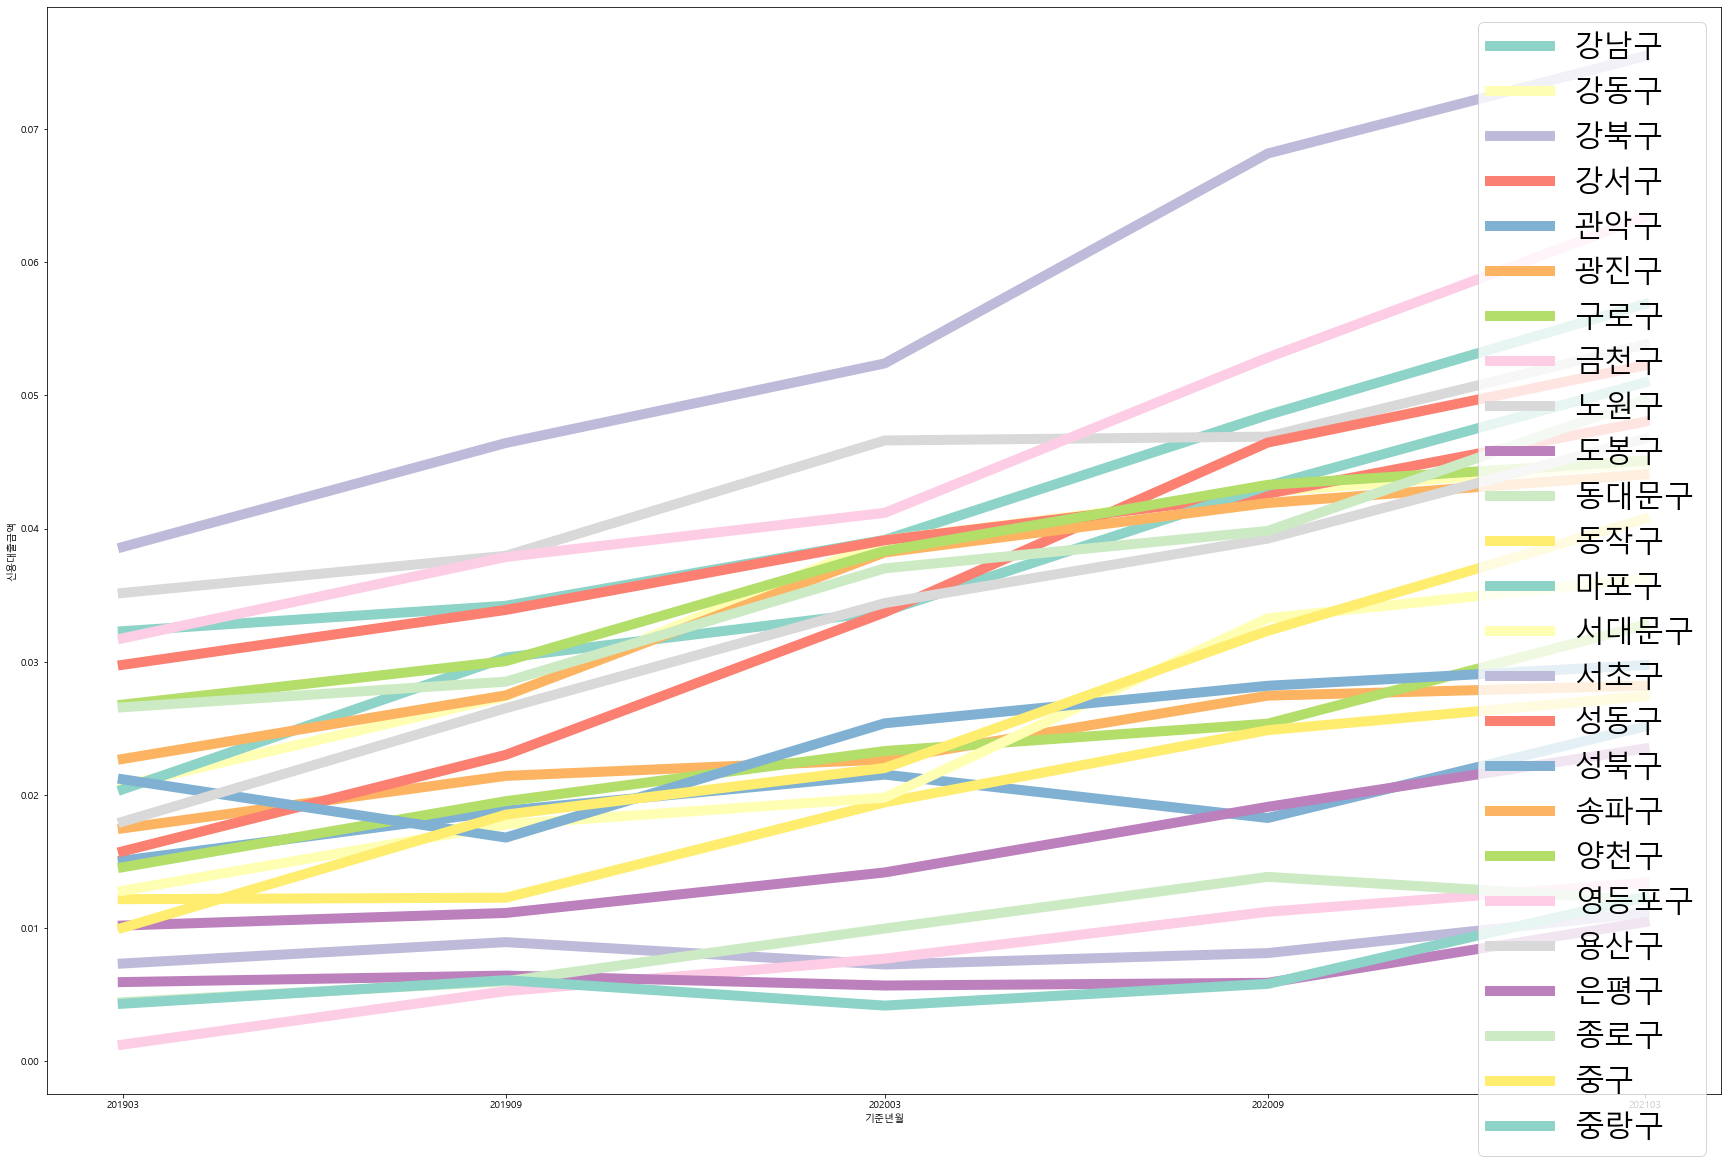

In [87]:
palette = sns.color_palette("Set3", 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.lineplot(x='기준년월',y='신용대출금액',hue='지역구',data=ratio_gu, linewidth=10, markersize=11, markerfacecolor='black')
plt.xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],['201903','201909','202003','202009','202103'])
plt.legend(ratio_gu['지역구'].unique(),loc='best',fontsize=30)

plt.show()

In [93]:
print('2019년 3월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_1903.sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2019년 9월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_1909.sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 3월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2003.sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 9월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2009.sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2021년 3월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2103.sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

2019년 3월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
14    서초구
8     노원구
0     강남구
Name: 지역구, dtype: object



2019년 9월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
39     서초구
33     노원구
44    영등포구
Name: 지역구, dtype: object



2020년 3월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
64     서초구
58     노원구
69    영등포구
Name: 지역구, dtype: object



2020년 9월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
89     서초구
94    영등포구
75     강남구
Name: 지역구, dtype: object



2021년 3월 기준, 신용대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
114     서초구
119    영등포구
100     강남구
Name: 지역구, dtype: object





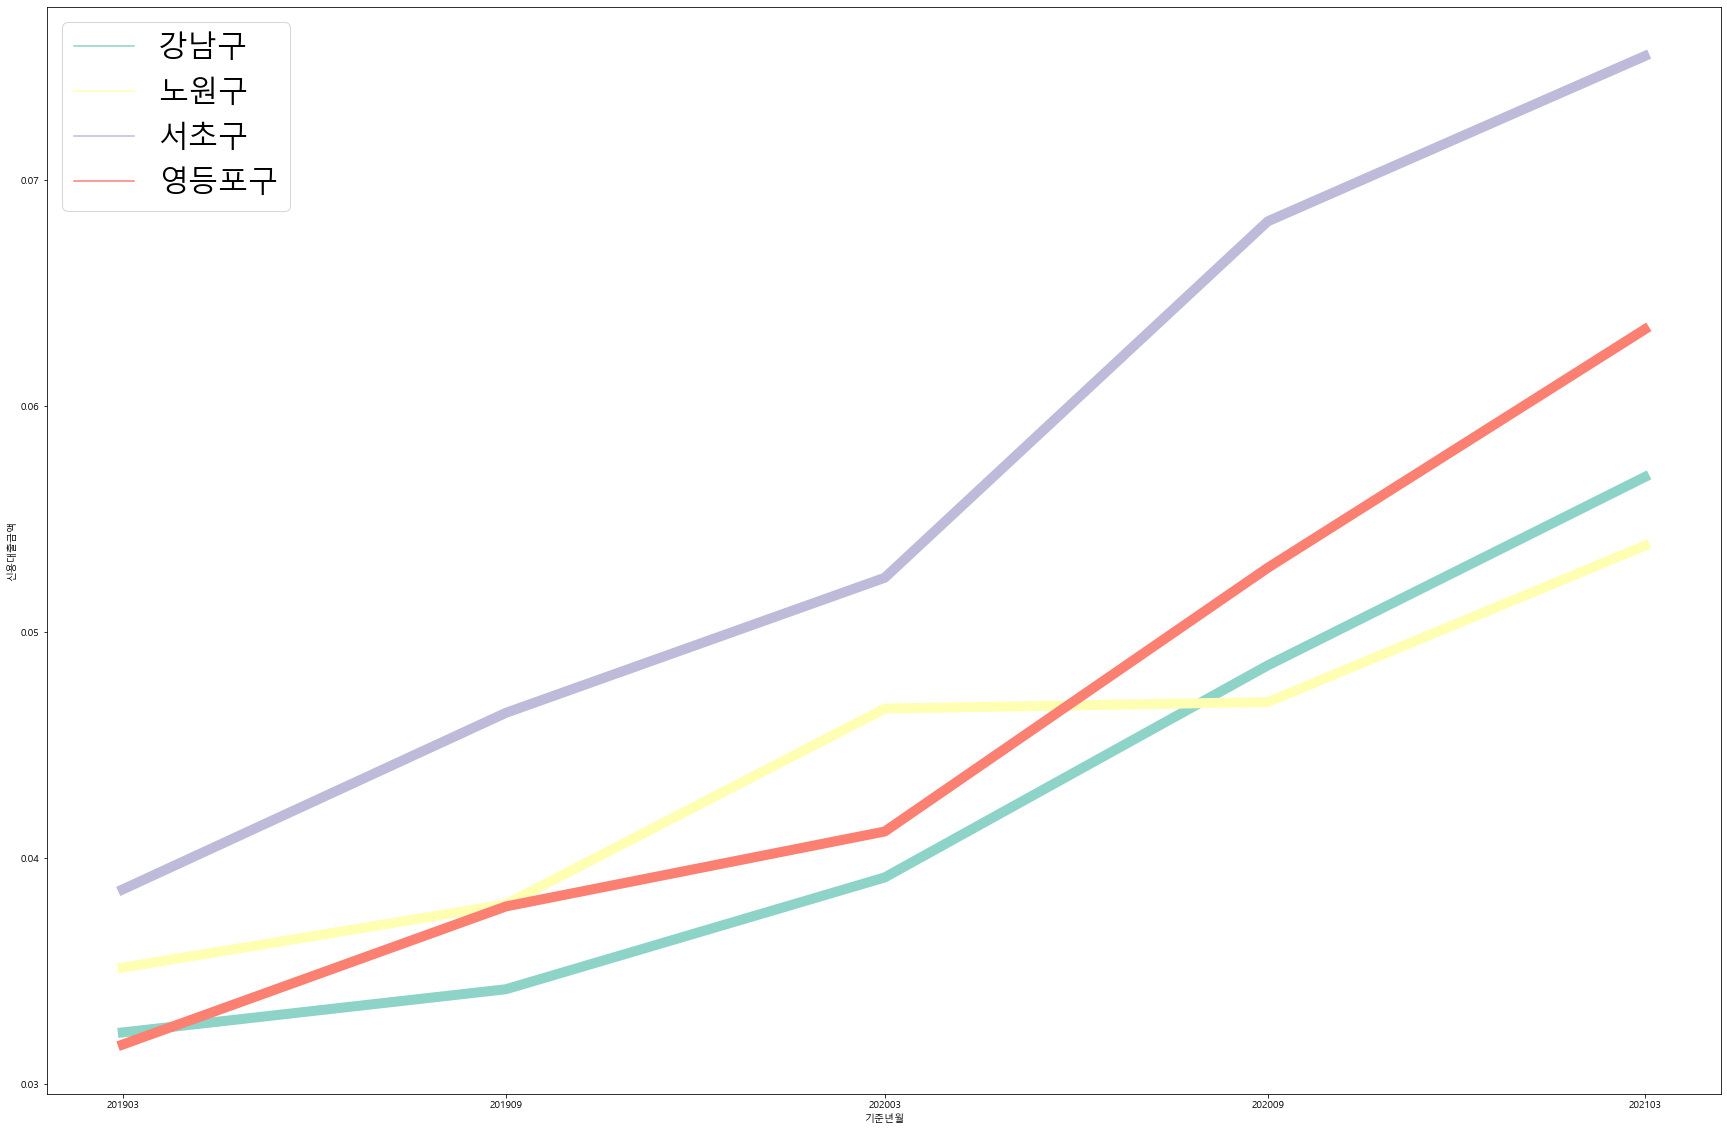

In [103]:
palette = sns.color_palette("Set3", 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.lineplot(x='기준년월',y='신용대출금액',hue='지역구',
             data=ratio_gu.loc[(ratio_gu['지역구']== '서초구')|(ratio_gu['지역구']== '영등포구')|(ratio_gu['지역구']== '강남구')|(ratio_gu['지역구']== '노원구')],
             linewidth=10, markersize=11, markerfacecolor='black')
plt.xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],['201903','201909','202003','202009','202103'])
plt.legend(loc='best',fontsize=30)

plt.show()

* 노원구는 지속적으로 신용대출금액의 비중이 증가하였으며 타 지역구중 가장 높은 신용대출 거래비중을 보였습니다
* 영등포구는 2020년 3월을 기점으로 신용대출의 비중이 급증하여 20년9월에는 노원구를 앞질렀습니다. 

<AxesSubplot:xlabel='기준년월', ylabel='신용대출금액'>

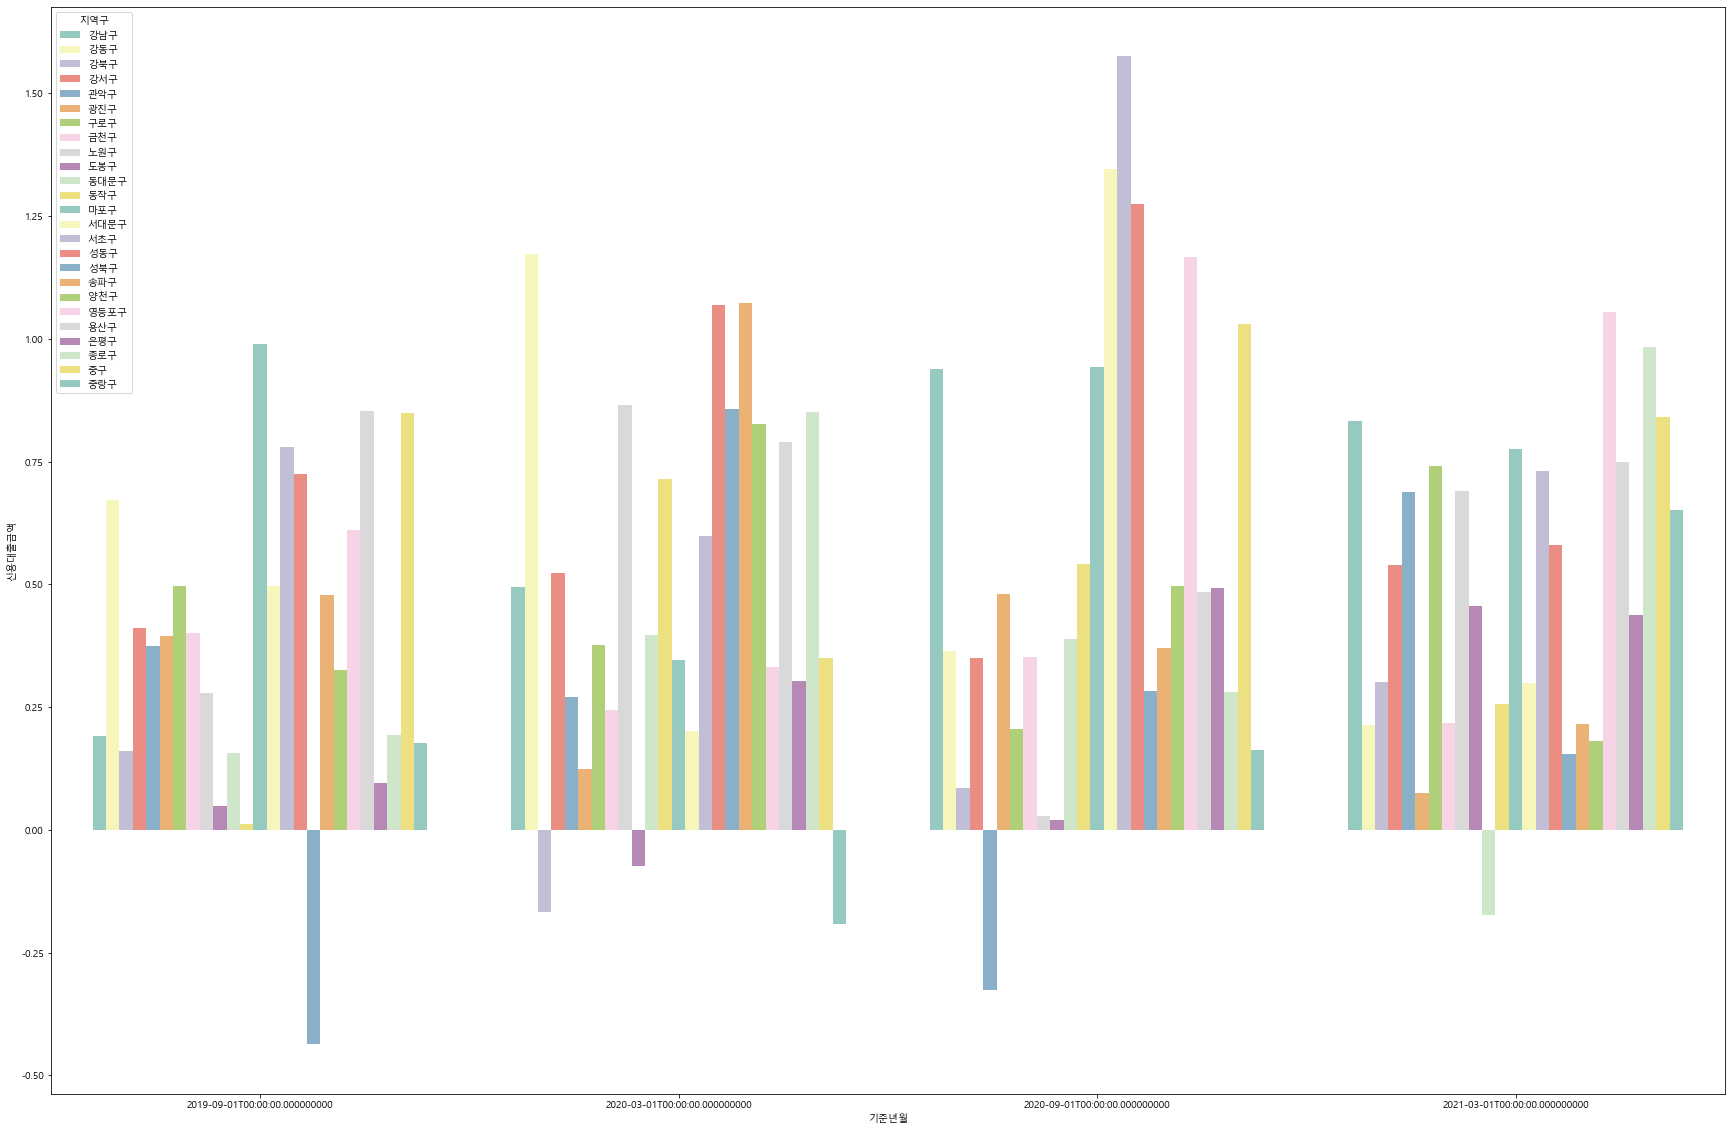

In [168]:
palette = sns.color_palette("Set3", 25)
sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.barplot(x='기준년월',y='신용대출금액',hue='지역구', data=ratio_yr_change)
# plt.legend(ratio_yr_change['지역구'].unique(),loc='best',fontsize=30)

In [170]:
print('2019년 9월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2019-09-01T00:00:00.000000000'].sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 3월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2020-03-01T00:00:00.000000000'].sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 9월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2020-09-01T00:00:00.000000000'].sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2021년 3월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2021-03-01T00:00:00.000000000'].sort_values(by='신용대출금액', ascending=False).head(3)['지역구'])
print('\n\n')


2019년 9월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구
12    마포구
20    용산구
23     중구
Name: 지역구, dtype: object



2020년 3월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구
26    강동구
42    송파구
40    성동구
Name: 지역구, dtype: object



2020년 9월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구
64     서초구
63    서대문구
65     성동구
Name: 지역구, dtype: object



2021년 3월 기준, 신용대출금액의 비중의 증가가 가장 큰 3개 지역구
94    영등포구
97     종로구
98      중구
Name: 지역구, dtype: object





**2. 전세자금대출금액의 비중** 

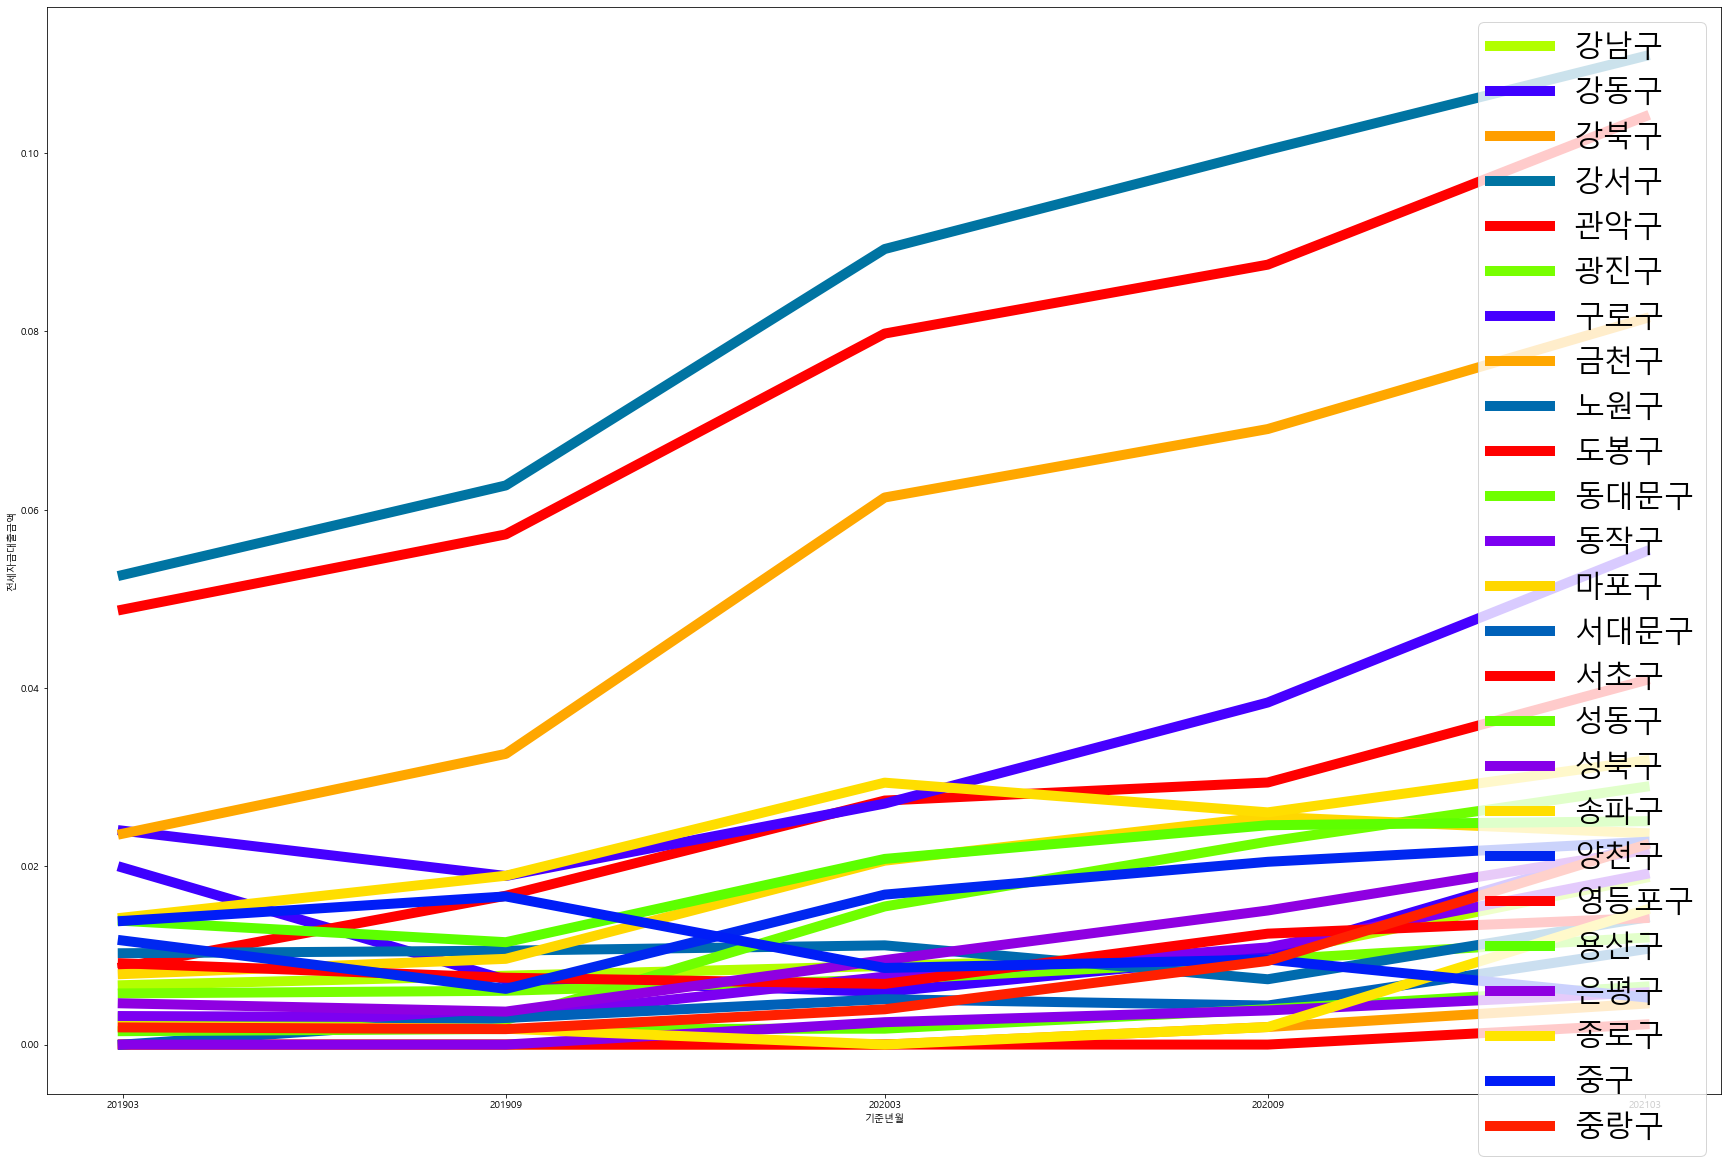

In [110]:
palette = sns.color_palette('prism', 25)


sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.lineplot(x='기준년월',y='전세자금대출금액',hue='지역구',data=ratio_gu, linewidth=10, markersize=11, markerfacecolor='black')
plt.xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],['201903','201909','202003','202009','202103'])
plt.legend(ratio_gu['지역구'].unique(),loc='best',fontsize=30)

plt.show()

In [111]:
print('2019년 3월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_1903.sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2019년 9월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_1909.sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 3월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2003.sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 9월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2009.sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2021년 3월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2103.sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

2019년 3월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
3      강서구
19    영등포구
6      구로구
Name: 지역구, dtype: object



2019년 9월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
28     강서구
44    영등포구
32     금천구
Name: 지역구, dtype: object



2020년 3월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
53     강서구
69    영등포구
57     금천구
Name: 지역구, dtype: object



2020년 9월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
78     강서구
94    영등포구
82     금천구
Name: 지역구, dtype: object



2021년 3월 기준, 전세자금대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
103     강서구
119    영등포구
107     금천구
Name: 지역구, dtype: object





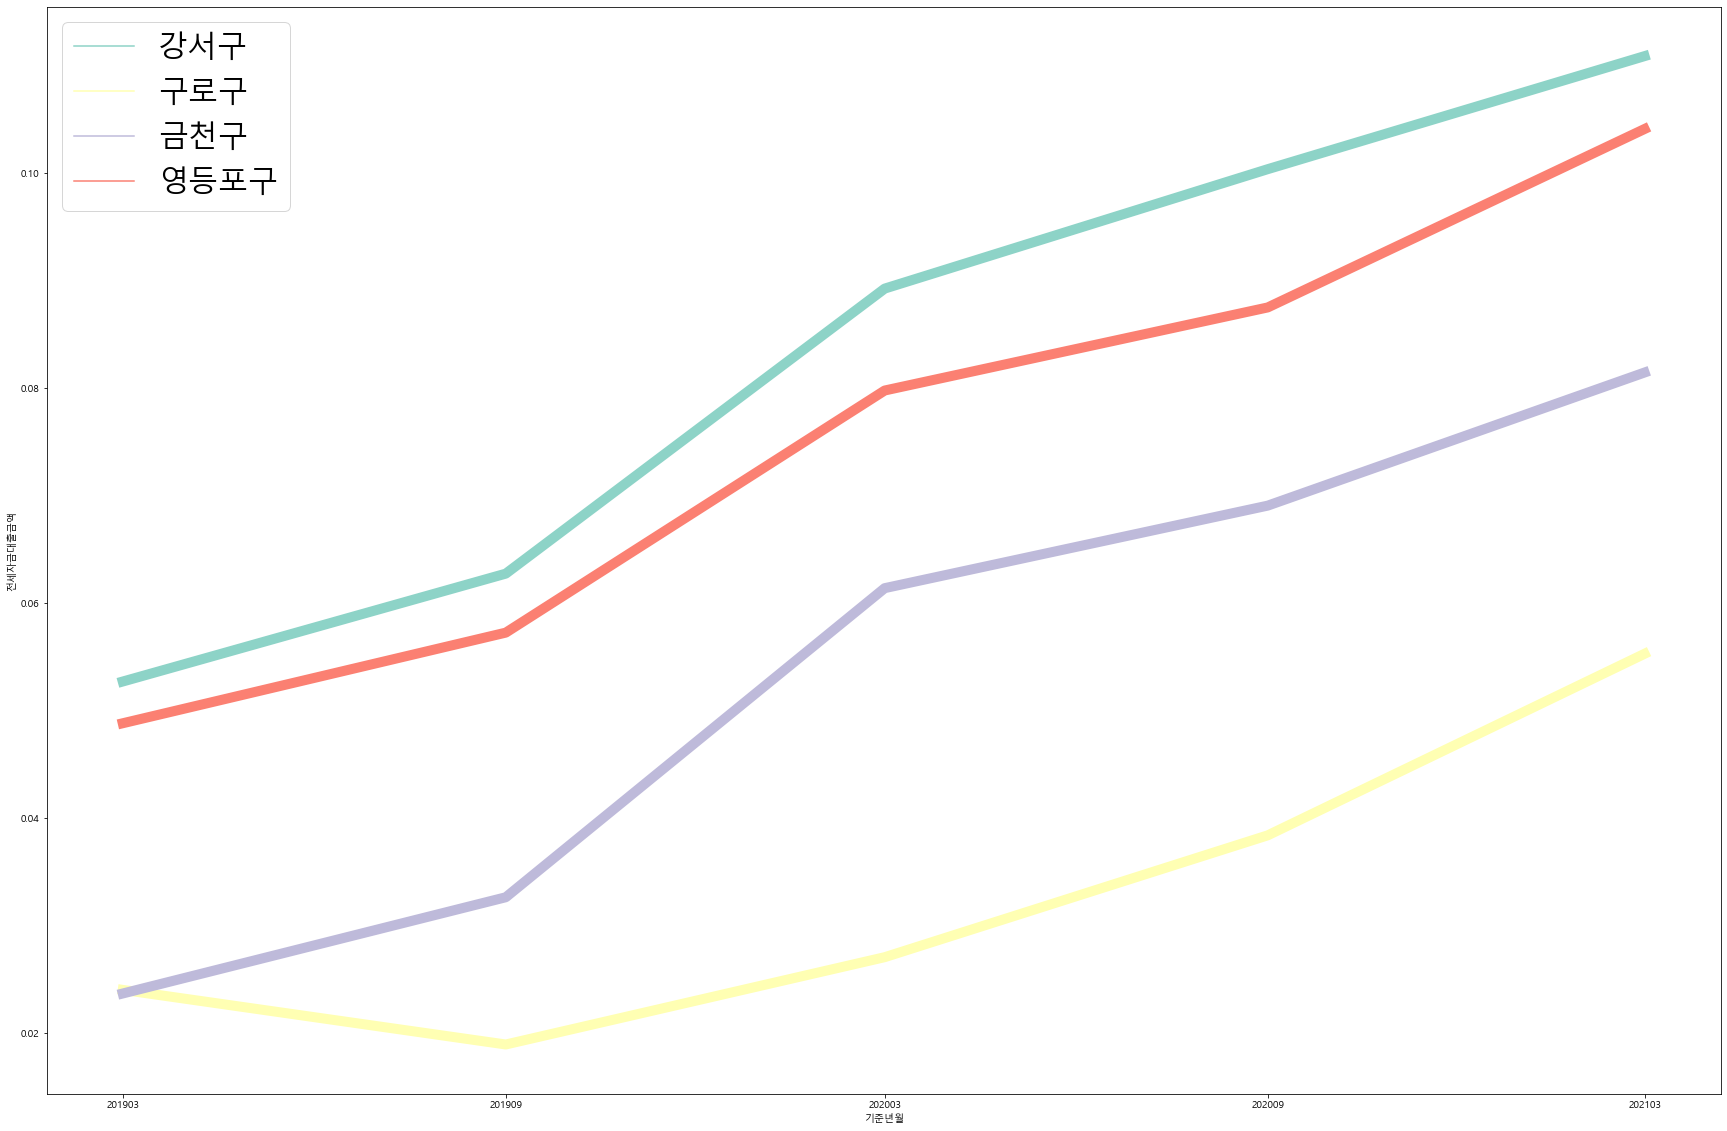

In [112]:
palette = sns.color_palette("Set3", 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.lineplot(x='기준년월',y='전세자금대출금액',hue='지역구',
             data=ratio_gu.loc[(ratio_gu['지역구']== '강서구')|(ratio_gu['지역구']== '영등포구')|(ratio_gu['지역구']== '금천구')|(ratio_gu['지역구']== '구로구')],
             linewidth=10, markersize=11, markerfacecolor='black')
plt.xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],['201903','201909','202003','202009','202103'])
plt.legend(loc='best',fontsize=30)

plt.show()

<AxesSubplot:xlabel='기준년월', ylabel='전세자금대출금액'>

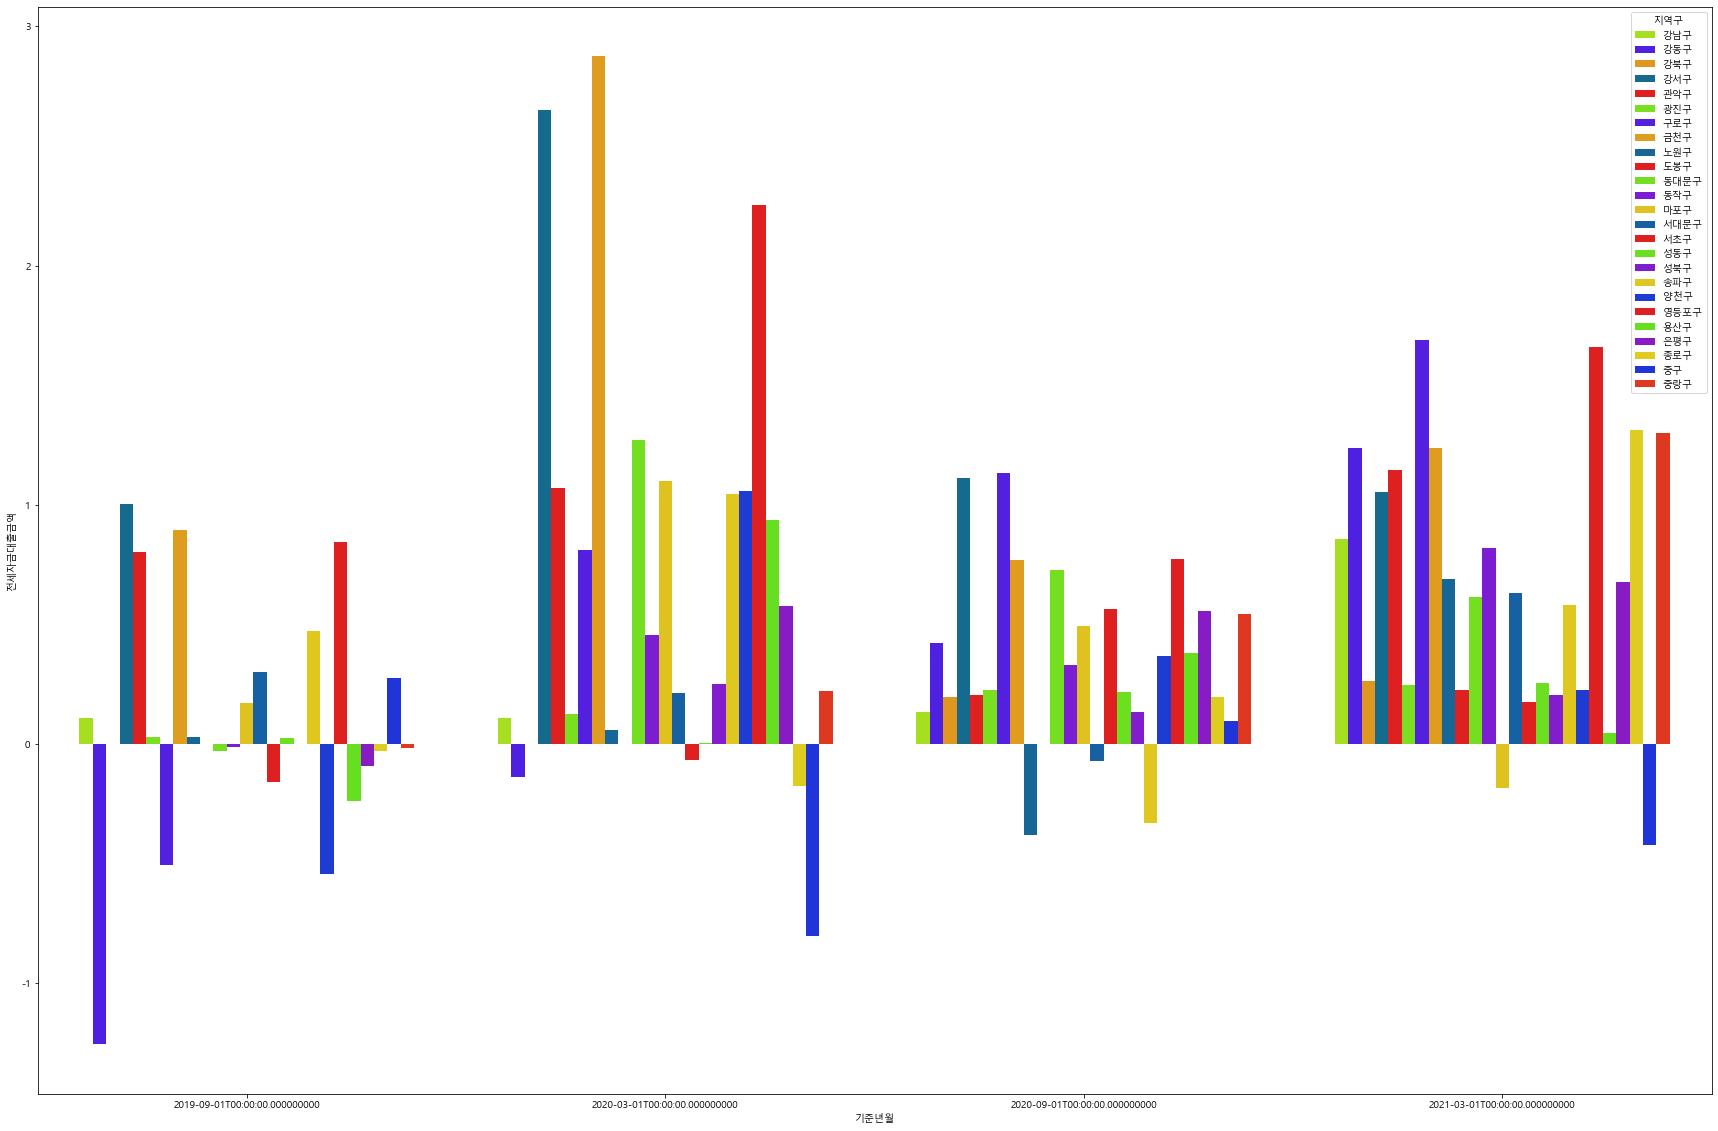

In [172]:
palette = sns.color_palette('prism', 25)
sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.barplot(x='기준년월',y='전세자금대출금액',hue='지역구', data=ratio_yr_change)
# plt.legend(ratio_yr_change['지역구'].unique(),loc='best',fontsize=30)

In [175]:
print('2019년 9월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2019-09-01T00:00:00.000000000'].sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 3월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2020-03-01T00:00:00.000000000'].sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 9월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2020-09-01T00:00:00.000000000'].sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2021년 3월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2021-03-01T00:00:00.000000000'].sort_values(by='전세자금대출금액', ascending=False).head(3)['지역구'])
print('\n\n')


2019년 9월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구
3      강서구
7      금천구
19    영등포구
Name: 지역구, dtype: object



2020년 3월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구
32     금천구
28     강서구
44    영등포구
Name: 지역구, dtype: object



2020년 9월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구
56     구로구
53     강서구
69    영등포구
Name: 지역구, dtype: object



2021년 3월 기준, 전세자금대출금액의 비중의 증가가 가장 큰 3개 지역구
81     구로구
94    영등포구
97     종로구
Name: 지역구, dtype: object





**3. 담보대출**

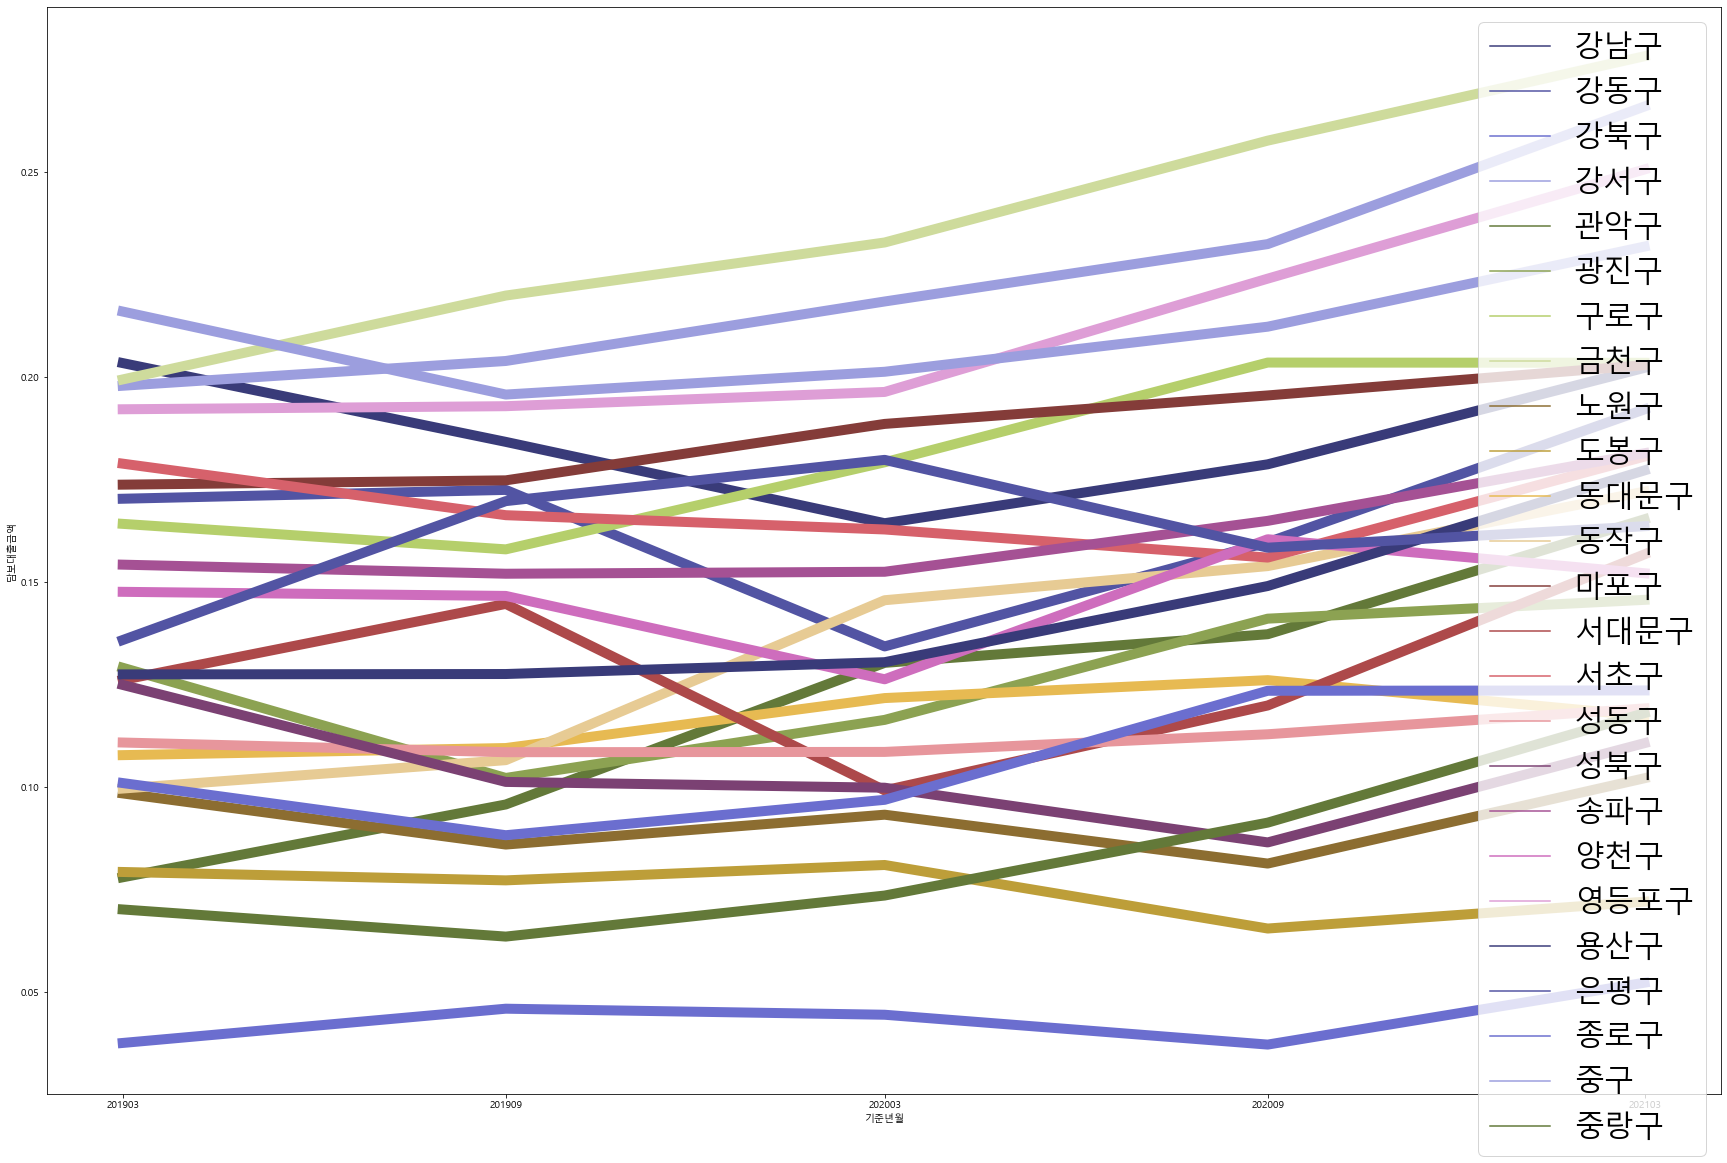

In [119]:
plt.figure(figsize=(30,20))
sns.lineplot(x='기준년월',y='담보대출금액',hue='지역구',data=ratio_gu, linewidth=10, markersize=11, markerfacecolor='black')
plt.xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],['201903','201909','202003','202009','202103'])
plt.legend(loc='best',fontsize=30)

plt.show()

비교적 전체 거리에서 차지하는 비중이 비슷한 추이를 보이며, 대부분이 비슷한 증가 추이를 보였습니다. 

In [120]:
print('2019년 3월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_1903.sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2019년 9월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_1909.sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 3월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2003.sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 9월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2009.sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2021년 3월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구')
print(ratio_gu_2103.sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

2019년 3월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
23     중구
0     강남구
7     금천구
Name: 지역구, dtype: object



2019년 9월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
32    금천구
28    강서구
48     중구
Name: 지역구, dtype: object



2020년 3월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
57    금천구
53    강서구
73     중구
Name: 지역구, dtype: object



2020년 9월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
82     금천구
78     강서구
94    영등포구
Name: 지역구, dtype: object



2021년 3월 기준, 담보대출금액이 전체거래중 차지하는 비중이 가장 큰 3개 지역구
107     금천구
103     강서구
119    영등포구
Name: 지역구, dtype: object





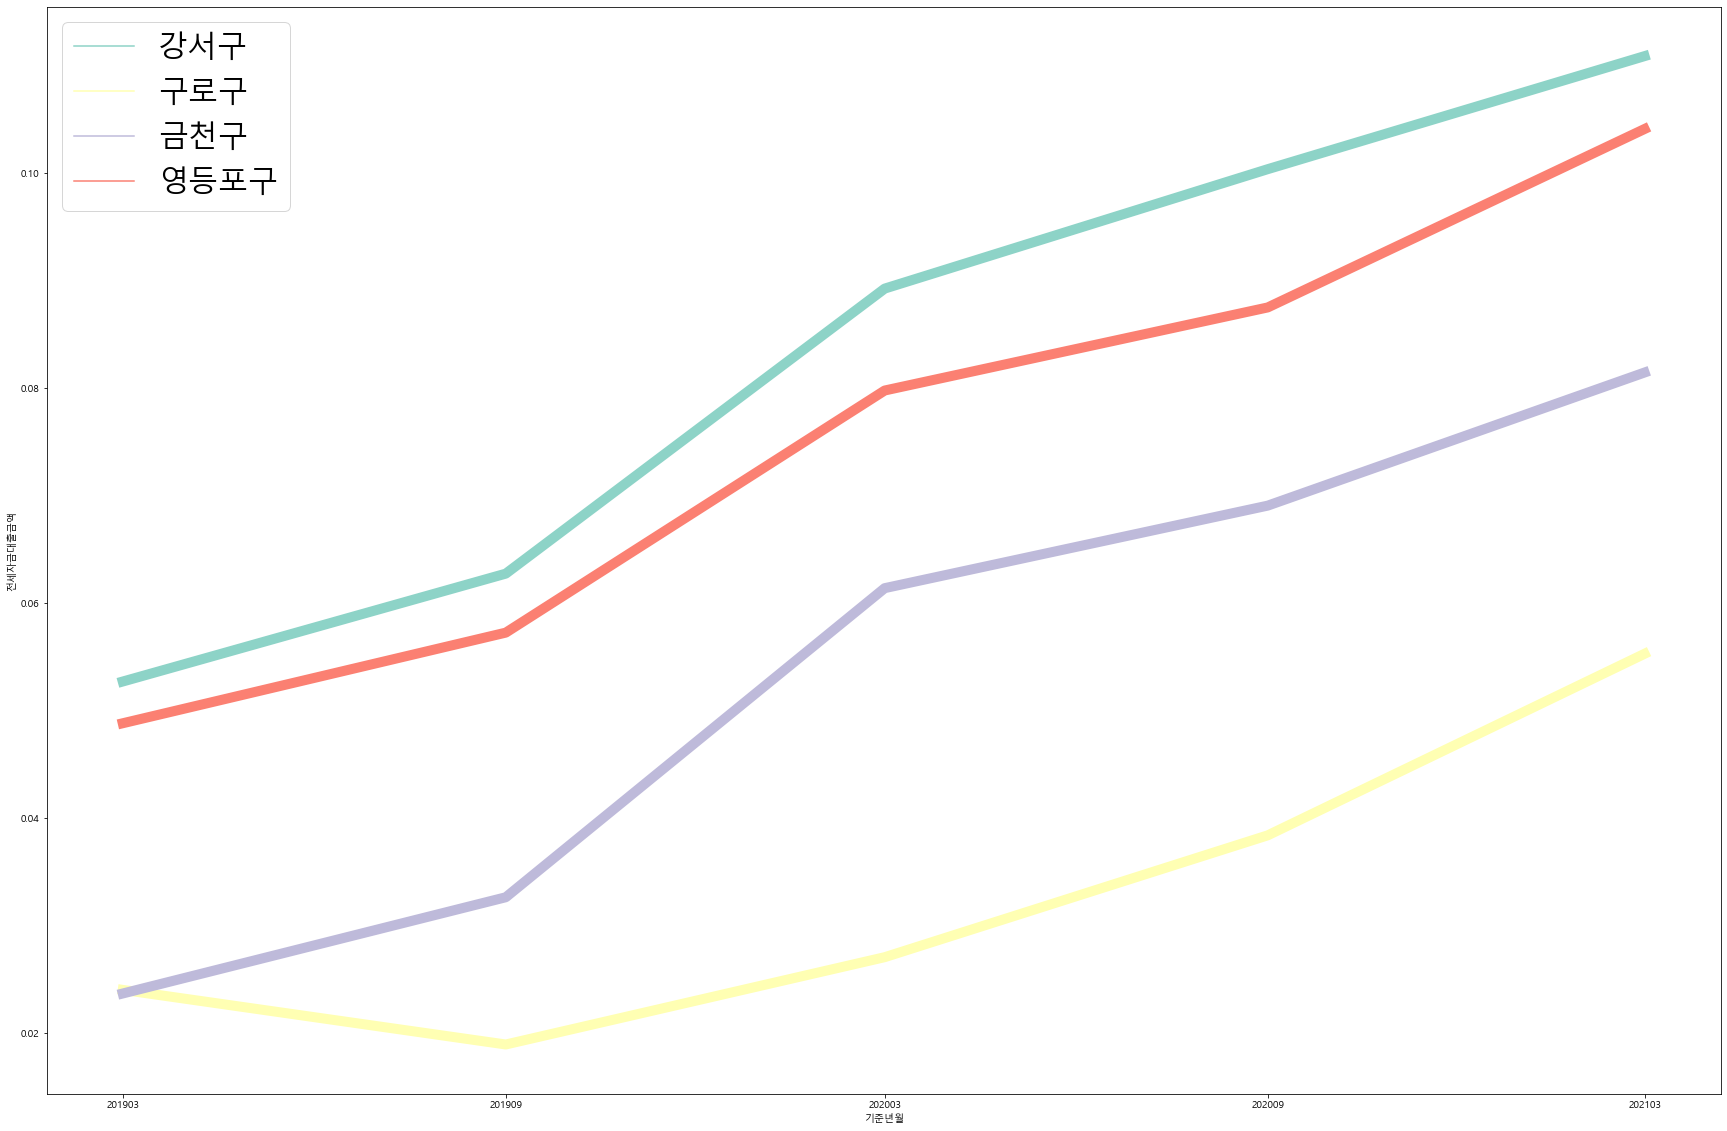

In [174]:
palette = sns.color_palette("Set3", 25)
# palette = sns.color_palette("viridis", 25)

sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.lineplot(x='기준년월',y='전세자금대출금액',hue='지역구',
             data=ratio_gu.loc[(ratio_gu['지역구']== '강서구')|(ratio_gu['지역구']== '영등포구')|(ratio_gu['지역구']== '금천구')|(ratio_gu['지역구']== '구로구')],
             linewidth=10, markersize=11, markerfacecolor='black')
plt.xticks(['2019-03-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'],['201903','201909','202003','202009','202103'])
plt.legend(loc='best',fontsize=30)

plt.show()

<AxesSubplot:xlabel='기준년월', ylabel='담보대출금액'>

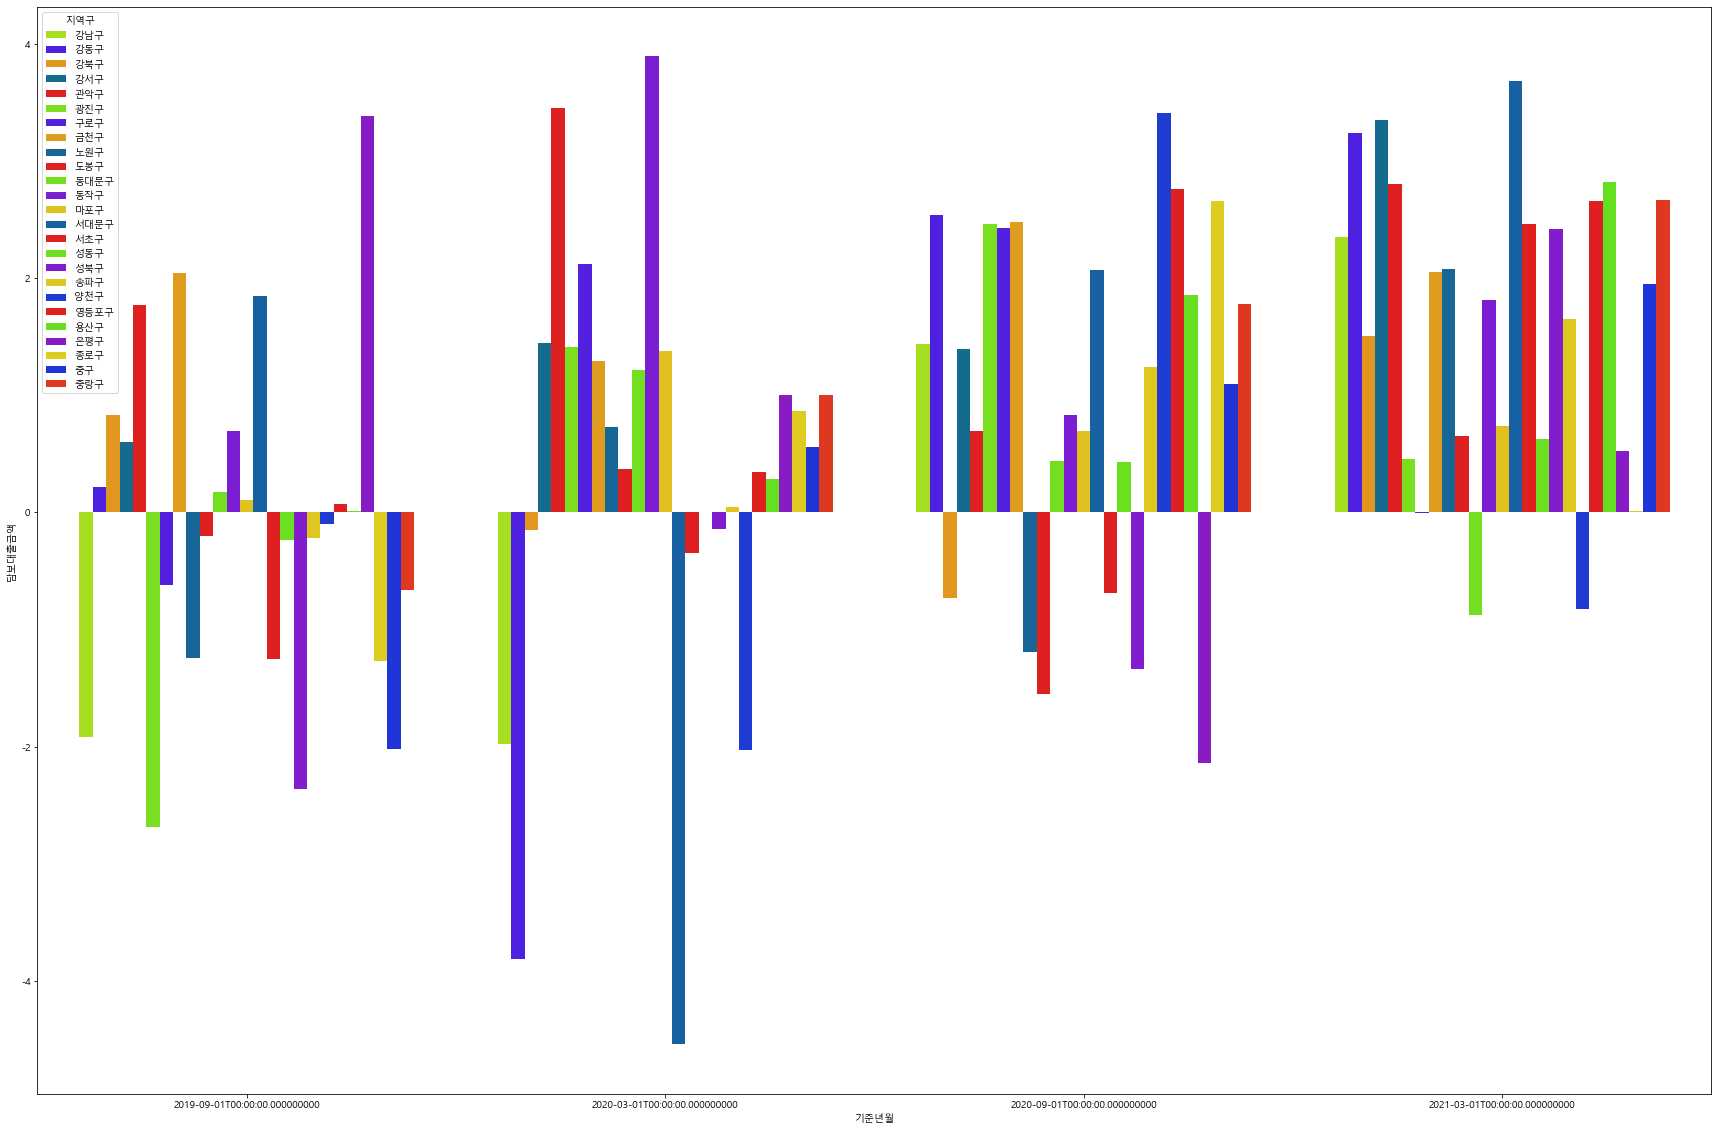

In [178]:
palette = sns.color_palette('prism', 25)
sns.set_palette(palette)

plt.figure(figsize=(30,20))
sns.barplot(x='기준년월',y='담보대출금액',hue='지역구', data=ratio_yr_change)
# plt.legend(ratio_yr_change['지역구'].unique(),loc='best',fontsize=30)

In [179]:
print('2019년 9월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2019-09-01T00:00:00.000000000'].sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 3월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2020-03-01T00:00:00.000000000'].sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2020년 9월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2020-09-01T00:00:00.000000000'].sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

print('2021년 3월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구')
print(ratio_yr_change.loc[ratio_yr_change['기준년월']=='2021-03-01T00:00:00.000000000'].sort_values(by='담보대출금액', ascending=False).head(3)['지역구'])
print('\n\n')

2019년 9월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구
21     은평구
7      금천구
13    서대문구
Name: 지역구, dtype: object



2020년 3월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구
36    동작구
29    관악구
31    구로구
Name: 지역구, dtype: object



2020년 9월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구
68     양천구
69    영등포구
72     종로구
Name: 지역구, dtype: object



2021년 3월 기준, 담보대출금액의 비중의 증가가 가장 큰 3개 지역구
88    서대문구
78     강서구
76     강동구
Name: 지역구, dtype: object





##### 평균적인 비중변동의  지역별 크기 

In [213]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액']

result_col = ['지역구','가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총변동액']


target = groupby_gu.loc[(groupby_gu['기준년월']=='2019-09-01T00:00:00.000000000')|(groupby_gu['기준년월']=='2021-03-01T00:00:00.000000000')]


result = pd.DataFrame(columns=result_col)
for i in range(25,50):
    temp = []
    loc = target.iloc[i,1]
    temp.append(loc)
    for j in range(2,13):
        value = target.iloc[i,j] - target.iloc[i-25,j]
        temp.append(value)
    total = sum(temp[1:])
    temp.append(total)
    result = result.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)


temp = []
temp.append('계')
for feature in features:
    a = result[feature].sum()
    temp.append(a)
total = sum(temp[1:])
temp.append(total)    
result = result.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)

In [214]:
result

지역구    가맹점매출입금        연금입금       총소비금액         총수신금액        예적금금액  \
0    강남구  -52788321    62160198   367514316   10736365195    381792237   
1    강동구  -11140986    71633583   608864740    7381167044   3387136511   
2    강북구    3424459    29046455   198973937    2618127317    484522304   
3    강서구   -1836765    76411597   619406364    7819094584   1991175862   
4    관악구   -1422532    43421279   359477424    4994750176    954544823   
5    광진구  -10431495    17724894   156328163    4147403612    432075216   
6    구로구   11630026    46538991   238101757    4633491056   -198897473   
7    금천구   -5890876    19267069   236376766    2336527666    632097982   
8    노원구   10478984    82847487   229122061    5454368796     75423544   
9    도봉구    1627955    60392233    79374134    2886755700    200838036   
10  동대문구     646964    23906137   262273328    3621096373       544797   
11   동작구    -600685    62716944   296034421    4800669833     19729417   
12   마포구   -7555635    48144666   216655769    5856602989   1293028682   
13  서대문구    9610560    36875178   360479411    4126383253    -17511957   
14   서초구  -17666305    77705578   336168260    8305670516   -385747033   
15   성동구   -2680011    69582127   239521835    4577493077    292685593   
16   성북구   10277564    44070670   227196995    4446128917   -411198412   
17   송파구   10707394    -6175079   200247155   10593798157   -656203944   
18   양천구  -23774123    41602610   218078159    5434788718    247688678   
19  영등포구    1785428    35008498   430809939    5692242647    652069024   
20   용산구  -14018386    67889570   140986137    3535773357     35750072   
21   은평구    2142845    70371086   443394785    4986812614   1521311588   
22   종로구    -677335    26546835    39623717    2157565165   -199456551   
23    중구   25232127    41460499    18134580    1488504160   -262379524   
24   중랑구   -8261908    44267547   345050537    3569774508    292741953   
25     계  -71181057  1193416652  6868194690  126201355430  10763761425   

            신탁금액       수익증권금액       신용대출금액        담보대출금액       주택대출금액  \
0    -2434259938  -1945260541   7287985547    9930749121  -1347666502   
1     -127571659    184827441   2894376523    6988993535   2936209820   
2      -99999549    -32513384    132775500     462762365    -79148483   
3    -1066335921    -87213333   4595692918   22894443385   -614551236   
4     -127425322    -77280354   1107501522    9925424069     -3806103   
5     -341985467   -484618281    773976566    4623931100   -269229006   
6     -120393069    -86069546   1666139351    7278191230   -373243345   
7       61854978    -54648538    581275045    6700776455    -81512709   
8     -588825113   -199738541   2311388612    2907459544    807623275   
9     -531679885   -343006220    301072252    -189089869   -274247902   
10     -75140939    -34001278    423836091    1279027431     76241871   
11    -970466686   -735627940   2064573466   10016581673   2797077672   
12     412168763   -504537308   3312943892    7450730715   1968042842   
13     406976006    -22564378   1538393326    2546308166   2002480044   
14    -855499999  -1155050504   7274467179    6864203028    850620118   
15    -152729320   -301164724   2776519322    2024153829    141953158   
16    -350436295   -219975414   1417726247    1756938705    611293454   
17   -2560516067  -1505911157   4908629014   11805787075   3600579979   
18    -421671793   -384313204   2268945628    2576725965    758854605   
19     -78588291     -6488562   4696542949   14352522906    818010299   
20    -575838968   -431138823   2117310947    5941217641   -222785017   
21      19588265      4713870   1481415442    1416988241    311693622   
22    -420921118   -187602942   1071781304    1986013561   -199387435   
23    -426110704   -253967552   1079759114    2469934095    580379983   
24     -16682892   -139117956    566361836    5071931462    530616109   
25  -11442490983  -9002269169  58651389593  149082705428  15326099113   

       전세자금대출금액          총변동액  
0 

In [217]:
result['신탁금액'][25]

-11442490983

In [218]:

features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액','총변동액']

result_col = ['지역구','가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총변동액']


result_ratio = pd.DataFrame(columns=result_col)
for idx,row in result.iterrows():
    temp = [] 
    loc = row['지역구']
    temp.append(loc)
    for feature in features:
        total_ch = result[feature][25]
        x = row[feature]
        value = (x/total_ch)*100
        temp.append(value)
    result_ratio = result_ratio.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)
result_ratio    

지역구     가맹점매출입금        연금입금       총소비금액       총수신금액       예적금금액  \
0    강남구   74.160631    5.208591    5.350959    8.507330    3.547015   
1    강동구   15.651616    6.002395    8.864990    5.848722   31.467963   
2    강북구   -4.810913    2.433891    2.897034    2.074564    4.501422   
3    강서구    2.580413    6.402759    9.018474    6.195729   18.498885   
4    관악구    1.998470    3.638401    5.233943    3.957763    8.868134   
5    광진구   14.654875    1.485223    2.276117    3.286338    4.014166   
6    구로구  -16.338653    3.899643    3.466730    3.671507   -1.847844   
7    금천구    8.275904    1.614446    3.441614    1.851428    5.872464   
8    노원구  -14.721591    6.942042    3.335987    4.321957    0.700717   
9    도봉구   -2.287062    5.060448    1.155677    2.287421    1.865872   
10  동대문구   -0.908899    2.003168    3.818665    2.869301    0.005061   
11   동작구    0.843883    5.255243    4.310222    3.803976    0.183295   
12   마포구   10.614671    4.034188    3.154479    4.640682   12.012796   
13  서대문구  -13.501570    3.089883    5.248532    3.269682   -0.162694   
14   서초구   24.818829    6.511186    4.894565    6.581285   -3.583757   
15   성동구    3.765062    5.830497    3.487406    3.627135    2.719176   
16   성북구  -14.438622    3.692815    3.307958    3.523044   -3.820211   
17   송파구  -15.042477   -0.517429    2.915572    8.394362   -6.096419   
18   양천구   33.399508    3.486009    3.175189    4.306442    2.301135   
19  영등포구   -2.508291    2.933468    6.272535    4.510445    6.058003   
20   용산구   19.693984    5.688673    2.052739    2.801692    0.332134   
21   은평구   -3.010415    5.896607    6.455769    3.951473   14.133643   
22   종로구    0.951566    2.224440    0.576916    1.709621   -1.853038   
23    중구  -35.447812    3.474101    0.264037    1.179468   -2.437619   
24   중랑구   11.606891    3.709312    5.023890    2.828634    2.719699   
25     계  100.000000  100.000000  100.000000  100.000000  100.000000   

          신탁금액      수익증권금액      신용대출금액      담보대출금액      주택대출금액    전세자금대출금액  \
0    21.273864   21.608558   12.425938    6.661235   -8.793278    5.621705   
1     1.114894   -2.053121    4.934881    4.687998   19.158233    3.546800   
2     0.873932    0.361169    0.226381    0.310406   -0.516429    0.348625   
3     9.319089    0.968793    7.835608   15.356874   -4.009835   22.278539   
4     1.113615    0.858454    1.888278    6.657663   -0.024834    5.305536   
5     2.988733    5.383290    1.319622    3.101588   -1.756670    0.951682   
6     1.052158    0.956087    2.840750    4.881982   -2.435345    6.795644   
7    -0.540573    0.607053    0.991068    4.494671   -0.531856    5.969731   
8     5.145952    2.218758    3.940893    1.950233    5.269594    0.950035   
9     4.646540    3.810220    0.513325   -0.126836   -1.789418    0.274689   
10    0.656683    0.377697    0.722636    0.857931    0.497464    2.810158   
11    8.481254    8.171583    3.520076    6.718809   18.250421    3.387901   
12   -3.602089    5.604557    5.648534    4.997716   12.841120    3.440563   
13   -3.556708    0.250652    2.622944    1.707984   13.065817    1.006436   
14    7.476519   12.830659   12.402890    4.604292    5.550141    2.731355   
15    1.334756    3.345431    4.733936    1.357739    0.926218    0.735842   
16    3.062587    2.443555    2.417208    1.178499    3.988578    0.988052   
17   22.377261   16.728129    8.369161    7.918951   23.493127    6.391663   
18    3.685140    4.269070    3.868528    1.728387    4.951388    3.655842   
19    0.686811    0.072077    8.007556    9.627222    5.337368   13.981650   
20    5.032462    4.789224    3.609993    3.985182   -1.453632    2.294284   
21   -0.171189   -0.052363    2.525798    0.950471    2.033744    3.440874   
22    3.678579    2.083952    1.827376    1.332156   -1.300967    1.014962   
23    3.723933    2.821150    1.840978    1.656754    3.786873   -0.746289   
24    0.145798    1.545365    0.965641    3.402092    3.462173    2.823721   
25  100.000000  100.000000  100.

신용대출의 총 변동액중 강남구와 서초구가 각각 12.42%, 12.40%로 전체 변동의 약 15%를 견인하였다.   
전세자금 대출의 경우 강서구의 경우 전체 변동액 중 22.3%, 영등포구 약 14%로 전체 변동의 무려 36%가량을 견인하였다.   
담보대출의 경우도 동일한 강서구와 영등포구에서 각각 15.35%, 9.6%로 1~2위를 차지하였으며 전체 변동중 무려 25%가량을 견인하였다.

## 연령별 분석 

In [ ]:
# 전반적인 연령별 특성 파악 
# 각 구별 레코드에서 앞서 유의한 변화가 있던 지역에 대한 세부 분석 

### 기간내 평균적 정보 

In [223]:
groupby_age = sinhan.groupby(['기준년월','나이'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'].sum().reset_index()

groupby_age_mean = groupby_age.groupby(['나이'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'].mean().reset_index()

<ipython-input-223-b7ca93452fce>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_age = sinhan.groupby(['기준년월','나이'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
<ipython-input-223-b7ca93452fce>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_age_mean = groupby_age.groupby(['나이'])['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',


In [228]:
groupby_age_mean

나이      가맹점매출입금          연금입금         총소비금액         총수신금액         예적금금액  \
0   2          0.0  8.174528e+05  2.895719e+10  7.412416e+10  7.062808e+10   
1   3   23583307.0  4.622708e+05  5.243524e+10  1.568856e+11  1.514805e+11   
2   4  112051429.8  3.545418e+05  5.714623e+10  1.654818e+11  1.395679e+11   
3   5  288548141.4  4.642966e+06  5.364364e+10  1.817184e+11  1.490457e+11   
4   6  117196296.2  1.477610e+09  3.783601e+10  1.735314e+11  1.280355e+11   
5   7    2092866.8  2.624584e+09  1.837389e+10  1.365963e+11  1.040671e+11   

           신탁금액        수익증권금액        신용대출금액        담보대출금액        주택대출금액  \
0  1.897678e+08  4.500906e+08  1.240641e+09  1.041149e+10  0.000000e+00   
1  3.544207e+09  1.677277e+09  3.478614e+10  1.325873e+11  2.170148e+09   
2  1.377010e+10  7.384448e+09  3.042025e+10  8.861339e+10  9.378806e+09   
3  4.787683e+10  1.477875e+10  1.650997e+10  9.267010e+10  1.266088e+10   
4  3.010497e+10  1.292811e+10  1.616355e+09  5.872553e+10  7.197511e+09   
5  1.503711e+10  9.175349e+09  9.460188e+07  2.537607e+10  1.721080e+09   

       전세자금대출금액  
0  7.775053e+09  
1  4.557099e+10  
2  2.718460e+09  
3  7.156755e+08  
4  1.196289e+08  
5  0.000000e+00

In [229]:
groupby_age_mean.loc[groupby_age_mean['나이']==2]['연금입금']

0    817452.8
Name: 연금입금, dtype: float64

In [298]:
def make_pie_age(df,feature):
    labels = ['20대','30대','40대','50대','60대','70대' ]
    ages = [2,3,4,5,6,7]
#     colors = ['cyan','darkturquoise','mediumslateblue','midnightblue','blueviolet','lime','orange']
    total = df[feature].sum()
    ratio_data = []
    for age, label in zip(ages, labels):
        ratio = float(df.loc[df['나이']== age][feature])/total 
        ratio_data.append(ratio)

    plt.figure(figsize=(25,25))
    explode = [0.01]*len(ages)
    
    plt.pie(ratio_data,labels= labels,  shadow=True, startangle=90, 
            autopct='%1.1f%%', textprops={'size': 30, 'rotation':45, 'ha':'right'} ,explode=explode)
    plt.legend(labels, loc='best',fontsize=30)
    plt.axis('equal')
    plt.title(feature,{'fontsize': 50},loc='center')
    plt.show()

<ipython-input-298-6775a26e040e>:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ratio_data,labels= labels,  shadow=True, startangle=90,


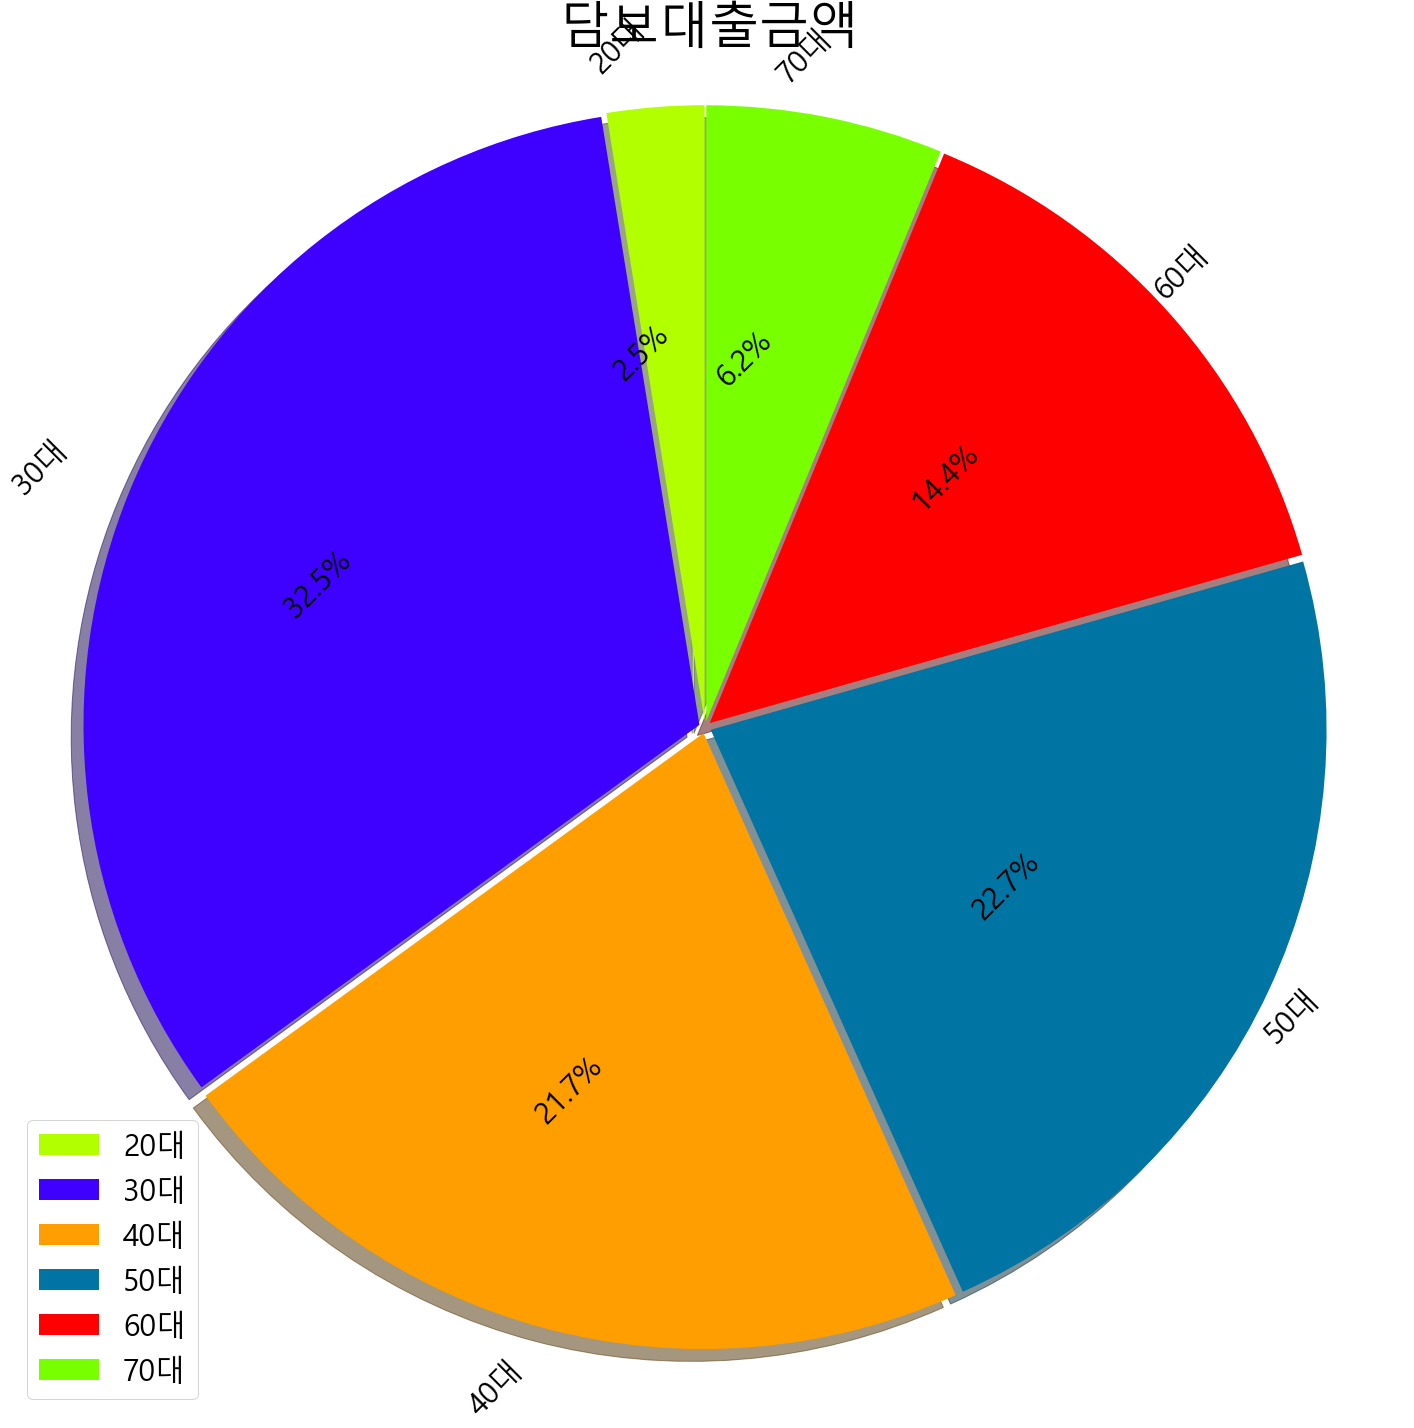

In [299]:
make_pie_age(groupby_age_mean,'담보대출금액')

연령대별 비중을 확인하고 싶은 컬럼명을 입력하세요!
총소비금액


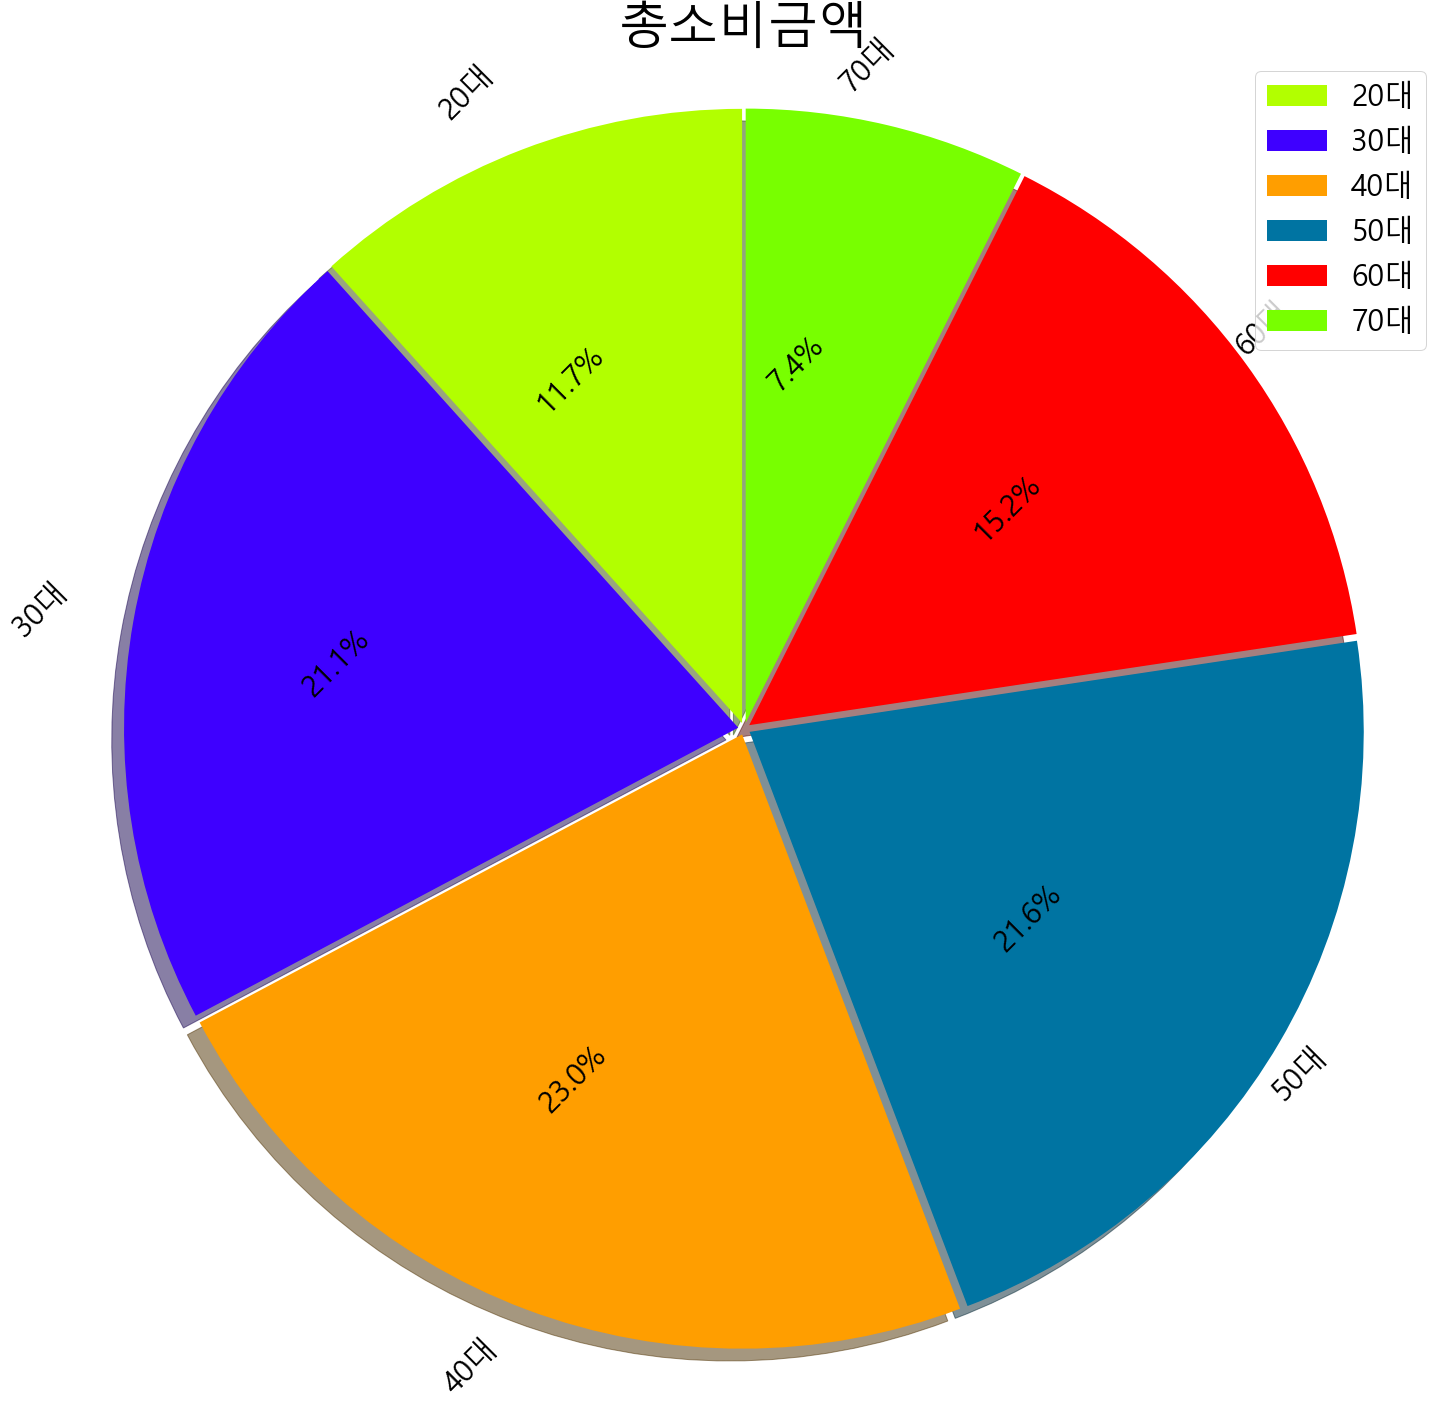

In [301]:
feature = input('연령대별 비중을 확인하고 싶은 컬럼명을 입력하세요!\n')
make_pie_age(groupby_age_mean,feature)

In [302]:
groupby_age

기준년월  나이    가맹점매출입금        연금입금        총소비금액         총수신금액  \
0  2019-03-01   2          0      560951  28953839410   66677336889   
1  2019-03-01   3   27714521      288571  50171026347  142204376059   
2  2019-03-01   4  187663576      250000  55808716490  153601979932   
3  2019-03-01   5  448249272     4569673  51838603157  169847374405   
4  2019-03-01   6  167123904  1199542334  35421272637  161243872184   
5  2019-03-01   7    8776909  2263215326  15979104540  126625562536   
6  2019-09-01   2          0      961010  31445918788   72227433032   
7  2019-09-01   3   26285008      337142  53496043929  146302347659   
8  2019-09-01   4  160739900      300000  60120664038  156754036656   
9  2019-09-01   5  336831773     1598475  55663233192  171188897272   
10 2019-09-01   6   92330025  1390382483  38819340918  160791615630   
11 2019-09-01   7    1687425  2277851397  19108968300  124542930829   
12 2020-03-01   2          0      722459  24696491958   72375533493   
13 2020-03-01   3   21849388      340833  48852872997  157193694451   
14 2020-03-01   4   61073003      300000  53755355206  165426290517   
15 2020-03-01   5  174685818     7977995  50496184339  181451926424   
16 2020-03-01   6   97494888  1485280185  35225644188  173907307153   
17 2020-03-01   7          0  2767704786  16099529777  138049406197   
18 2020-09-01   2          0      924622  30581060390   81356117989   
19 2020-09-01   3   10129696      385014  53411954190  169219427459   
20 2020-09-01   4   61346094      300987  56720195788  175393867255   
21 2020-09-01   5  198165902     6556221  52966660041  191508826103   
22 2020-09-01   6   88520030  1704726726  37963056547  183916207637   
23 2020-09-01   7          0  2562430063  18842928813  141873468964   
24 2021-03-01   2          0      918222  29108640943   77984392136   
25 2021-03-01   3   31937922      959794  56244290751  169508394009   
26 2021-03-01   4   89434576      621722  59326229829  176232740092   
27 2021-03-01   5  284807942     2512468  57253534716  194594740302   
28 2021-03-01   6  140512634  1608118017  41750729769  187798231384   
29 2021-03-01   7          0  3251716936  21838937847  151890118585   

           예적금금액         신탁금액       수익증권금액       신용대출금액        담보대출금액  \
0    68936698110    198062831    403551638    660490546    2761387249   
1   144634478683   3046719944   2020054870  20210210305   91235523075   
2   144158446221  14405970019   8345442534  19130041797   83243045285   
3   149487975525  47831777674  15729406398  11810212615   98135300223   
4   126763751642  31232597005  12955252258   1388590872   59102663033   
5   106477929839  16024509135   8789142614     26415990   25454043968   
6    73380556541    259636894    538252321   1106517092    5821465896   
7   145679073145   3924265100   2010141700  25725671614   96740141368   
8   140424993917  15492461678   8706197390  23229483201   83784167210   
9   144558200988  48655768618  16499234009  12000596221   89909668594   
10  119723962775  29514966454  12994423910   1222146670   56188154674   
11   95923725533  14798420492   9368856070     11207832   23823265291   
12   68689750443    201187013    453230258   1132375475    8893813698   
13  156142768442   3862816996   1762845635  31783765634  122761167887   
14  142900535057  13911531577   6904133867  29120577728   83180576816   
15  154225236035  51980257068  14089400867  17810749367   86921110900   
16  133791893565  33472727757  13102069128   2073390488   57951890617   
17  106650570199  16632163270   9369960744     89694591   25626591555   
18   75871810343    152731360    462107465   1807658163   16838812252   
19  158643889400   3685241699   1579038595  44381681205  155107090793   
20  141345845326  13543025183   7329564975  36148759596   89738159660   
21  152400866649  46818360328  14874082903  18962742695   91964407360   
22  132293978008  27861261523  13789290515   1406222420   57264116269   
23  100562891145  13905436034   8779577701    153561788

In [315]:
features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', 
            '신탁금액', '수익증권금액','신용대출금액', '담보대출금액', '주택대출금액', 
            '전세자금대출금액']

result_col = ['나이','가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총변동액']


target = groupby_age.loc[(groupby_age['기준년월']=='2019-03-01T00:00:00.000000000')|(groupby_age['기준년월']=='2021-03-01T00:00:00.000000000')].reset_index(drop=True)


result = pd.DataFrame(columns=result_col)
for i in range(6,12):
    temp = []
    age = target.iloc[i,1]
    temp.append(age)
    for j in range(2,13):
        value = target.iloc[i,j] - target.iloc[i-6,j]
        temp.append(value)
    total = sum(temp[1:])
    temp.append(total)
    result = result.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)


temp = []
temp.append('계')
for feature in features:
    a = result[feature].sum()
    temp.append(a)
total = sum(temp[1:])
temp.append(total)    
result = result.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)


features = ['가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총변동액']
result_col = ['나이','가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액','총변동액']


result_ratio = pd.DataFrame(columns=result_col)
for idx,row in result.iterrows():
    temp = [] 
    age = row['나이']
    temp.append(age)
    for feature in features:
        total_ch = result[feature][6]
        x = row[feature]
        value = (x/total_ch)*100
        temp.append(value)
    result_ratio = result_ratio.append(pd.DataFrame([temp], columns=result_col),ignore_index=True)
result_ratio    

나이     가맹점매출입금        연금입금       총소비금액       총수신금액       예적금금액        신탁금액  \
0  2   -0.000000    0.025585    0.566006    8.204927   26.737891    0.527381   
1  3   -1.442245    0.048067   22.205881   19.813070  -76.637488   -1.345920   
2  4   33.544134    0.026620   12.861203   16.421936  151.409880   25.210769   
3  5   55.813434   -0.147320   19.798797   17.957844   49.292690   32.364668   
4  6    9.087459   29.258790   23.142607   19.269082   -8.398828   24.177881   
5  7    2.997219   70.788258   21.425506   18.333141  -42.404146   19.065221   
6  계  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

       수익증권금액      신용대출금액      담보대출금액      주택대출금액    전세자금대출금액        총변동액  
0    0.143665    1.216039   10.301759    0.000000   18.113030    8.397248  
1   14.109828   46.010887   72.795341   18.326347   77.394747   53.518326  
2   37.998566   36.877131   13.669571   57.711088    4.525645   14.143125  
3   42.477301   14.777588   -1.179546    3.759999   -0.126657    6.373376  
4   16.214309    0.877215    2.763196   11.922439    0.093234    8.523147  
5  -10.943669    0.241139    1.649680    8.280127    0.000000    9.044778  
6  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000

In [320]:
result_ratio[['나이','가맹점매출입금']][0:5]

나이    가맹점매출입금
0  2  -0.000000
1  3  -1.442245
2  4  33.544134
3  5  55.813434
4  6   9.087459

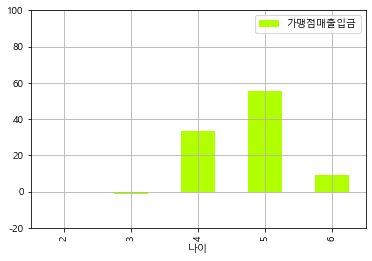

In [329]:
result_ratio[['나이','가맹점매출입금']][0:5].plot.bar(x='나이',y='가맹점매출입금')
plt.ylim(-20,100)
plt.grid()

## 성별 분석 

In [ ]:
# 전반적인 성별에 따른 분석 
# 각 구별 성별 
# 각 구별 연령별 성별에 따른 분석 세분화 (유의한 집단에서만 시도 하며 범위를 좁힌다.)